In [1]:
# Load the Libraries for Data Exploration and Data Visualization 

library(dplyr)   
library(readr) 
library(data.table)
library(sqldf)
library(ggplot2) 
library(ggthemes)
library(treemap)
library(RColorBrewer)
library(tidyr) 

Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'data.table' was built under R version 3.4.4"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'sqldf' was built under R version 3.4.4"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.4.4"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.4.4"Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.4.4"Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'ggthemes' was built un

In [2]:
# Load the Data set

d <- read.csv(file.choose() , header = T , sep = ",") # Delivery Dataset 

In [3]:
# Load the Data set

m <- read.csv(file.choose() , header = T , sep = ",") # Matches Dataset

In [4]:
str(d) # structure of the Data set 

'data.frame':	150460 obs. of  21 variables:
 $ match_id        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ inning          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ batting_team    : Factor w/ 14 levels "Chennai Super Kings",..: 14 14 14 14 14 14 14 14 14 14 ...
 $ bowling_team    : Factor w/ 14 levels "Chennai Super Kings",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ over            : int  1 1 1 1 1 1 1 2 2 2 ...
 $ ball            : int  1 2 3 4 5 6 7 1 2 3 ...
 $ batsman         : Factor w/ 461 levels "A Ashish Reddy",..: 104 104 104 104 104 348 348 348 104 104 ...
 $ non_striker     : Factor w/ 458 levels "A Ashish Reddy",..: 348 348 348 348 348 106 106 106 348 348 ...
 $ bowler          : Factor w/ 356 levels "A Ashish Reddy",..: 333 333 333 333 333 333 333 3 3 3 ...
 $ is_super_over   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ wide_runs       : int  0 0 0 0 2 0 0 0 0 0 ...
 $ bye_runs        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ legbye_runs     : int  0 0 0 0 0 0 1 0 0 0 ...
 $ noball_runs     : int  0 0 0 0 0 0 0

In [5]:
str(m) # structure of the Data set  

'data.frame':	636 obs. of  18 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ season         : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ city           : Factor w/ 31 levels "","Abu Dhabi",..: 15 26 28 16 4 15 23 16 26 23 ...
 $ date           : Factor w/ 450 levels "3/12/2010","3/13/2010",..: 211 215 219 225 225 232 232 28 35 42 ...
 $ team1          : Factor w/ 14 levels "Chennai Super Kings",..: 14 8 4 11 13 4 7 13 3 14 ...
 $ team2          : Factor w/ 14 levels "Chennai Super Kings",..: 13 11 7 5 3 14 8 5 11 8 ...
 $ toss_winner    : Factor w/ 14 levels "Chennai Super Kings",..: 13 11 7 5 13 14 8 13 11 8 ...
 $ toss_decision  : Factor w/ 2 levels "bat","field": 2 2 2 2 1 2 2 1 2 2 ...
 $ result         : Factor w/ 3 levels "no result","normal",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ dl_applied     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ winner         : Factor w/ 15 levels "","Chennai Super Kings",..: 15 12 8 6 14 15 9 6 4 9 ...
 $ win_by_runs    : int  35 0 0

In [6]:
i1 <- sapply(d, class) %in% c('factor')
d[i1] <-  lapply(d[i1], function(x) {if(is.factor(x)) {
             levels(x)[levels(x)=='Rising Pune Supergiant'] <- 'RPS'
    }
             x})

i1 <- sapply(d, class) %in% c('factor')
d[i1] <-  lapply(d[i1], function(x) {if(is.factor(x)) {
             levels(x)[levels(x)=='Rising Pune Supergiants'] <- 'RPS'
    }
             x})

i1 <- sapply(m, class) %in% c('factor')
m[i1] <-  lapply(m[i1], function(x) {if(is.factor(x)) {
             levels(x)[levels(x)=='Rising Pune Supergiant'] <- 'RPS'
    }
             x})

i1 <- sapply(m, class) %in% c('factor')
m[i1] <-  lapply(m[i1], function(x) {if(is.factor(x)) {
             levels(x)[levels(x)=='Rising Pune Supergiants'] <- 'RPS'
    }
             x})

In [7]:
data.frame(var1 = unique(d$batting_team) , var2 = unique(m$team1)) 

var1,var2
Sunrisers Hyderabad,Sunrisers Hyderabad
Royal Challengers Bangalore,Mumbai Indians
Mumbai Indians,Gujarat Lions
RPS,RPS
Gujarat Lions,Royal Challengers Bangalore
Kolkata Knight Riders,Kolkata Knight Riders
Kings XI Punjab,Delhi Daredevils
Delhi Daredevils,Kings XI Punjab
Chennai Super Kings,Chennai Super Kings
Rajasthan Royals,Rajasthan Royals


In [8]:
rt <- d %>% 
  select(batting_team ,batsman_runs) %>%
  filter(batsman_runs %in% c(6,4,3,2,1))

s <- sqldf("select batting_team as Team , count(batsman_runs) as Sixes from rt 
      where batsman_runs = 6 group by batting_team")

f <- sqldf("select batting_team as Team , count(batsman_runs) as Fours from rt 
      where batsman_runs = 4 group by batting_team")

t <- sqldf("select batting_team as Team , count(batsman_runs) as Threes from rt 
      where batsman_runs = 3 group by batting_team")

tt <- sqldf("select batting_team as Team , count(batsman_runs) as Twos from rt 
      where batsman_runs = 2 group by batting_team")

o <- sqldf("select batting_team as Team , count(batsman_runs) as Ones from rt 
      where batsman_runs = 1 group by batting_team") 


Runs_Type <- sqldf("select s.Team ,
                           s.Sixes,
                           f.Fours,
                           t.Threes,
                           tt.Twos,
                           o.Ones from s
                           inner join f
                           on s.Team = f.Team
                           inner join t 
                           on s.Team = t.Team
                           inner join tt
                           on s.Team = tt.Team
                           inner join o 
                           on s.Team = o.Team ") 


Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [9]:
print(Runs_Type) 

                          Team Sixes Fours Threes Twos Ones
1          Chennai Super Kings   742  1770     61 1110 5877
2              Deccan Chargers   400   957     35  563 3401
3             Delhi Daredevils   686  1970     53 1099 6399
4                Gujarat Lions   155   460      8  233 1364
5              Kings XI Punjab   762  2083     58 1175 6369
6         Kochi Tuskers Kerala    53   170      6   85  572
7        Kolkata Knight Riders   659  1978     55 1050 6484
8               Mumbai Indians   876  2145     62 1108 6830
9                Pune Warriors   196   525     17  352 1999
10                         RPS   157   368     11  245 1395
11            Rajasthan Royals   538  1630     63  939 4959
12 Royal Challengers Bangalore   935  1978     44 1096 6378
13         Sunrisers Hyderabad   364   999     36  650 3470


In [10]:
p <-   d %>%  
       group_by(match_id,batting_team) %>% 
       summarise(runs = sum(total_runs)) %>%
       filter(runs >= 200)

dd <- sqldf(" select batting_team as Team, count(runs) as Scored_200_Plus from p
        group by batting_team ")

p1 <-   d%>%  
        group_by(match_id,batting_team) %>% 
        summarise(runs = sum(total_runs)) %>%
        filter(runs <= 100)

a <- sqldf(" select batting_team as Team, count(runs) as Scored_Less_100 from p1
               group by batting_team ") 


p2 <- d %>%  
      group_by(match_id,batting_team) %>% 
      summarise(runs = sum(total_runs)) %>%
      filter(runs %in% c(100:150))



p2 <- d %>%  
      group_by(match_id,batting_team) %>% 
      summarise(runs = sum(total_runs)) %>%
      filter(runs <=150 & runs >=100)



b <- sqldf(" select batting_team as Team, count(runs) as Scored_bt_100_150 from p2
               group by batting_team ")  

p3 <- d %>%  
      group_by(match_id,batting_team) %>% 
      summarise(runs = sum(total_runs)) %>%
      filter(runs %in% c(150:200))

c <- sqldf(" select batting_team as Team, count(runs) as Scored_bt_150_200 from p3
               group by batting_team ")  


p4 <- d %>%  
      group_by(match_id,batting_team) %>% 
      summarise(runs = sum(total_runs)) %>%
      filter(runs >= 250)

e <- sqldf(" select batting_team as Team, count(runs) as Scored_250_plus from p4
               group by batting_team ")  


score_table<- sqldf("select b.Team,
              a.Scored_Less_100 ,
              b.Scored_bt_100_150 ,
              c.Scored_bt_150_200,
              dd.Scored_200_Plus,
              e.Scored_250_plus
              from b 
              left join a
              on a.Team = b.Team 
              left join c
              on b.Team = c.Team 
              left join dd
              on b.Team = dd.Team 
              left join e
              on b.Team = e.Team")


In [11]:
score_table

Team,Scored_Less_100,Scored_bt_100_150,Scored_bt_150_200,Scored_200_Plus,Scored_250_plus
Chennai Super Kings,3,48,70,12,NA
Deccan Chargers,3,35,40,1,NA
Delhi Daredevils,13,58,78,4,NA
Gujarat Lions,NA,9,20,1,NA
Kings XI Punjab,7,56,75,12,NA
Kochi Tuskers Kerala,2,8,4,NA,NA
Kolkata Knight Riders,10,59,81,4,NA
Mumbai Indians,7,53,88,9,NA
Pune Warriors,1,28,16,NA,NA
RPS,3,6,21,NA,NA


In [12]:
score_table[is.na(score_table)]  <- 0 #Replace NA Values with zero.
score_table 

Team,Scored_Less_100,Scored_bt_100_150,Scored_bt_150_200,Scored_200_Plus,Scored_250_plus
Chennai Super Kings,3,48,70,12,0
Deccan Chargers,3,35,40,1,0
Delhi Daredevils,13,58,78,4,0
Gujarat Lions,0,9,20,1,0
Kings XI Punjab,7,56,75,12,0
Kochi Tuskers Kerala,2,8,4,0,0
Kolkata Knight Riders,10,59,81,4,0
Mumbai Indians,7,53,88,9,0
Pune Warriors,1,28,16,0,0
RPS,3,6,21,0,0


In [13]:
Team_Bat <- merge(x = Runs_Type , y = score_table , by = "Team") 

setnames(Team_Bat ,c("Scored_Less_100","Scored_bt_100_150","Scored_bt_150_200","Scored_200_Plus","Scored_250_plus"),
                   c("<100","100-150","150-200","200+","250+")) #Renaming Columns 



In [14]:
Team_Bat

Team,Sixes,Fours,Threes,Twos,Ones,<100,100-150,150-200,200+,250+
Chennai Super Kings,742,1770,61,1110,5877,3,48,70,12,0
Deccan Chargers,400,957,35,563,3401,3,35,40,1,0
Delhi Daredevils,686,1970,53,1099,6399,13,58,78,4,0
Gujarat Lions,155,460,8,233,1364,0,9,20,1,0
Kings XI Punjab,762,2083,58,1175,6369,7,56,75,12,0
Kochi Tuskers Kerala,53,170,6,85,572,2,8,4,0,0
Kolkata Knight Riders,659,1978,55,1050,6484,10,59,81,4,0
Mumbai Indians,876,2145,62,1108,6830,7,53,88,9,0
Pune Warriors,196,525,17,352,1999,1,28,16,0,0
Rajasthan Royals,538,1630,63,939,4959,6,55,51,6,0


In [15]:
table(d$total_runs)
table(d$batsman_runs)


    0     1     2     3     4     5     6     7 
53305 62205 10253   597 17250   326  6486    38 


    0     1     2     3     4     5     6 
61148 55497  9705   509 17033    45  6523 

In [16]:
tos <- sqldf("select batting_team Team , count(*) Ones from d where batsman_runs = 1 group by batting_team")
tt1 <- sqldf("select batting_team Team, count(*) Twos from d where batsman_runs = 2 group by batting_team")
ttt <- sqldf("select batting_team Team, count(*) Threes from d where batsman_runs = 3 group by batting_team")
tf <- sqldf("select batting_team Team, count(*) Fours from d where batsman_runs = 4 group by batting_team")
ts <- sqldf("select batting_team Team, count(*) Sixes from d where batsman_runs = 6 group by batting_team")

In [17]:
# how many 30+ ,50+ ,100+ 150+ scored by each team

tp <- sqldf("select match_id,batting_team Team, batsman, sum(batsman_runs) Thirty_plus
            from d group by match_id,batting_team ,batsman having Thirty_plus >= 30.0") %>%
  select(Team ,Thirty_plus) %>%
  group_by(Team) %>%
  summarise(Thirty_plus_count = n())


# sqldf("select Team , count(Thirty_plus) from tp group by Team")


fp <- sqldf("select match_id,batting_team Team, batsman, sum(batsman_runs) Fifty_plus
            from d group by match_id,batting_team ,batsman having Fifty_plus >= 50.0") %>%
  select(Team ,Fifty_plus) %>%
  group_by(Team) %>%
  summarise(Fifty_plus_count = n())


hp <- sqldf("select match_id,batting_team Team, batsman, sum(batsman_runs) Hundred_plus
            from d group by match_id,batting_team ,batsman having Hundred_plus  >= 100.0") %>%
  select(Team ,Hundred_plus ) %>%
  group_by(Team) %>%
  summarise(Hundred_plus  = n())

ofp <- sqldf("select match_id,batting_team Team, batsman, sum(batsman_runs) One_Fifty_plus
             from d group by match_id,batting_team ,batsman having One_Fifty_plus  >= 150.0") %>%
  select(Team ,One_Fifty_plus ) %>%
  group_by(Team) %>%
  summarise(One_Fifty_plus_count  = n())  

In [18]:
#TOP Score by team

ths <- sqldf("select match_id,batting_team Team,sum(total_runs) Team_Highest_Score
             from d group by match_id,batting_team ") %>%
  select(Team,Team_Highest_Score) %>%
  group_by(Team) %>%
  summarise(Team_Highest_Score = max(Team_Highest_Score))  

In [19]:
#Lowest Score by Team

tls <- sqldf("select match_id,batting_team Team,sum(total_runs) Team_Lowest_Score
             from d where match_id NOT IN(571,546,301) group by match_id,batting_team ") %>%
  select(Team,Team_Lowest_Score) %>%
  group_by(Team) %>%
  summarise(Team_Lowest_Score = min(Team_Lowest_Score))

In [20]:
#Balls Played By Team

bpbt <- d %>%
  select(batting_team,wide_runs,noball_runs,batsman_runs) %>%
  filter(wide_runs == 0 & noball_runs == 0)
# %>% group_by(batting_team) %>%  tally

bpbt <- sqldf("select batting_team Team, count(batsman_runs) Balls_Played from bpbt group by batting_team ")

#Dot_Balls

dbt <- d %>%
  select(batting_team,wide_runs,noball_runs,batsman_runs) %>%
  filter(wide_runs == 0 & noball_runs == 0 & batsman_runs == 0)

dbt <- sqldf("select batting_team Team, count(batsman_runs) Dot_Balls from dbt group by batting_team ")  

In [21]:
#merge all data frame 

Team_Analysis <- sqldf("select tos.Team,
      tos.Ones,
      tt1.Twos,
      ttt.Threes,
      tf.fours,
      ts.Sixes,
      tp.Thirty_plus_count,
      fp.Fifty_plus_count,
      hp.Hundred_plus,
      ofp.One_Fifty_plus_count,
      ths.Team_Highest_Score,
      bpbt.Balls_Played,
      dbt.Dot_Balls
      from tos
      inner join tt1
      on tos.Team = tt1.Team
      inner join ttt
      on tos.Team = ttt.Team
      inner join tf
      on tos.Team = tf.Team
      inner join ts
      on tos.Team = ts.Team
      inner join tp
      on tos.Team = tp.Team
      inner join fp
      on tos.Team = fp.Team
      left join hp
      on tos.Team = hp.Team
      left join ofp
      on tos.Team = ofp.Team
      inner join ths
      on tos.Team = ths.Team
      inner join bpbt
      on tos.Team = bpbt.Team
      inner join dbt
      on tos.Team = dbt.Team
      ")


In [22]:
Team_Analysis 

Team,Ones,Twos,Threes,Fours,Sixes,Thirty_plus_count,Fifty_plus_count,Hundred_plus,One_Fifty_plus_count,Team_Highest_Score,Balls_Played,Dot_Balls
Chennai Super Kings,5877,1110,61,1770,742,259,111,5,NA,246,15215,5688
Deccan Chargers,3401,563,35,957,400,128,53,2,NA,214,8752,3416
Delhi Daredevils,6399,1099,53,1970,686,244,113,7,NA,231,16611,6432
Gujarat Lions,1364,233,8,460,155,62,27,NA,NA,208,3439,1225
Kings XI Punjab,6369,1175,58,2083,762,256,104,9,NA,232,17012,6592
Kochi Tuskers Kerala,572,85,6,170,53,19,5,NA,NA,184,1510,628
Kolkata Knight Riders,6484,1050,55,1978,659,267,107,1,1,222,16601,6400
Mumbai Indians,6830,1108,62,2145,876,295,129,4,NA,223,18210,7226
Pune Warriors,1999,352,17,525,196,74,17,NA,NA,192,5275,2199
RPS,1395,245,11,368,157,61,24,2,NA,195,3364,1192


In [23]:
Team_Analysis[is.na(Team_Analysis)] <- 0  #Replace NA values wtih Zero

Team_Analysis <- rename(Team_Analysis ,"30+" = "Thirty_plus_count" ) 
Team_Analysis <- rename(Team_Analysis ,"50+" = "Fifty_plus_count" ) 
Team_Analysis <- rename(Team_Analysis ,"100+" = "Hundred_plus" ) 
Team_Analysis <- rename(Team_Analysis ,"150+" = "One_Fifty_plus_count" ) #Renaming Columns 

Team_Analysis <- merge(x = Team_Analysis , y = Team_Bat , By = "Team") 

Team_Analysis <- rename(Team_Analysis ,"THS" = "Team_Highest_Score")

In [24]:
Team_Analysis

Team,Ones,Twos,Threes,Fours,Sixes,30+,50+,100+,150+,THS,Balls_Played,Dot_Balls,<100,100-150,150-200,200+,250+
Chennai Super Kings,5877,1110,61,1770,742,259,111,5,0,246,15215,5688,3,48,70,12,0
Deccan Chargers,3401,563,35,957,400,128,53,2,0,214,8752,3416,3,35,40,1,0
Delhi Daredevils,6399,1099,53,1970,686,244,113,7,0,231,16611,6432,13,58,78,4,0
Gujarat Lions,1364,233,8,460,155,62,27,0,0,208,3439,1225,0,9,20,1,0
Kings XI Punjab,6369,1175,58,2083,762,256,104,9,0,232,17012,6592,7,56,75,12,0
Kochi Tuskers Kerala,572,85,6,170,53,19,5,0,0,184,1510,628,2,8,4,0,0
Kolkata Knight Riders,6484,1050,55,1978,659,267,107,1,1,222,16601,6400,10,59,81,4,0
Mumbai Indians,6830,1108,62,2145,876,295,129,4,0,223,18210,7226,7,53,88,9,0
Pune Warriors,1999,352,17,525,196,74,17,0,0,192,5275,2199,1,28,16,0,0
Rajasthan Royals,4959,939,63,1630,538,207,78,4,0,223,13453,5361,6,55,51,6,0


In [25]:
# Number of matches played by each team

mp <- as.data.frame(table(m$team1) + table(m$team2))

mp <- rename(mp , Team = Var1 , matches_played = Freq) 

In [26]:
#Number of Matches won by each teams  
mw <- as.data.frame(table(m$winner)) %>% filter(Freq != 3)

mw <- rename(mw , Team = Var1 , matches_won = Freq) 

In [27]:
mw %>% group_by(Team) %>% top_n(14) 

Selecting by matches_won


Team,matches_won
Chennai Super Kings,79
Deccan Chargers,29
Delhi Daredevils,62
Gujarat Lions,13
Kings XI Punjab,70
Kochi Tuskers Kerala,6
Kolkata Knight Riders,77
Mumbai Indians,92
Pune Warriors,12
Rajasthan Royals,63


In [28]:
#join both data_frame mp and mw 

table <- merge(x = mp , y = mw , by = "Team") #inner join

table$win_per <- round((table$matches_won / table$matches_played),4) * 100   

In [29]:
print(table) 

                          Team matches_played matches_won win_per
1          Chennai Super Kings            131          79   60.31
2              Deccan Chargers             75          29   38.67
3             Delhi Daredevils            147          62   42.18
4                Gujarat Lions             30          13   43.33
5              Kings XI Punjab            148          70   47.30
6         Kochi Tuskers Kerala             14           6   42.86
7        Kolkata Knight Riders            148          77   52.03
8               Mumbai Indians            157          92   58.60
9                Pune Warriors             46          12   26.09
10            Rajasthan Royals            118          63   53.39
11 Royal Challengers Bangalore            152          73   48.03
12                         RPS             30          15   50.00
13         Sunrisers Hyderabad             76          42   55.26


In [30]:
Toss <- sqldf("select toss_winner as Team, count(*) as Toss_Won from m group by toss_winner") 

sqldf("select * from Toss order by Toss_Won desc") 

Team,Toss_Won
Mumbai Indians,85
Kolkata Knight Riders,78
Delhi Daredevils,72
Royal Challengers Bangalore,70
Kings XI Punjab,68
Chennai Super Kings,66
Rajasthan Royals,63
Deccan Chargers,43
Sunrisers Hyderabad,35
Pune Warriors,20


In [31]:
table <- merge( x = table , y = Toss , by = "Team")  

In [32]:
table

Team,matches_played,matches_won,win_per,Toss_Won
Chennai Super Kings,131,79,60.31,66
Deccan Chargers,75,29,38.67,43
Delhi Daredevils,147,62,42.18,72
Gujarat Lions,30,13,43.33,15
Kings XI Punjab,148,70,47.30,68
Kochi Tuskers Kerala,14,6,42.86,8
Kolkata Knight Riders,148,77,52.03,78
Mumbai Indians,157,92,58.60,85
Pune Warriors,46,12,26.09,20
Rajasthan Royals,118,63,53.39,63


In [33]:
table$Toss_Win_Per = round((table$Toss_Won / table$matches_played ) * 100 , 2) #calculating Toss Win percentage 

Total_Runs <- sqldf("select batting_team as Team , sum(total_runs) as Total_Runs from d group by 
                    batting_team") 


table <- merge( x = table , y = Total_Runs , by = "Team")


table$Avg_Score <- round((table$Total_Runs  / table$matches_played),2) #Team Average Score



In [34]:
table

Team,matches_played,matches_won,win_per,Toss_Won,Toss_Win_Per,Total_Runs,Avg_Score
Chennai Super Kings,131,79,60.31,66,50.38,20899,159.53
Deccan Chargers,75,29,38.67,43,57.33,11463,152.84
Delhi Daredevils,147,62,42.18,72,48.98,21953,149.34
Gujarat Lions,30,13,43.33,15,50.00,4862,162.07
Kings XI Punjab,148,70,47.30,68,45.95,23068,155.86
Kochi Tuskers Kerala,14,6,42.86,8,57.14,1901,135.79
Kolkata Knight Riders,148,77,52.03,78,52.70,21965,148.41
Mumbai Indians,157,92,58.60,85,54.14,24521,156.18
Pune Warriors,46,12,26.09,20,43.48,6358,138.22
Rajasthan Royals,118,63,53.39,63,53.39,17703,150.03


In [35]:
Team_BAT_Analysis <- merge(x = Team_Analysis , y = table ,By = "Team") 

In [36]:
Team_BAT_Analysis  

Team,Ones,Twos,Threes,Fours,Sixes,30+,50+,100+,150+,...,150-200,200+,250+,matches_played,matches_won,win_per,Toss_Won,Toss_Win_Per,Total_Runs,Avg_Score
Chennai Super Kings,5877,1110,61,1770,742,259,111,5,0,...,70,12,0,131,79,60.31,66,50.38,20899,159.53
Deccan Chargers,3401,563,35,957,400,128,53,2,0,...,40,1,0,75,29,38.67,43,57.33,11463,152.84
Delhi Daredevils,6399,1099,53,1970,686,244,113,7,0,...,78,4,0,147,62,42.18,72,48.98,21953,149.34
Gujarat Lions,1364,233,8,460,155,62,27,0,0,...,20,1,0,30,13,43.33,15,50.00,4862,162.07
Kings XI Punjab,6369,1175,58,2083,762,256,104,9,0,...,75,12,0,148,70,47.30,68,45.95,23068,155.86
Kochi Tuskers Kerala,572,85,6,170,53,19,5,0,0,...,4,0,0,14,6,42.86,8,57.14,1901,135.79
Kolkata Knight Riders,6484,1050,55,1978,659,267,107,1,1,...,81,4,0,148,77,52.03,78,52.70,21965,148.41
Mumbai Indians,6830,1108,62,2145,876,295,129,4,0,...,88,9,0,157,92,58.60,85,54.14,24521,156.18
Pune Warriors,1999,352,17,525,196,74,17,0,0,...,16,0,0,46,12,26.09,20,43.48,6358,138.22
Rajasthan Royals,4959,939,63,1630,538,207,78,4,0,...,51,6,0,118,63,53.39,63,53.39,17703,150.03


In [37]:
setnames(Team_BAT_Analysis , c("matches_played","matches_won","win_per","Toss_Won","Toss_Win_Per","Total_Runs",
                               "Avg_Score"),c("MP","MW","MWP","TW","TWP","TRs","AS"))

In [38]:
Team_BAT_Analysis #Final Table  

Team,Ones,Twos,Threes,Fours,Sixes,30+,50+,100+,150+,...,150-200,200+,250+,MP,MW,MWP,TW,TWP,TRs,AS
Chennai Super Kings,5877,1110,61,1770,742,259,111,5,0,...,70,12,0,131,79,60.31,66,50.38,20899,159.53
Deccan Chargers,3401,563,35,957,400,128,53,2,0,...,40,1,0,75,29,38.67,43,57.33,11463,152.84
Delhi Daredevils,6399,1099,53,1970,686,244,113,7,0,...,78,4,0,147,62,42.18,72,48.98,21953,149.34
Gujarat Lions,1364,233,8,460,155,62,27,0,0,...,20,1,0,30,13,43.33,15,50.00,4862,162.07
Kings XI Punjab,6369,1175,58,2083,762,256,104,9,0,...,75,12,0,148,70,47.30,68,45.95,23068,155.86
Kochi Tuskers Kerala,572,85,6,170,53,19,5,0,0,...,4,0,0,14,6,42.86,8,57.14,1901,135.79
Kolkata Knight Riders,6484,1050,55,1978,659,267,107,1,1,...,81,4,0,148,77,52.03,78,52.70,21965,148.41
Mumbai Indians,6830,1108,62,2145,876,295,129,4,0,...,88,9,0,157,92,58.60,85,54.14,24521,156.18
Pune Warriors,1999,352,17,525,196,74,17,0,0,...,16,0,0,46,12,26.09,20,43.48,6358,138.22
Rajasthan Royals,4959,939,63,1630,538,207,78,4,0,...,51,6,0,118,63,53.39,63,53.39,17703,150.03


In [39]:
 # Team        : List of Teams participated in IPL 
 # Ones        : number of Singles hit by a Team
 # Twos        : number of doubles hit by a Team
 # Threes      : number of Triples hit by a Team
 # Fours       : number of Boundaries hit by a Team
 # Sixes       : number of Sixes hit by a Team
 # 30+         : Times Batsmen scored 30+ indivisual for Team
 # 50+         : Times Batsmen scored 50+ indivisual for Team
 # 100+        : Times Batsmen scored 100+ indivisual for Team
 # 150+        : Times Batsmen scored 150+ indivisual for Team
 # THS         : Team Highest Score in an inning by each Team 
 # Balls_Played: Total Balls played by each Team 
 # Dot_Balls   : Number of Dot balls played by each Team 
 # <100        : Times Team scored less than 100 in an inning 
 # 100-150     : Times Team scored between 100 and 150 in an inning 
 # 150-200     : Times Team scored between 150 and 200 in an inning 
 # 200+        : Times Team scored 200+ in an inning 
 # 250+        : Times Team scored 250+ in an inning 
 # MP          : number of Matches Played by Team 
 # MW          : number of Matches Won by Team 
 # MWP         : Match winning percentage of each Team 
 # TW          : Toss Won by each Team
 # TWP         : Toss winning percentage of each Team 
 # TRs         : Total Runs of Team 
 # AS          : Average Score in an inning by Team

Using Team as id variables


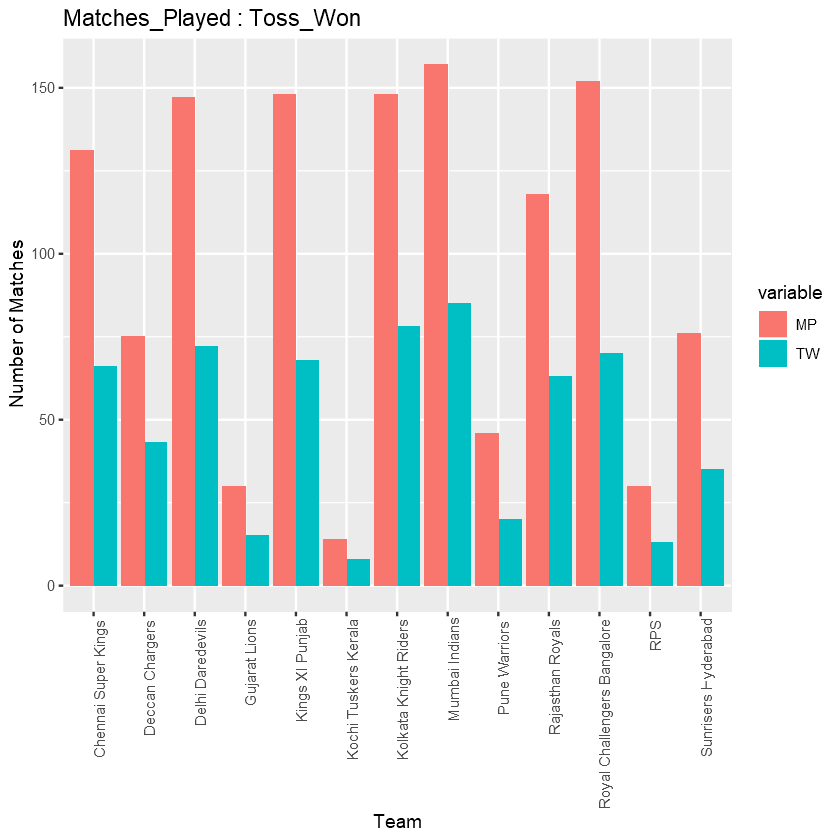

In [40]:
melt(Team_BAT_Analysis) %>% 
      filter(variable %in% c("MP","TW")) %>% 
      ggplot(aes(x =  Team , y = value,fill = variable))+
      geom_bar(stat ="identity",position="dodge") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Number of Matches", 
       title = "Matches_Played : Toss_Won")

Using Team as id variables


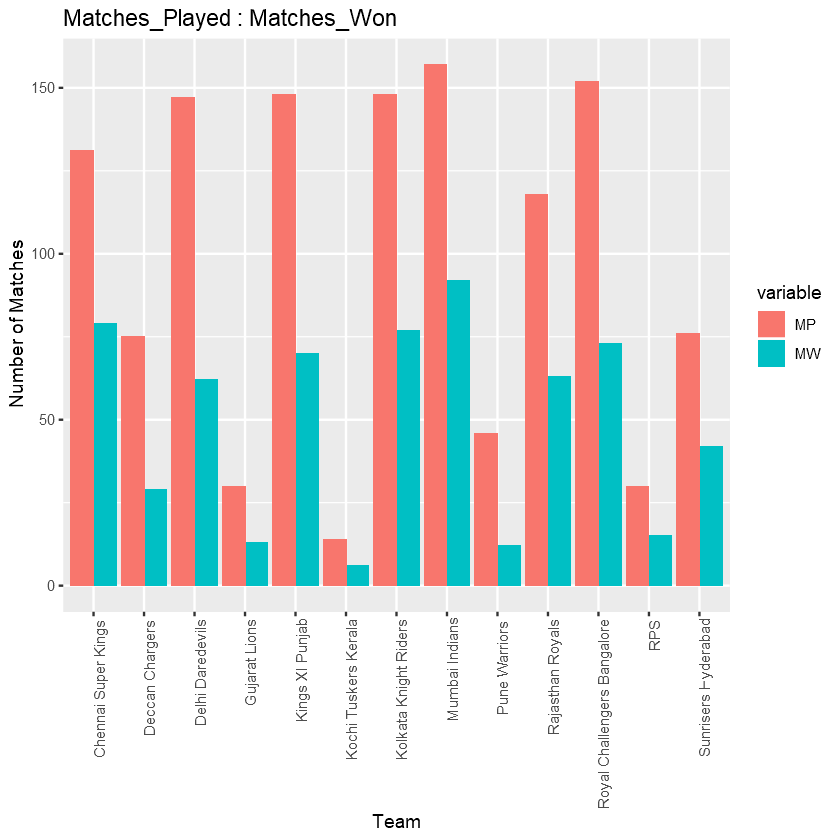

In [41]:
melt(Team_BAT_Analysis) %>% 
      filter(variable %in% c("MP","MW")) %>% 
      ggplot(aes(x =  Team , y = value,fill = variable))+
      geom_bar(stat ="identity",position="dodge") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Number of Matches", 
       title = "Matches_Played : Matches_Won") 

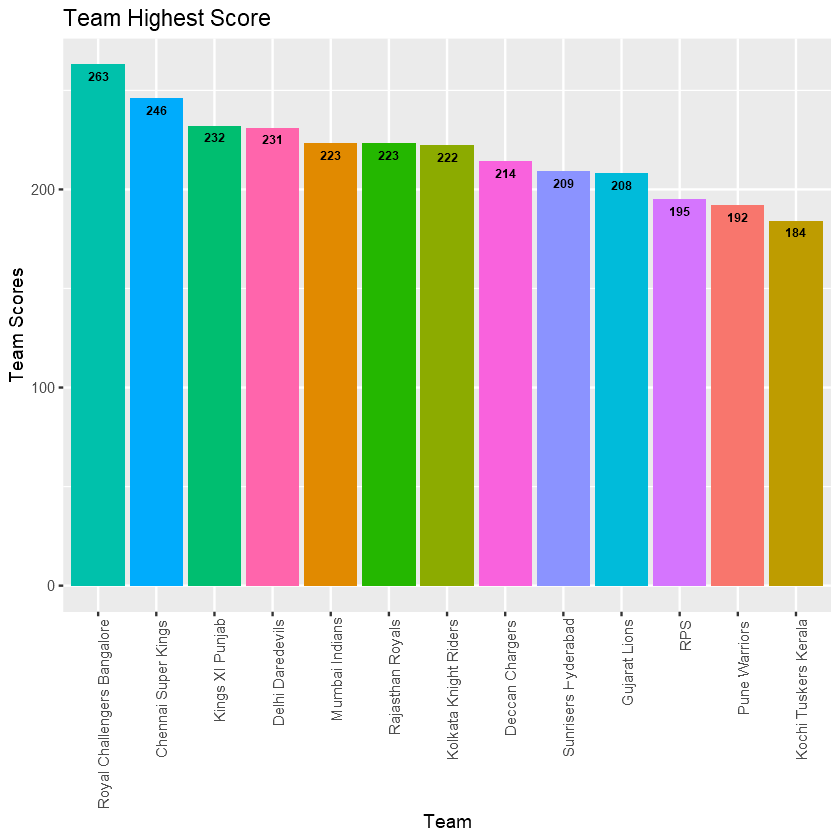

In [42]:
ggplot(data = Team_Analysis , aes(reorder(Team,-THS) , y = THS ,fill = rainbow(13)))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Team Scores", title = "Team Highest Score") +
      geom_text(aes(label = THS),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
      theme(axis.text.x = element_text(angle = 90, hjust = 1))+
      guides(fill=F) 

Using Team as id variables


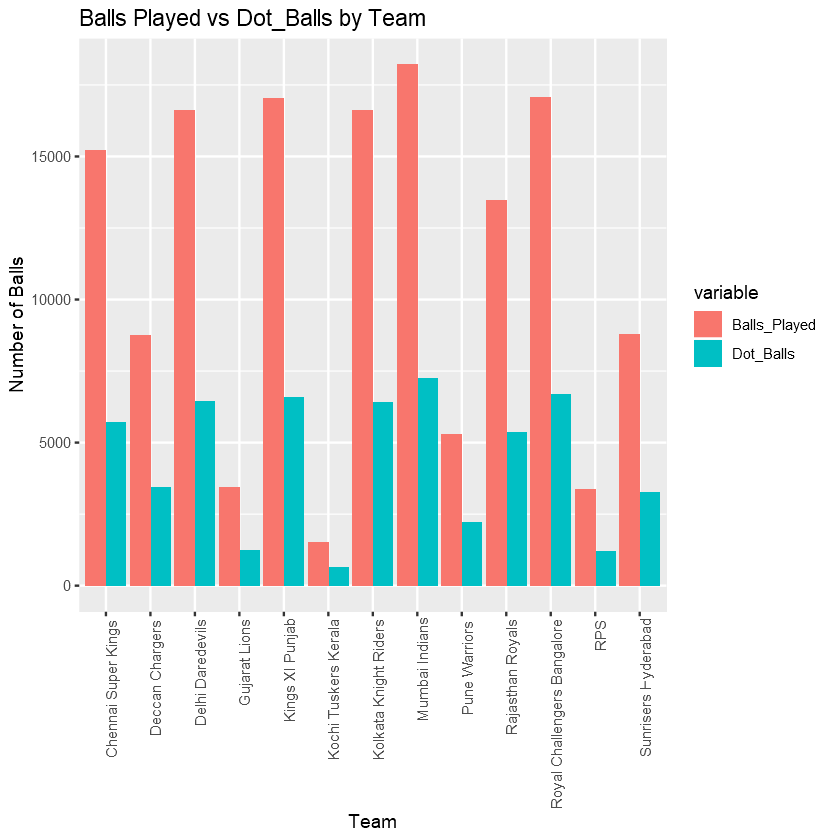

In [43]:
melt(Team_BAT_Analysis) %>% 
     filter(variable %in% c("Balls_Played", "Dot_Balls")) %>% 
     ggplot(aes(x =  Team , y = value,fill = variable))+
      geom_bar(stat ="identity",position="dodge") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Number of Balls", 
       title = "Balls Played vs Dot_Balls by Team") 

Using Team as id variables


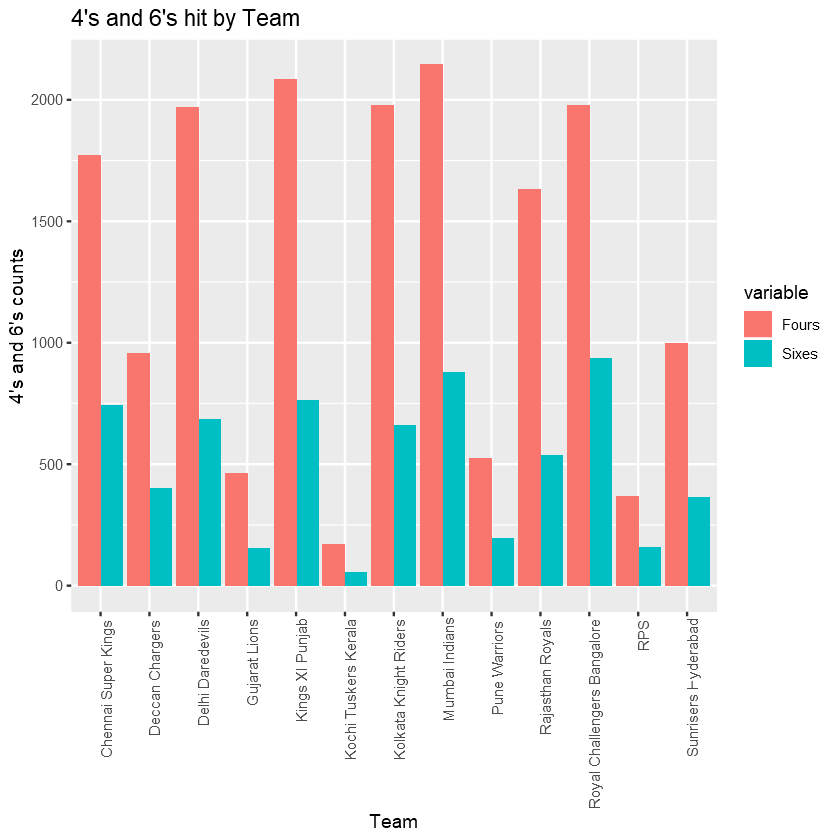

In [44]:
melt(Team_BAT_Analysis) %>% 
     filter(variable %in% c("Fours", "Sixes")) %>% 
     ggplot(aes(x =  Team , y = value,fill = variable))+
      geom_bar(stat ="identity",position="dodge") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "4's and 6's counts ", 
       title = "4's and 6's hit by Team")

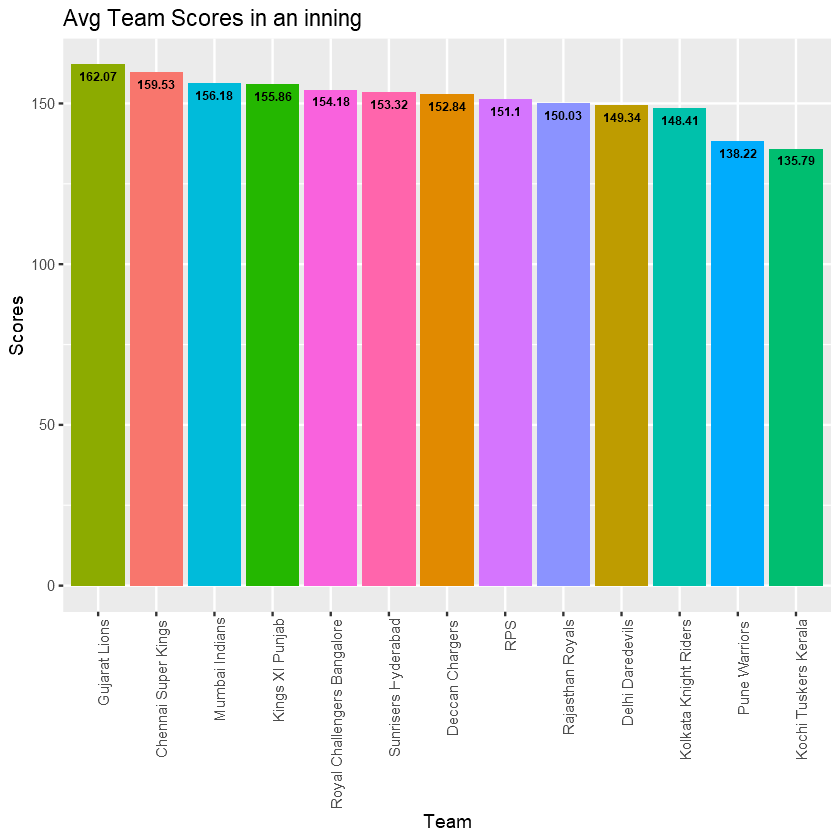

In [45]:
ggplot(data = table , aes(reorder(Team,-Avg_Score) , y = Avg_Score ,fill = Team))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Scores", title = "Avg Team Scores in an inning") +
      geom_text(aes(label = Avg_Score),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
      theme(axis.text.x = element_text(angle = 90, hjust = 1))+
      guides(fill=F) 

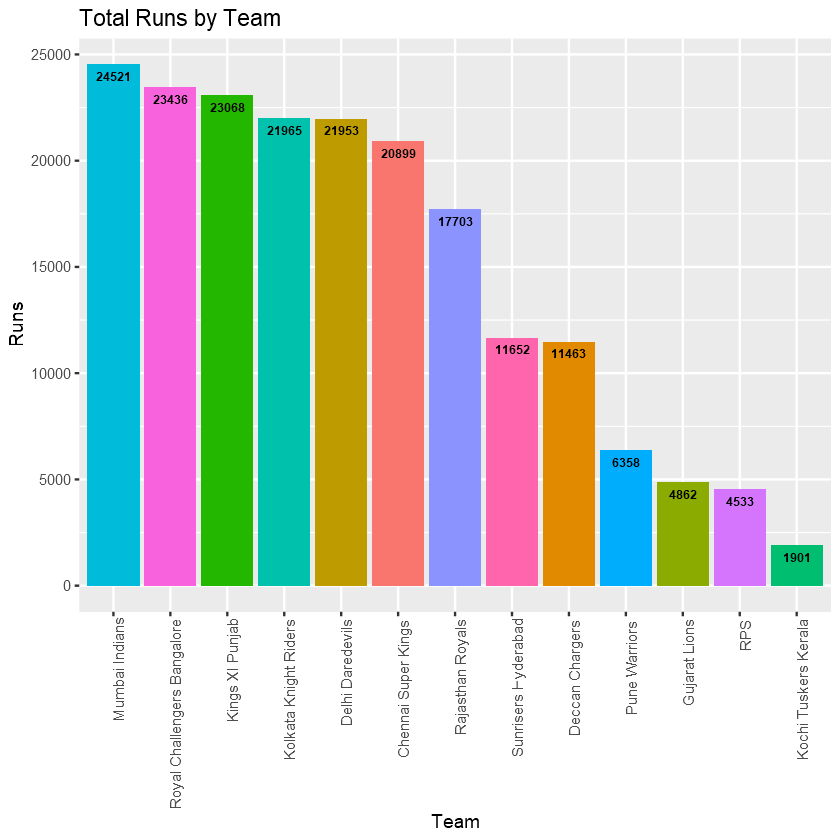

In [46]:
ggplot(data = table , aes(reorder(Team,-Total_Runs) , y = Total_Runs ,fill = Team))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Runs", title = "Total Runs by Team ") +
      geom_text(aes(label = Total_Runs),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
      theme(axis.text.x = element_text(angle = 90, hjust = 1))+
      guides(fill=F) 

Using Team as id variables


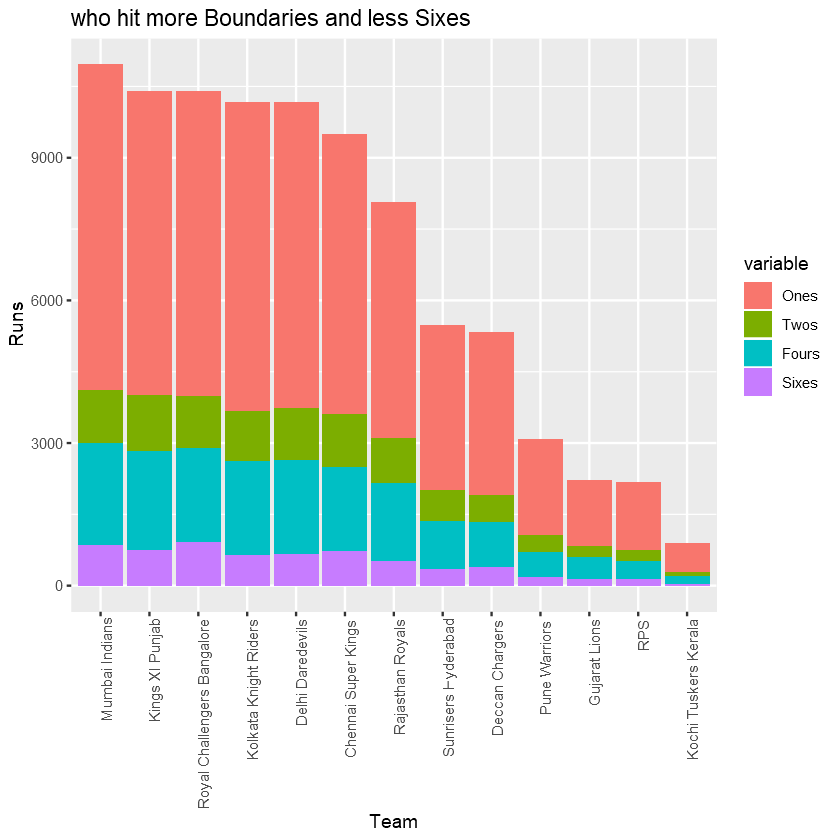

In [47]:
melt(Team_BAT_Analysis) %>% 
     filter(variable %in% c("Ones","Twos","Fours","Sixes")) %>% 
      ggplot(aes(reorder(Team ,-value),value,fill = variable))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Team" , y = "Runs", 
      title = "who hit more Boundaries and less Sixes") 

Using Team as id variables


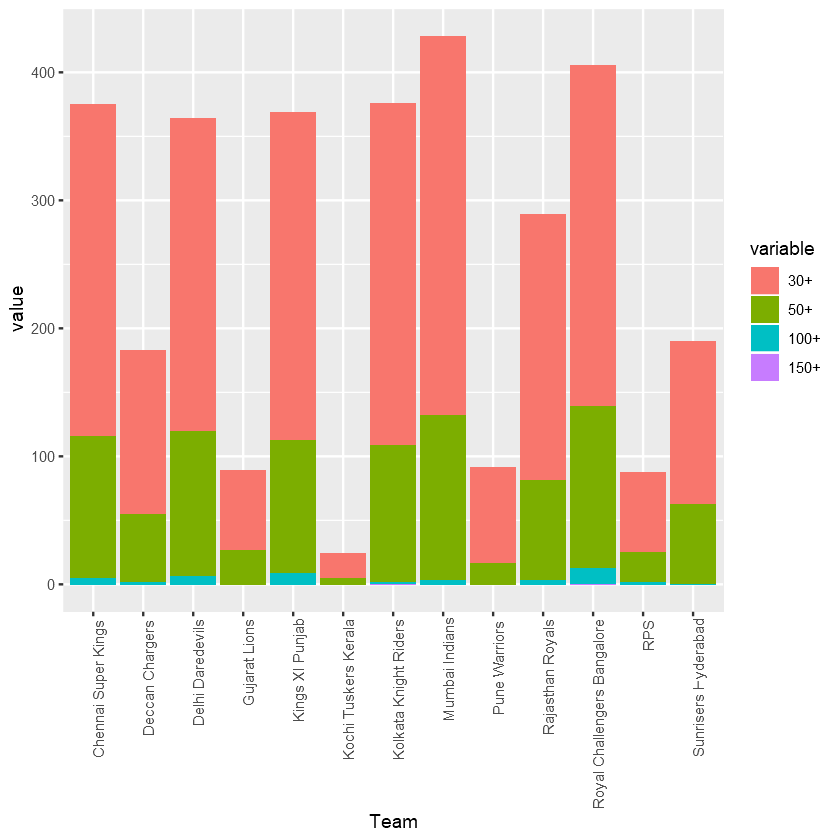

In [48]:
melt(Team_BAT_Analysis) %>% 
     filter(variable %in% c("30+","50+","100+","150+"))%>% 
      ggplot(aes(Team,value,fill = variable))+
      geom_bar(stat ="identity") + 
      theme(axis.text.x = element_text(angle = 90, hjust = 1))

Using Team as id variables


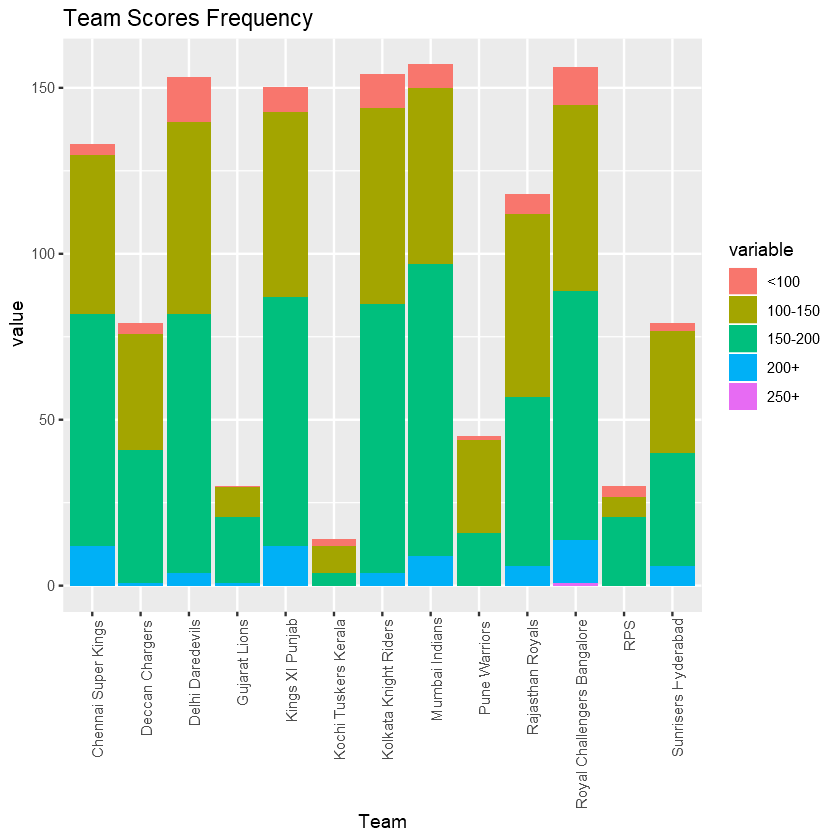

In [49]:
melt(Team_BAT_Analysis) %>% 
     filter(variable %in% c("<100","100-150","150-200","200+","250+"))%>% 
      ggplot(aes(Team,value,fill = variable))+
      geom_bar(stat ="identity") + 
      theme(axis.text.x = element_text(angle = 90, hjust = 1))+
      ggtitle("Team Scores Frequency") 

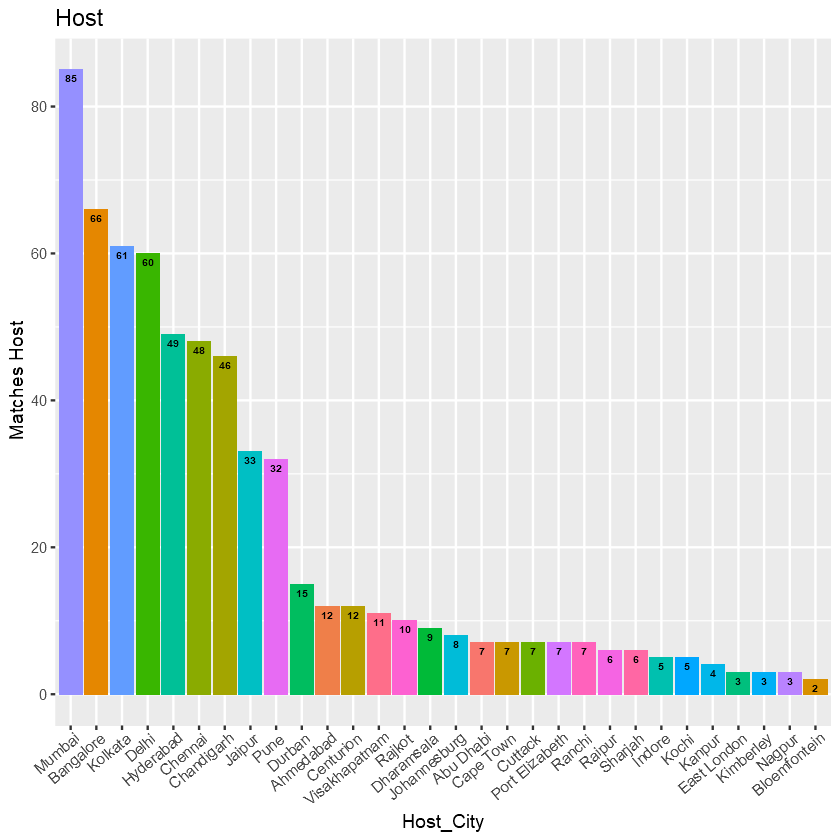

In [50]:
Host_City <- sqldf("select city Host_City, count(city) Matches from m group by city 
                     order by Matches desc") %>% filter(Host_City !="") 



ggplot(data = Host_City , aes(reorder(Host_City,-Matches) , y = Matches ,fill = Host_City))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Host_City" , y = "Matches Host", title = "Host") +
      geom_text(aes(label = Matches),color="black",fontface = "bold",size =2,vjust = 1.8)+
      theme(axis.text.x = element_text(angle = 40, hjust = 1))+
      guides(fill=F) 

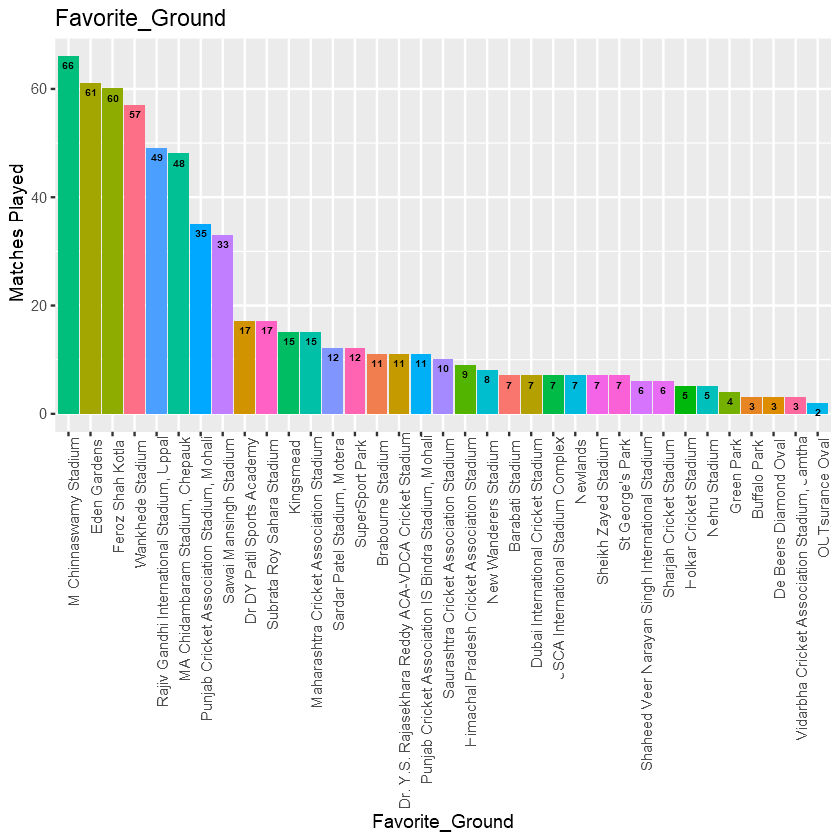

In [51]:
Favorite_Ground <- sqldf("select venue Favorite_Ground , count(venue) Matches from m 
                 group by venue order by Matches desc") 


ggplot(data = Favorite_Ground , aes(reorder(Favorite_Ground,-Matches) , y = Matches ,fill = Favorite_Ground))+
      geom_bar(stat ="identity") +
      theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
      labs(x = "Favorite_Ground" , y = "Matches Played", title = "Favorite_Ground") +
      geom_text(aes(label = Matches),color="black",fontface = "bold",size =2,vjust = 1.8)+
      theme(axis.text.x = element_text(angle = 90, hjust = 1))+
      guides(fill=F)  

In [52]:
Trophy_Winner <-   sqldf("select id , season,winner from m where id in(select max(id) 
                         from m group by season) order by season " )  

In [53]:
Trophy_Winner

id,season,winner
117,2008,Rajasthan Royals
174,2009,Deccan Chargers
234,2010,Chennai Super Kings
307,2011,Chennai Super Kings
381,2012,Kolkata Knight Riders
457,2013,Mumbai Indians
517,2014,Kolkata Knight Riders
576,2015,Mumbai Indians
636,2016,Sunrisers Hyderabad
59,2017,Mumbai Indians


In [54]:
m %>% 
select(id , team1,team2,win_by_runs ,win_by_wickets) %>% 
filter(win_by_wickets ==0 & win_by_runs ==0) 

#10 Times ; out of which 7 times Matches tie and 3 times Matches ended with no results in IPL history 

# Match_ID : 34,126,190,301,388,401,476,536,546,571 

id,team1,team2,win_by_runs,win_by_wickets
34,Gujarat Lions,Mumbai Indians,0,0
126,Rajasthan Royals,Kolkata Knight Riders,0,0
190,Kings XI Punjab,Chennai Super Kings,0,0
301,Delhi Daredevils,Pune Warriors,0,0
388,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0
401,Delhi Daredevils,Royal Challengers Bangalore,0,0
476,Rajasthan Royals,Kolkata Knight Riders,0,0
536,Rajasthan Royals,Kings XI Punjab,0,0
546,Royal Challengers Bangalore,Rajasthan Royals,0,0
571,Delhi Daredevils,Royal Challengers Bangalore,0,0


In [55]:
table(m$result)


no result    normal       tie 
        3       626         7 

In [56]:
table(m$win_by_wickets) #Total Matches : no_result + normal + tie = 636 played in IPL 


  0   1   2   3   4   5   6   7   8   9  10 
297   1   4  15  34  57  68  70  48  32  10 

In [57]:
#Team Analysis when Matches Tie 
#win by runs means       : successful defend 
#win by wickets means    : successful chase 

  m %>% 
  select(id ,result,win_by_runs,win_by_wickets) %>% 
  filter(win_by_runs == 0 & win_by_wickets ==0) 

id,result,win_by_runs,win_by_wickets
34,tie,0,0
126,tie,0,0
190,tie,0,0
301,no result,0,0
388,tie,0,0
401,tie,0,0
476,tie,0,0
536,tie,0,0
546,no result,0,0
571,no result,0,0


In [58]:
normal_result <- sqldf("select id,result,win_by_runs,win_by_wickets from m 
                 where result NOT in('tie','no result')") 

In [59]:
sqldf("select id ,count(*) from normal_result where win_by_wickets != 0") #Matches_Won_by_Team_while_chasing :339

id,count(*)
635,339


In [60]:
sqldf("select id ,count(*) from normal_result where win_by_runs != 0") #Matches_Won_by_Team_while_defending :287

id,count(*)
636,287


In [61]:
# Total Matches Played                 : 636 
# Matches Tie                          :  07  => chance of Match Tie : 1 %
# Matches Ended with no Results        :  03  => chance of Match end with no result : 0.5 %
# Matches Won by Team while chasing    : 339  => chance of successful chase  : 53.3 %
# Matches Won by Team while defending  : 287  => chance of successful defend : 45.2 % 

In [62]:
super_match <- sqldf("select match_id ,inning ,batting_team ,bowling_team,sum(total_runs) Total_Runs from d 
               where is_super_over !=0 group by match_id , inning,batting_team" )

In [63]:
super_match 

match_id,inning,batting_team,bowling_team,Total_Runs
34,3,Mumbai Indians,Gujarat Lions,11
34,4,Gujarat Lions,Mumbai Indians,6
126,3,Kolkata Knight Riders,Rajasthan Royals,15
126,4,Rajasthan Royals,Kolkata Knight Riders,18
190,3,Chennai Super Kings,Kings XI Punjab,9
190,4,Kings XI Punjab,Chennai Super Kings,10
388,3,Sunrisers Hyderabad,Royal Challengers Bangalore,20
388,4,Royal Challengers Bangalore,Sunrisers Hyderabad,15
401,3,Royal Challengers Bangalore,Delhi Daredevils,15
401,4,Delhi Daredevils,Royal Challengers Bangalore,11


In [64]:
#exception  match_id : 476 , scores level even in super over .  

In [65]:
super_match %>% 
       group_by(match_id) %>% 
       mutate(Rank = rank(Total_Runs))%>%
       filter(Rank == 2) #exception  match_id : 476 , scores level even in super over .  
       

#as per below data ; out of 6 --> Team won 4 times who bat first and 2 Times while chasing target in super over !!

# gone through below article to figure it out how they decide the winner after scores level even in super over 

# http://www.espncricinfo.com/series/8048/report/729315/kolkata-knight-riders-vs-rajasthan-royals-19th-match-pepsi-indian-premier-league-2014

match_id,inning,batting_team,bowling_team,Total_Runs,Rank
34,3,Mumbai Indians,Gujarat Lions,11,2
126,4,Rajasthan Royals,Kolkata Knight Riders,18,2
190,4,Kings XI Punjab,Chennai Super Kings,10,2
388,3,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2
401,3,Royal Challengers Bangalore,Delhi Daredevils,15,2
536,3,Kings XI Punjab,Rajasthan Royals,15,2


In [66]:
#Match : 476 Analysis 

sqldf("select match_id,inning ,batting_team ,is_super_over ,
      count(total_runs) Boundaries  from d where match_id == 476 and is_super_over ==0 
     and batting_team =='Rajasthan Royals' and total_runs == 4")

sqldf("select match_id,inning ,batting_team ,is_super_over ,
      count(total_runs) Sixes  from d where match_id == 476 and is_super_over ==0 
     and batting_team =='Rajasthan Royals' and total_runs == 6")

sqldf("select match_id,inning ,batting_team ,is_super_over ,
      count(total_runs) Boundaries  from d where match_id == 476 and is_super_over ==0 
     and batting_team =='Kolkata Knight Riders' and total_runs == 4")

sqldf("select match_id,inning ,batting_team ,is_super_over ,
      count(total_runs) Sixes  from d where match_id == 476 and is_super_over ==0 
     and batting_team =='Kolkata Knight Riders' and total_runs == 6")

#as per below Data : RR hit more Boundaries (17) than KKR(12) hence winner of match(476) is Rajasthan Royal 

match_id,inning,batting_team,is_super_over,Boundaries
476,1,Rajasthan Royals,0,17


match_id,inning,batting_team,is_super_over,Sixes
476,1,Rajasthan Royals,0,1


match_id,inning,batting_team,is_super_over,Boundaries
476,2,Kolkata Knight Riders,0,12


match_id,inning,batting_team,is_super_over,Sixes
476,2,Kolkata Knight Riders,0,2


In [67]:
# Orange Cap Holders 

d1 <- sqldf("select match_id , batsman , sum(batsman_runs) runs from d group by match_id , batsman order by runs desc")

m1 <- sqldf("select id ,season from m") 

d1m1 <- merge(x = d1 , y = m1,by.x =  "match_id",by.y ="id"  , all.x = T) 

d1m2 <- sqldf("select season,batsman ,sum(runs) Total_Runs from d1m1 
               group by season , batsman ")

d1m3 <- d1m2 %>% 
  group_by(season) %>%  
  mutate(Rank = rank(Total_Runs))%>% 
  filter(Rank == max(Rank)) 


#This Explains : in season 2010 Sachin batted well than rest 163 Batsmen and scored 618 (example)
#Theory applicable in all seasons for all batsmen for below observations .

In [68]:
d1m3 #Orange Cap holder  

season,batsman,Total_Runs,Rank
2008,SE Marsh,616,154
2009,ML Hayden,572,150
2010,SR Tendulkar,618,164
2011,CH Gayle,608,180
2012,CH Gayle,733,170
2013,MEK Hussey,733,172
2014,RV Uthappa,660,133
2015,DA Warner,562,129
2016,V Kohli,973,136
2017,DA Warner,641,143


In [69]:
d1m3$label <- paste(d1m3$batsman ,d1m3$Total_Runs,sep = " :     ")

ocw <- ggplot(data = d1m3 , aes(x = season , y = Total_Runs ))+
      geom_bar(stat ="identity",fill = "orange") + 
      theme(axis.text.x = element_text(angle = 0, hjust = 1)) + 
      scale_x_continuous(breaks=c(2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
      scale_y_continuous(breaks=c(100,200,300,400,500,600,700,800,900,1000))+
      geom_text(aes(label = label),color="darkblue",fontface = "bold",size =2.8,vjust = 0.8, hjust = 1.1)+
      labs(title = "Orange Cap winners") +
      guides(fill = FALSE) +
      coord_flip() 

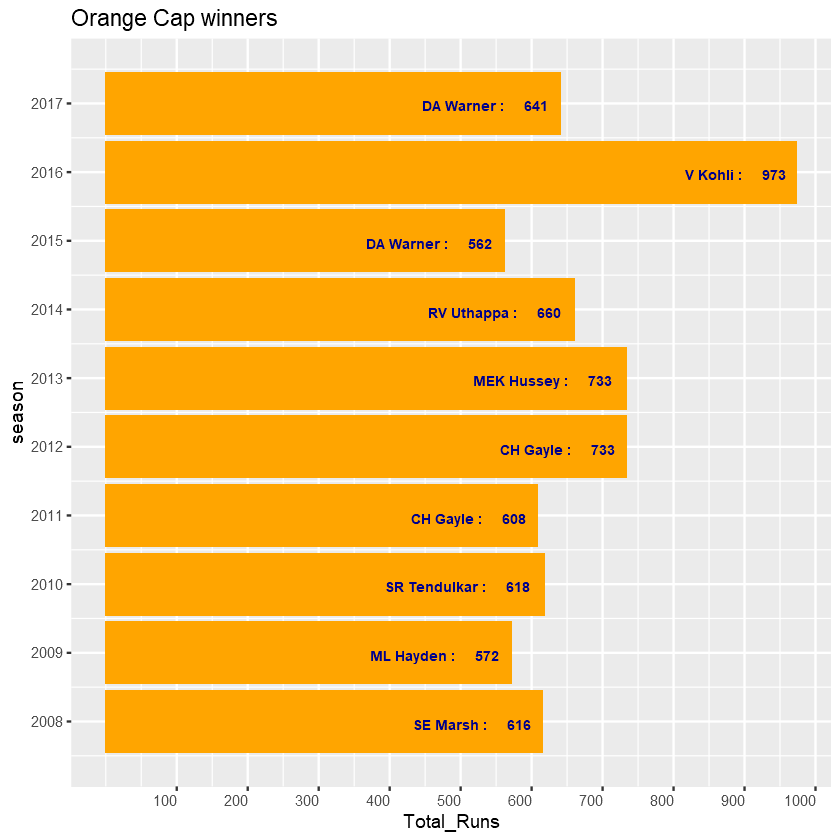

In [70]:
ocw

In [71]:
table(d$over)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
8092 8018 7932 7902 7874 7865 7827 7799 7775 7726 7668 7637 7615 7536 7457 7332 
  17   18   19   20 
7234 6979 6543 5649 

In [72]:
#Power Play analysis .

pd <- d %>% 
       filter(over %in% c(1,2,3,4,5,6)) 

p_f <- sqldf("select batting_team Team ,count(total_runs) Fours from pd 
          where total_runs = 4 group by batting_team order by Fours desc")


p_s <- sqldf("select batting_team Team ,count(total_runs) Sixes from pd 
      where total_runs = 6 group by batting_team order by Sixes desc")



#highest score in power play by team

p_THS <- sqldf("select match_id ,batting_team Team ,sum(total_runs) THS  from pd group by match_id ,batting_team") %>% 
      group_by(Team) %>% 
      filter(THS == max(THS)) %>% 
      arrange(-THS) %>% 
      distinct(Team,.keep_all= TRUE) 

# KKR is on TOP with 105 runs ,
# however Gujarat Lions Highest score 72 and scored three times in match_id 23 , 595,601 respectively !!

p_THS # Team Highest Total in power play in an inning 

match_id,Team,THS
45,Kolkata Knight Riders,105
516,Chennai Super Kings,100
294,Kochi Tuskers Kerala,87
496,Kings XI Punjab,86
172,Deccan Chargers,84
568,Royal Challengers Bangalore,83
22,Mumbai Indians,82
36,Sunrisers Hyderabad,79
40,RPS,74
68,Rajasthan Royals,73


In [73]:
p_rr <- sqldf("select batting_team Team , count(ball) Balls_Played,sum(total_runs) Total_Runs
        from pd group by batting_team") %>% 
        mutate(Strike_Rate = round((Total_Runs  / Balls_Played) *100, 2) ,
               Run_Rate = round((Total_Runs)/((Balls_Played)/6),2)) %>% 
               arrange(-Strike_Rate) # it makes sense as Strike_Rate of teams directly proportional to Run Rate 


p_db <- sqldf("select batting_team Team , count(total_runs) Dot_Balls from pd 
               where total_runs =0 group by batting_team") 



P_Play_BAT_Team  <- sqldf("select p_f.Team ,
                                  p_f.Fours,
                                  p_s.Sixes, 
                                  p_THS.THS,
                                  p_rr.Balls_Played,
                                  p_rr.Total_Runs,
                                  p_rr.Strike_Rate,
                                  p_rr.Run_Rate,
                                  p_db.Dot_Balls from p_f 
                                  inner join p_s 
                                  on p_f.Team = p_s.Team 
                                  inner join p_THS
                                   on p_f.Team = p_THS.Team
                                  inner join p_rr
                                  on p_f.Team = p_rr.Team 
                                  inner join p_db 
                                   on p_f.Team = p_db.Team")


setnames(P_Play_BAT_Team , c("Fours","Sixes","THS","Balls_Played","Total_Runs","Strike_Rate","Run_Rate","Dot_Balls"),
        c("P_Fours","P_Sixes","P_THS","P_Balls_Played","P_Total_Runs","P_Strike_Rate","P_Run_Rate","P_Dot_Balls"))

In [74]:
P_Play_BAT_Team #how well team batted in power play 

Team,P_Fours,P_Sixes,P_THS,P_Balls_Played,P_Total_Runs,P_Strike_Rate,P_Run_Rate,P_Dot_Balls
Kings XI Punjab,876,160,86,5569,6854,123.07,7.38,2526
Kolkata Knight Riders,863,144,105,5583,6755,120.99,7.26,2533
Mumbai Indians,858,168,82,5952,6946,116.70,7.00,2826
Delhi Daredevils,841,160,71,5504,6665,121.09,7.27,2524
Royal Challengers Bangalore,801,199,83,5668,6628,116.94,7.02,2781
Chennai Super Kings,723,177,100,4910,6021,122.63,7.36,2312
Rajasthan Royals,685,100,73,4382,5065,115.59,6.94,2130
Sunrisers Hyderabad,440,65,79,2838,3501,123.36,7.40,1218
Deccan Chargers,402,101,84,2819,3417,121.21,7.27,1301
Pune Warriors,235,34,64,1680,1895,112.80,6.77,795


In [75]:
#Death over Analysis : overs 16 to 20 

dd <- d %>% 
       filter(over %in% c(16,17,18,19,20)) 




d_f <- sqldf("select batting_team Team ,count(total_runs) Fours from dd 
          where total_runs = 4 group by batting_team order by Fours desc")


d_s <- sqldf("select batting_team Team ,count(total_runs) Sixes from dd 
      where total_runs = 6 group by batting_team order by Sixes desc")



d_THS <- sqldf("select match_id ,batting_team Team ,sum(total_runs) THS  from dd group by match_id ,batting_team") %>% 
      group_by(Team) %>% 
      filter(THS == max(THS)) %>% 
      arrange(-THS) %>% 
      distinct(Team,.keep_all= TRUE) 



In [76]:
d_THS

match_id,Team,THS
620,Royal Challengers Bangalore,112
435,Chennai Super Kings,87
92,Kolkata Knight Riders,86
9,Delhi Daredevils,82
326,Rajasthan Royals,82
526,Mumbai Indians,81
486,Kings XI Punjab,78
496,Sunrisers Hyderabad,78
328,Deccan Chargers,77
629,RPS,70


In [77]:
d_rr <- sqldf("select batting_team Team , count(ball) Balls_Played,sum(total_runs) Total_Runs
        from dd group by batting_team") %>% 
        mutate(Strike_Rate = round((Total_Runs  / Balls_Played) *100, 2) ,
               Run_Rate = round((Total_Runs)/((Balls_Played)/6),2)) %>% 
               arrange(-Strike_Rate) # it makes sense as Strike_Rate of teams directly proportional to Run Rate  


d_db <- sqldf("select batting_team Team , count(total_runs) Dot_Balls from dd 
               where total_runs =0 group by batting_team") 



In [78]:
D_Over_BAT_Team  <- sqldf("select d_f.Team ,
                                  d_f.Fours,
                                  d_s.Sixes, 
                                  d_THS.THS,
                                  d_rr.Balls_Played,
                                  d_rr.Total_Runs,
                                  d_rr.Strike_Rate,
                                  d_rr.Run_Rate,
                                  d_db.Dot_Balls from d_f 
                                  inner join d_s 
                                  on d_f.Team = d_s.Team 
                                  inner join d_THS
                                   on d_f.Team = d_THS.Team
                                  inner join d_rr
                                  on d_f.Team = d_rr.Team 
                                  inner join d_db 
                                   on d_f.Team = d_db.Team")



In [79]:
setnames(D_Over_BAT_Team, c("Fours","Sixes","THS","Balls_Played","Total_Runs","Strike_Rate","Run_Rate","Dot_Balls"),
    c("D_Fours","D_Sixes","D_THS","D_Balls_Played","D_Total_Runs","D_Strike_Rate","D_Run_Rate","D_Dot_Balls"))

In [80]:
D_Over_BAT_Team #How well team batted in last Five Overs 

Team,D_Fours,D_Sixes,D_THS,D_Balls_Played,D_Total_Runs,D_Strike_Rate,D_Run_Rate,D_Dot_Balls
Mumbai Indians,529,370,81,4384,7097,161.88,9.71,1166
Royal Challengers Bangalore,487,352,112,3900,6535,167.56,10.05,1050
Kings XI Punjab,459,267,78,3990,6033,151.20,9.07,1123
Delhi Daredevils,436,251,82,3696,5606,151.68,9.10,1056
Kolkata Knight Riders,434,235,86,3702,5648,152.57,9.15,949
Chennai Super Kings,423,275,87,3665,5926,161.69,9.70,861
Rajasthan Royals,353,176,82,3053,4520,148.05,8.88,853
Sunrisers Hyderabad,226,145,78,2106,3238,153.75,9.23,546
Deccan Chargers,218,135,77,2103,3133,148.98,8.94,562
Gujarat Lions,104,34,61,787,1159,147.27,8.84,208


In [81]:
PD_BAT_Team <- merge(x = P_Play_BAT_Team , y = D_Over_BAT_Team , by = "Team") 

In [82]:
PD_BAT_Team

Team,P_Fours,P_Sixes,P_THS,P_Balls_Played,P_Total_Runs,P_Strike_Rate,P_Run_Rate,P_Dot_Balls,D_Fours,D_Sixes,D_THS,D_Balls_Played,D_Total_Runs,D_Strike_Rate,D_Run_Rate,D_Dot_Balls
Chennai Super Kings,723,177,100,4910,6021,122.63,7.36,2312,423,275,87,3665,5926,161.69,9.70,861
Deccan Chargers,402,101,84,2819,3417,121.21,7.27,1301,218,135,77,2103,3133,148.98,8.94,562
Delhi Daredevils,841,160,71,5504,6665,121.09,7.27,2524,436,251,82,3696,5606,151.68,9.10,1056
Gujarat Lions,185,56,72,1125,1559,138.58,8.31,476,104,34,61,787,1159,147.27,8.84,208
Kings XI Punjab,876,160,86,5569,6854,123.07,7.38,2526,459,267,78,3990,6033,151.20,9.07,1123
Kochi Tuskers Kerala,87,16,87,533,680,127.58,7.65,242,26,14,58,305,390,127.87,7.67,96
Kolkata Knight Riders,863,144,105,5583,6755,120.99,7.26,2533,434,235,86,3702,5648,152.57,9.15,949
Mumbai Indians,858,168,82,5952,6946,116.70,7.00,2826,529,370,81,4384,7097,161.88,9.71,1166
Pune Warriors,235,34,64,1680,1895,112.80,6.77,795,103,77,67,1282,1733,135.18,8.11,388
Rajasthan Royals,685,100,73,4382,5065,115.59,6.94,2130,353,176,82,3053,4520,148.05,8.88,853


Using Team as id variables


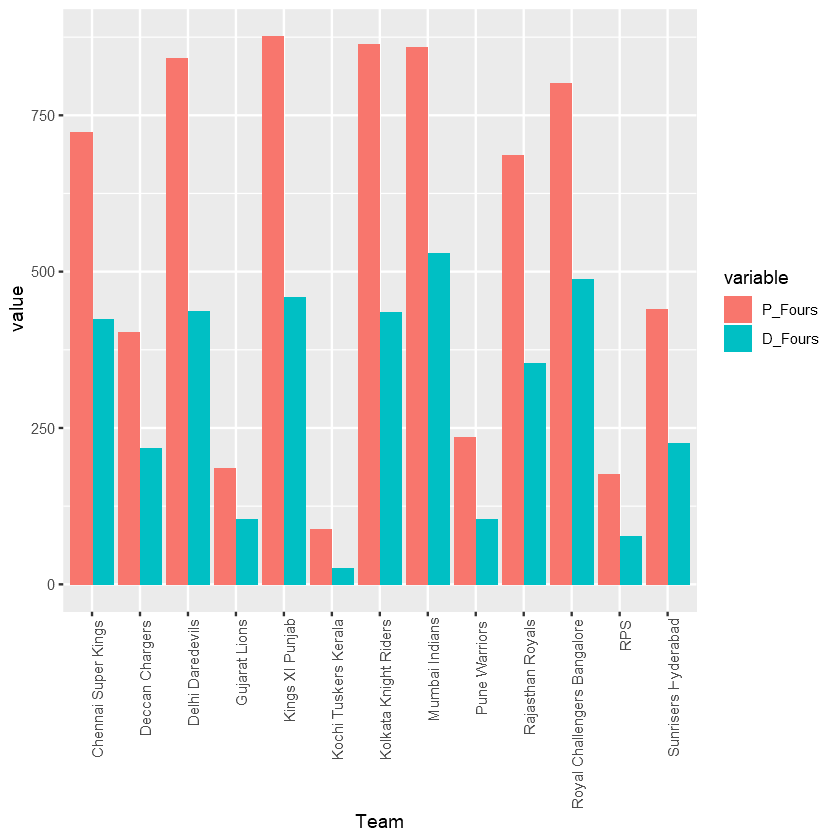

In [83]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Fours","D_Fours")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

#Boundaries and Sixes hit by team in (Power Play  Vs Death Overs) 

Using Team as id variables


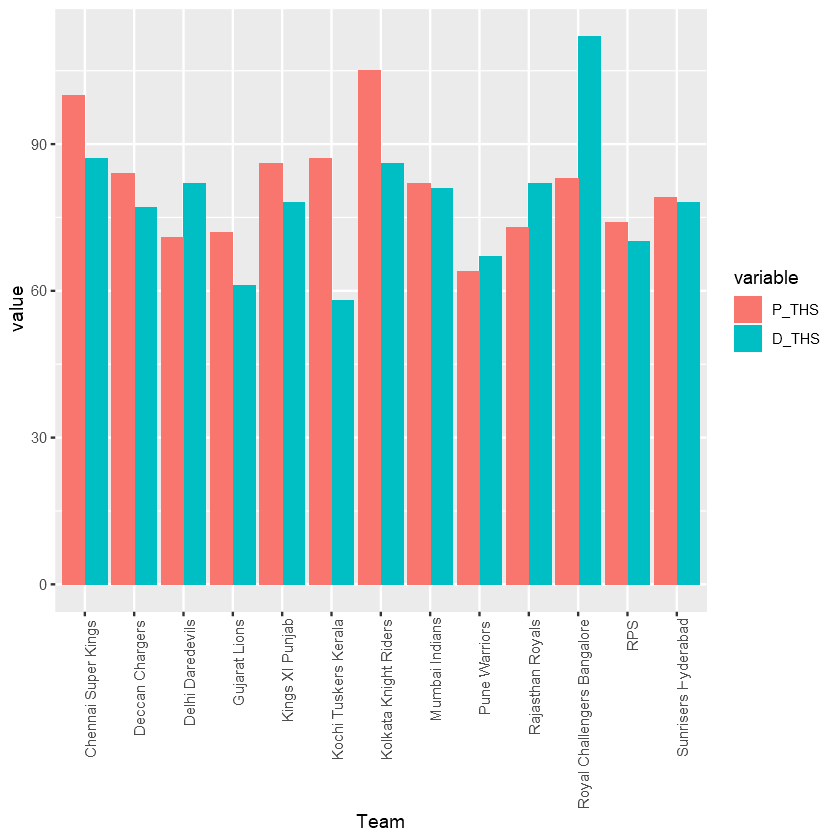

In [84]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_THS","D_THS")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

#Highest Score by team in (Power Play  Vs Death Overs) 

Using Team as id variables


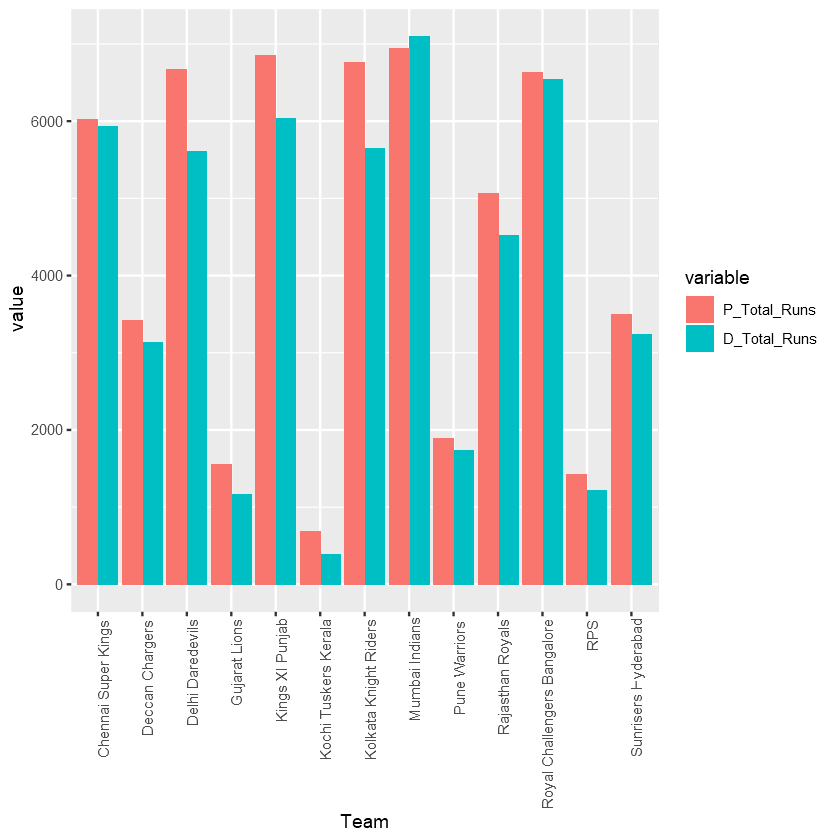

In [85]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Total_Runs","D_Total_Runs")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 


Using Team as id variables


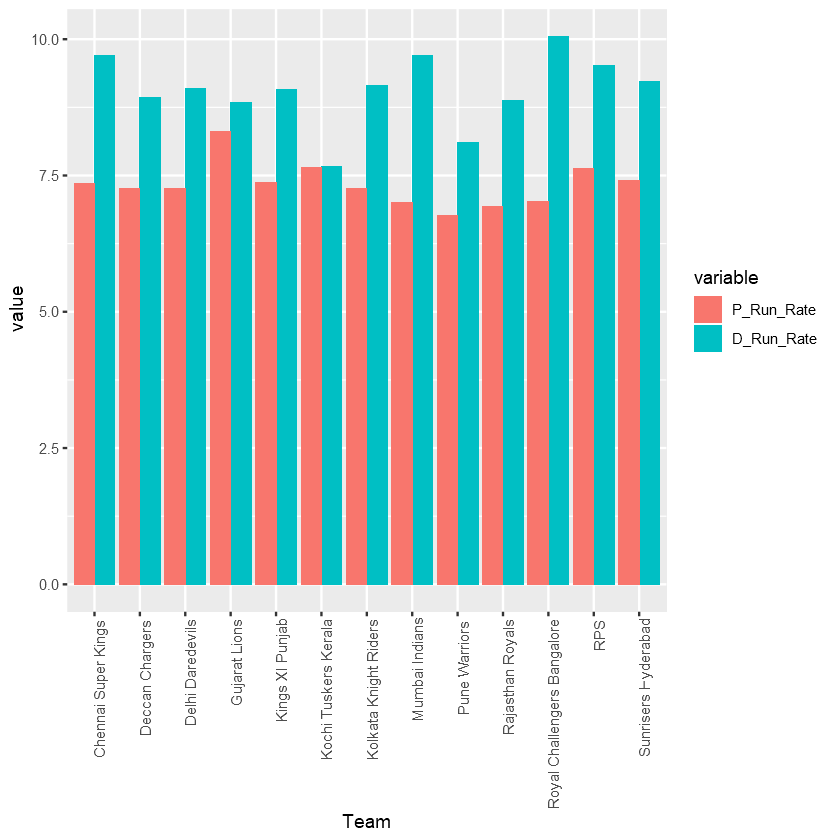

In [86]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Run_Rate","D_Run_Rate")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Using Team as id variables


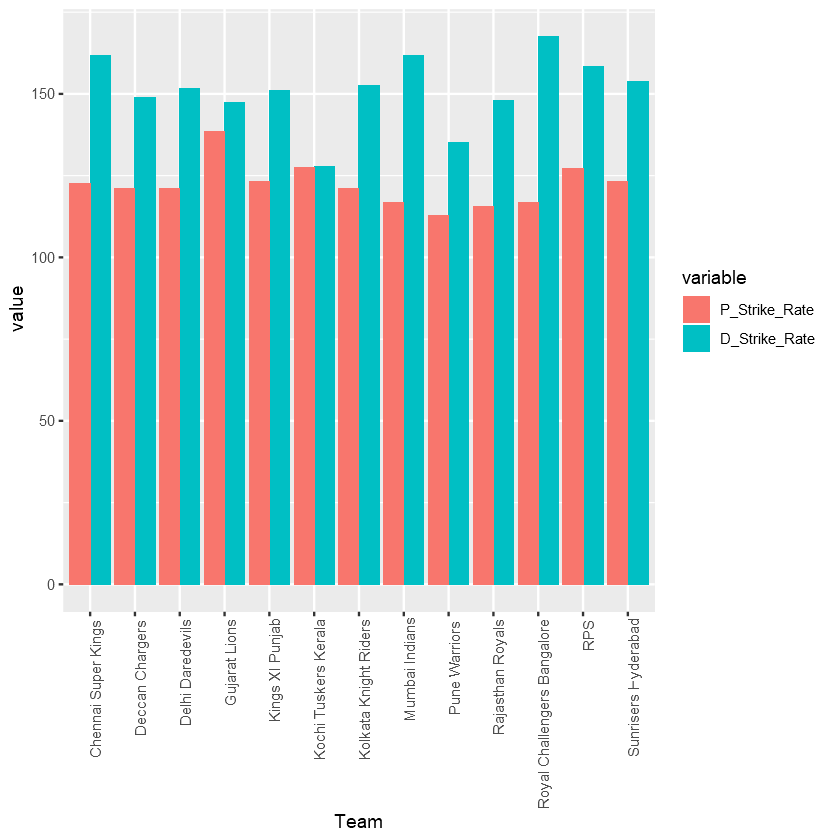

In [87]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Strike_Rate","D_Strike_Rate")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Using Team as id variables


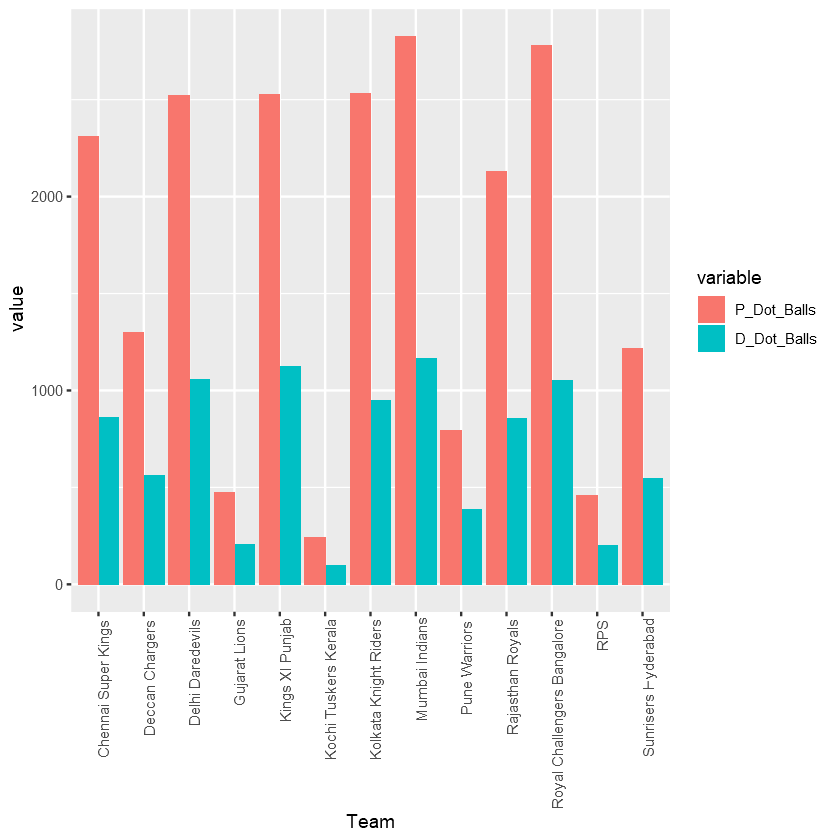

In [88]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Dot_Balls","D_Dot_Balls")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

Using Team as id variables


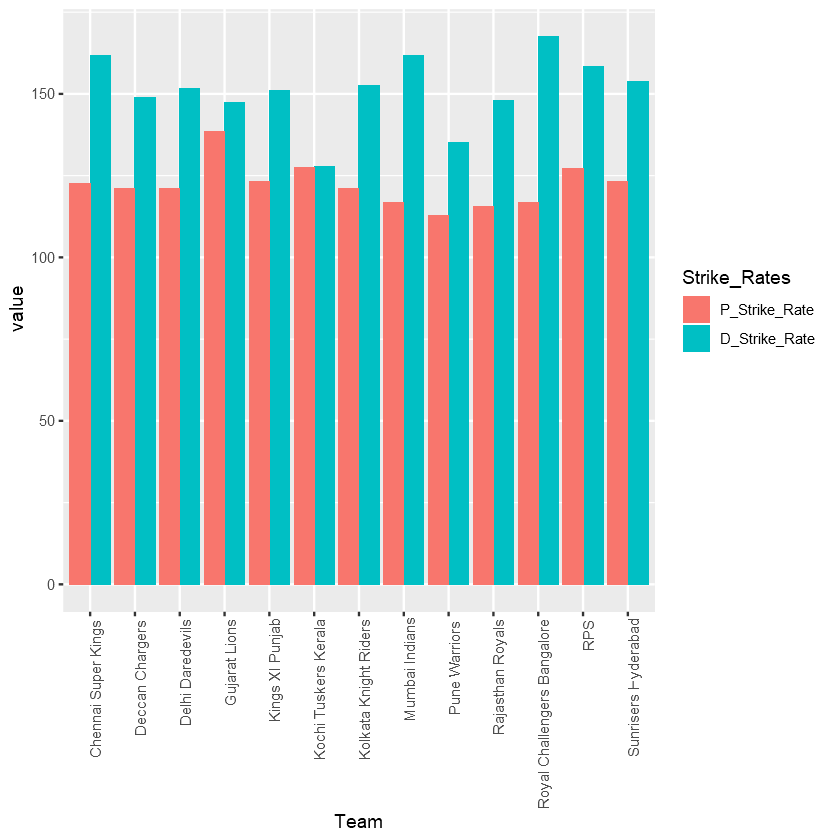

In [89]:
melt(PD_BAT_Team) %>% 
              filter(variable %in% c("P_Strike_Rate","D_Strike_Rate")) %>% 
                ggplot(aes(x =  Team , y = value,fill = variable))+
                geom_bar(stat ="identity",position="dodge") +
                theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
                 labs(fill="Strike_Rates")

In [90]:
KXIP1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Kings XI Punjab' & winner == 'Kings XI Punjab' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

KXIP2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Kings XI Punjab' & winner == 'Kings XI Punjab' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

KXIP <- merge(x = KXIP1 , y = KXIP2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

KXIP[is.na(KXIP)] <- 0

KXIP <- rename(KXIP , Team = team1) 
KXIP <- KXIP %>% 
   mutate (KXIP= c1 + c2 ) %>% 
   select(Team ,KXIP) 

In [91]:
KXIP 

Team,KXIP
Chennai Super Kings,7
Deccan Chargers,7
Delhi Daredevils,11
Gujarat Lions,2
Kochi Tuskers Kerala,1
Kolkata Knight Riders,7
Mumbai Indians,10
Pune Warriors,3
Rajasthan Royals,6
RPS,2


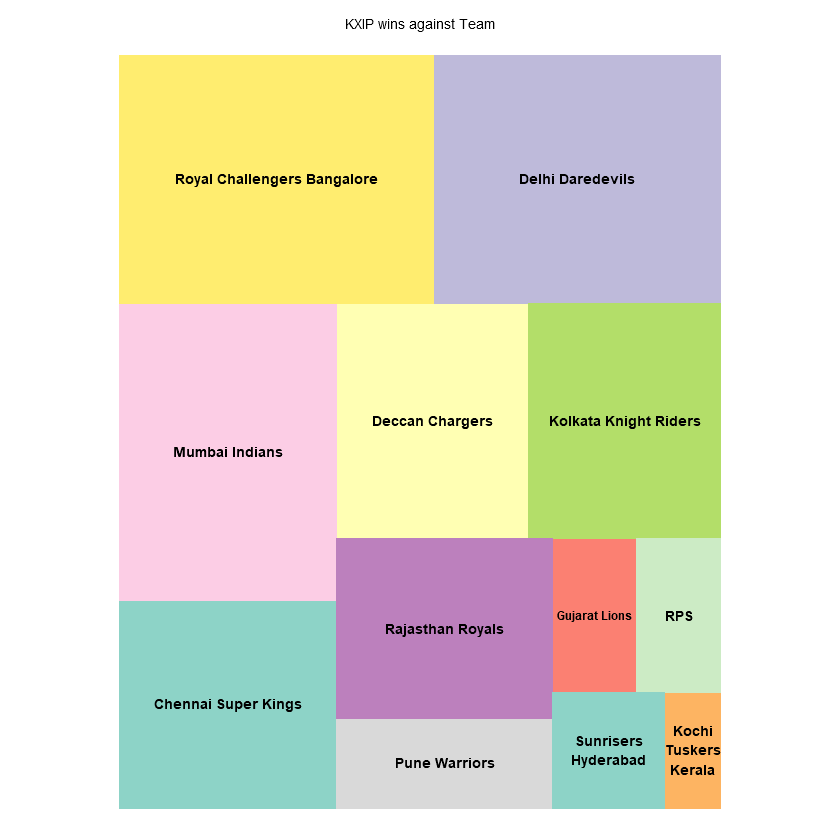

In [261]:
treemap(KXIP ,                          #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "KXIP",                  #  count
       type = "index" ,                 # 
       palette = "Set3",                # color selection
       title = "KXIP wins against Team",# title of the graph
       fontsize.title=08,               # font size of the title
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(0,0),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")       

In [93]:
mi1 <- sqldf("select team1,count(winner) c1 from m where winner = 'Mumbai Indians' 
            AND team1 != 'Mumbai Indians' group by team1") 
mi2 <- sqldf("select team2,count(winner) c2 from m where winner = 'Mumbai Indians' 
            AND team2 != 'Mumbai Indians' group by team2")

MI <- merge(x = mi1 , y = mi2 ,by.x = 'team1' , by.y = 'team2',all= T ) ;
MI[is.na(MI)] <- 0

MI <- rename(MI , Team = team1)
MI <- MI %>% 
   mutate (MI = c1 + c2 ) %>% 
   select(Team ,MI)

In [94]:
MI

Team,MI
Chennai Super Kings,12
Deccan Chargers,6
Delhi Daredevils,11
Gujarat Lions,2
Kings XI Punjab,10
Kolkata Knight Riders,16
Pune Warriors,5
Rajasthan Royals,10
RPS,2
Royal Challengers Bangalore,13


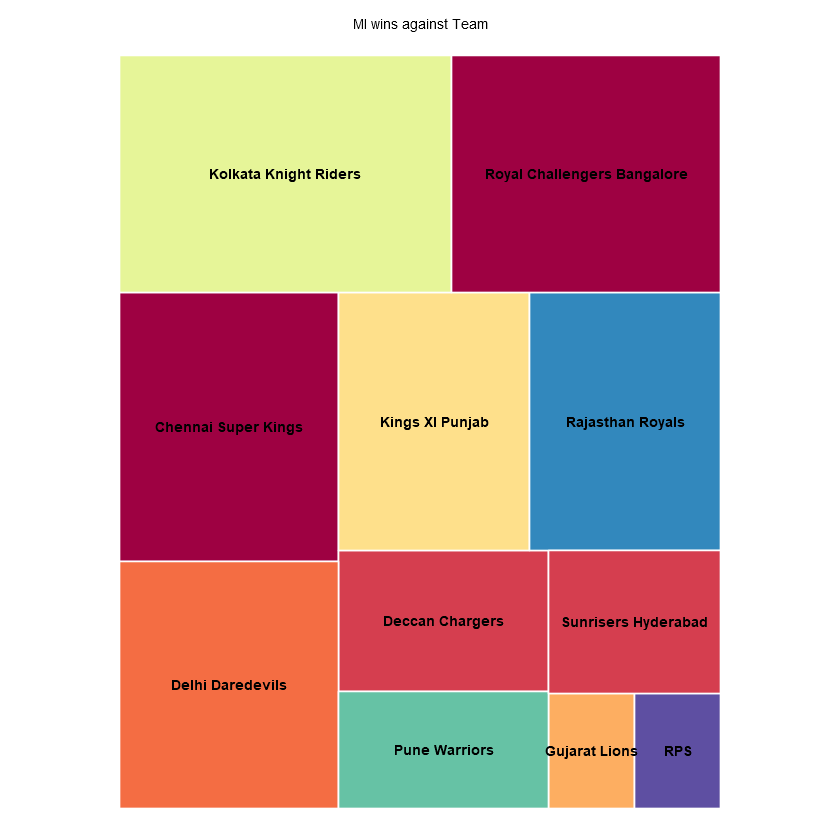

In [260]:
treemap(MI ,                          #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "MI",                  #  count
       type = "index" ,                 # 
       palette = "Spectral",                # color selection
       title = "MI wins against Team",# title of the graph
       fontsize.title=08,               # font size of the title
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [96]:
csk1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Chennai Super Kings' & winner == 'Chennai Super Kings' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

csk2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Chennai Super Kings' & winner == 'Chennai Super Kings' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n()) 

CSK <- merge(x = csk1 , y = csk2 ,by.x = 'team1' , by.y = 'team2',all = T ) ;
CSK[is.na(CSK)] <- 0
CSK <- rename(CSK , Team = team1)

CSK <- CSK %>% 
   mutate (CSK = c1 + c2 ) %>% 
   select(Team ,CSK) 

In [97]:
CSK

Team,CSK
Deccan Chargers,6
Delhi Daredevils,11
Kings XI Punjab,10
Kochi Tuskers Kerala,1
Kolkata Knight Riders,10
Mumbai Indians,10
Pune Warriors,4
Rajasthan Royals,11
Royal Challengers Bangalore,12
Sunrisers Hyderabad,4


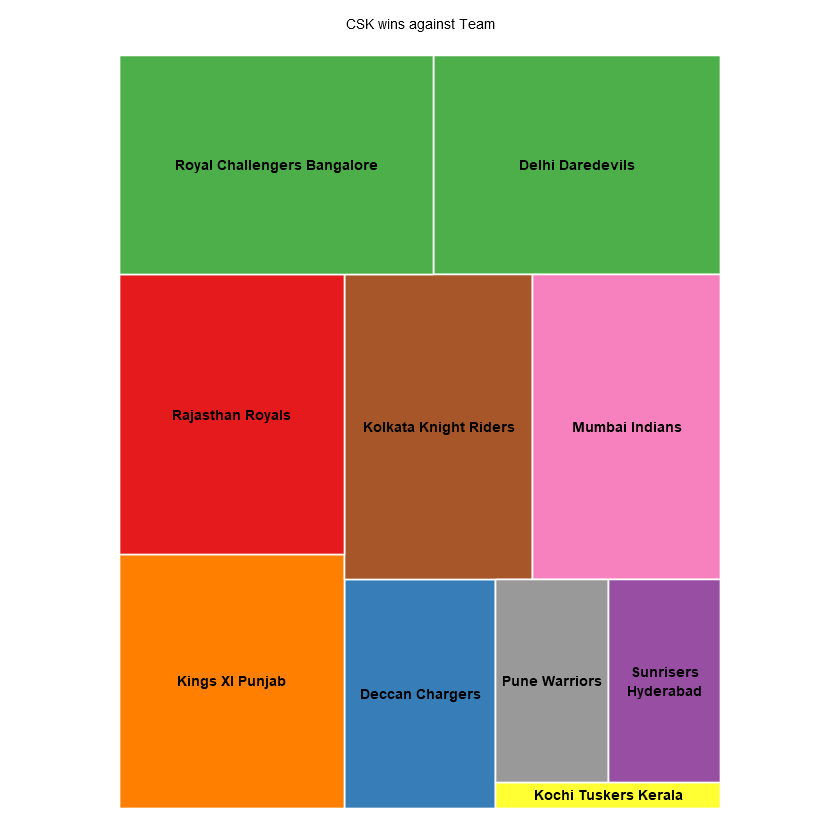

In [259]:
treemap(CSK ,                           #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "CSK",                   
       type = "index" ,                 
       palette = "Set1",                # color selection
       title = "CSK wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [99]:
rcb1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Royal Challengers Bangalore' & winner == 'Royal Challengers Bangalore' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

rcb2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Royal Challengers Bangalore' & winner == 'Royal Challengers Bangalore' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  



RCB <- merge(x = rcb1 , y = rcb2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

RCB[is.na(RCB)] <- 0

RCB <- rename(RCB , Team = team1)

RCB <- RCB %>% 
   mutate (RCB = c1 + c2 ) %>% 
   select(Team ,RCB)


In [100]:
RCB

Team,RCB
Chennai Super Kings,7
Deccan Chargers,5
Delhi Daredevils,12
Gujarat Lions,3
Kings XI Punjab,8
Kochi Tuskers Kerala,2
Kolkata Knight Riders,9
Mumbai Indians,8
Pune Warriors,5
Rajasthan Royals,8


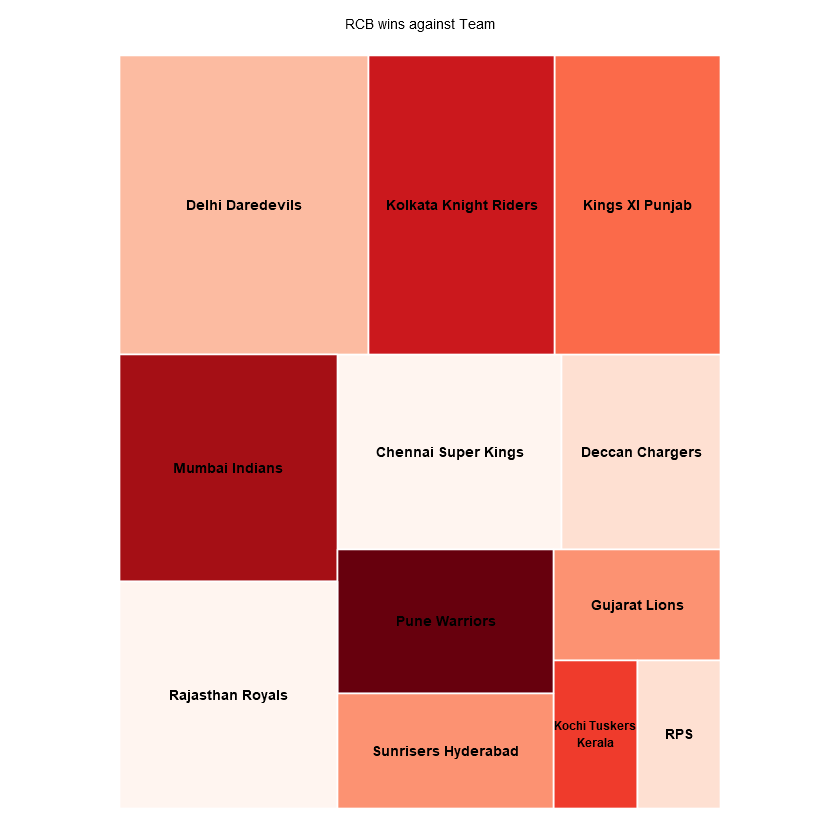

In [258]:
treemap(RCB ,                           #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "RCB",                   #  count
       type = "index" ,                 # 
       palette = "Reds",                # color selection
       title = "RCB wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
       aspRatio= 0.8,
       fontfamily.title = "serif")         

In [102]:
DD1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Delhi Daredevils' & winner == 'Delhi Daredevils' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

DD2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Delhi Daredevils' & winner == 'Delhi Daredevils' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

DD <- merge(x = DD1  , y = DD2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

DD[is.na(DD)] <- 0

DD <- rename(DD , Team = team1)

DD <- DD %>% 
   mutate (DD= c1 + c2 ) %>% 
   select(Team ,DD)

In [103]:
DD

Team,DD
Chennai Super Kings,5
Deccan Chargers,7
Gujarat Lions,3
Kings XI Punjab,9
Kochi Tuskers Kerala,1
Kolkata Knight Riders,7
Mumbai Indians,9
Pune Warriors,3
Rajasthan Royals,6
RPS,2


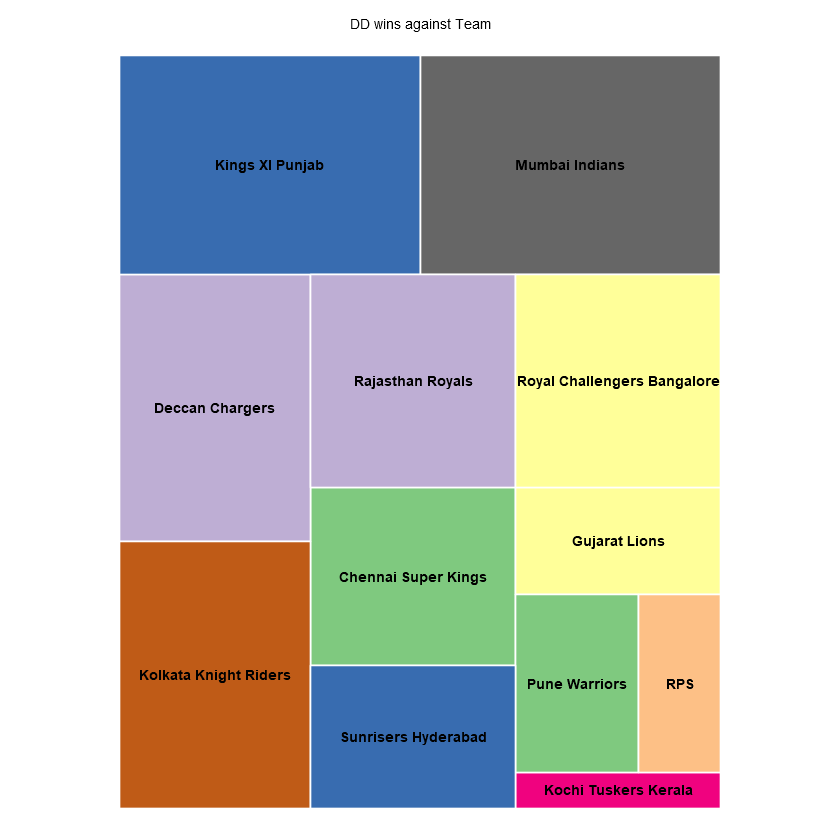

In [257]:
treemap(DD ,                            # Data Frame
       index = "Team" ,                 # variables  
       vSize = "DD",                    # count
       type = "index" ,             
       palette = "Accent",              # color selection
       title = "DD wins against Team",  # title of the graph
       fontsize.title=08,               # font size of the title
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
       aspRatio= 0.8,
       fontfamily.title = "serif")      

In [105]:
KKR1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Kolkata Knight Riders' & winner == 'Kolkata Knight Riders' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

KKR2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Kolkata Knight Riders' & winner == 'Kolkata Knight Riders' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

KKR <- merge(x = KKR1  , y = KKR2,by.x = 'team1' , by.y = 'team2',all = T ) 

KKR[is.na(KKR)] <- 0

KKR <- rename(KKR, Team = team1)

KKR<- KKR %>% 
   mutate (KKR= c1 + c2 ) %>% 
   select(Team ,KKR)

In [106]:
KKR

Team,KKR
Chennai Super Kings,6
Deccan Chargers,7
Delhi Daredevils,12
Gujarat Lions,1
Kings XI Punjab,14
Mumbai Indians,5
Pune Warriors,4
Rajasthan Royals,6
RPS,3
Royal Challengers Bangalore,11


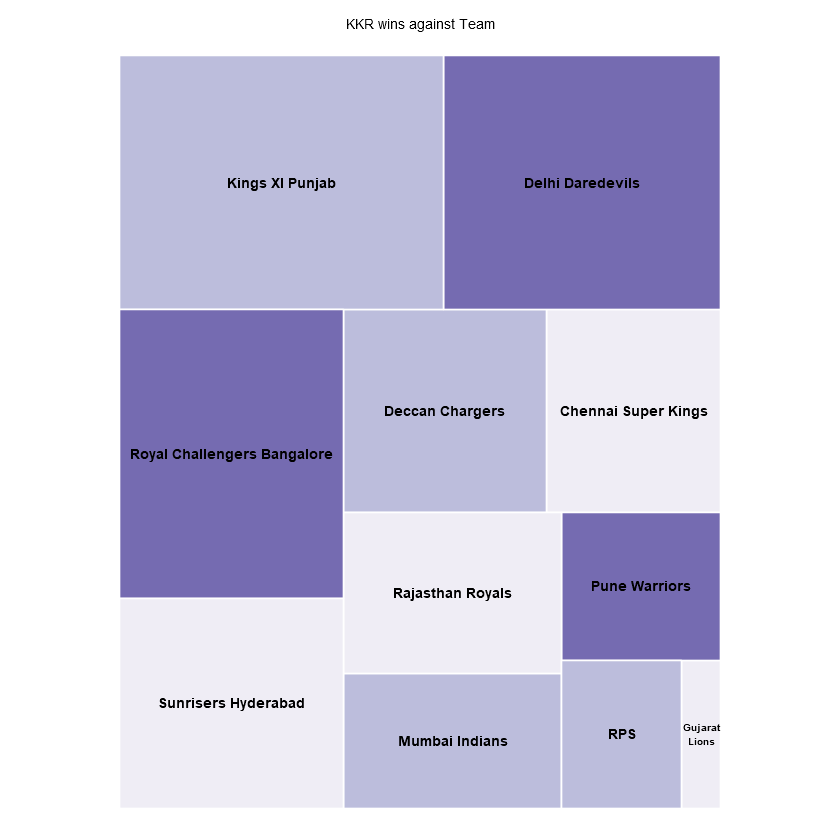

In [262]:
treemap(KKR ,                           #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "KKR",                   #  count
       type = "index" ,                 
       palette = brewer.pal(3,"Purples"),# color selection
       title = "KKR wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       #fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [108]:
RR1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Rajasthan Royals' & winner == 'Rajasthan Royals' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

RR2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Rajasthan Royals' & winner == 'Rajasthan Royals' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

RR <- merge(x = RR1  , y = RR2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

RR[is.na(RR)] <- 0

RR <- rename(RR, Team = team1)

RR<- RR %>% 
   mutate (RR= c1 + c2 ) %>% 
   select(Team ,RR)

In [109]:
RR

Team,RR
Chennai Super Kings,6
Deccan Chargers,7
Delhi Daredevils,10
Kings XI Punjab,9
Kochi Tuskers Kerala,1
Kolkata Knight Riders,9
Mumbai Indians,6
Pune Warriors,4
Royal Challengers Bangalore,7
Sunrisers Hyderabad,4


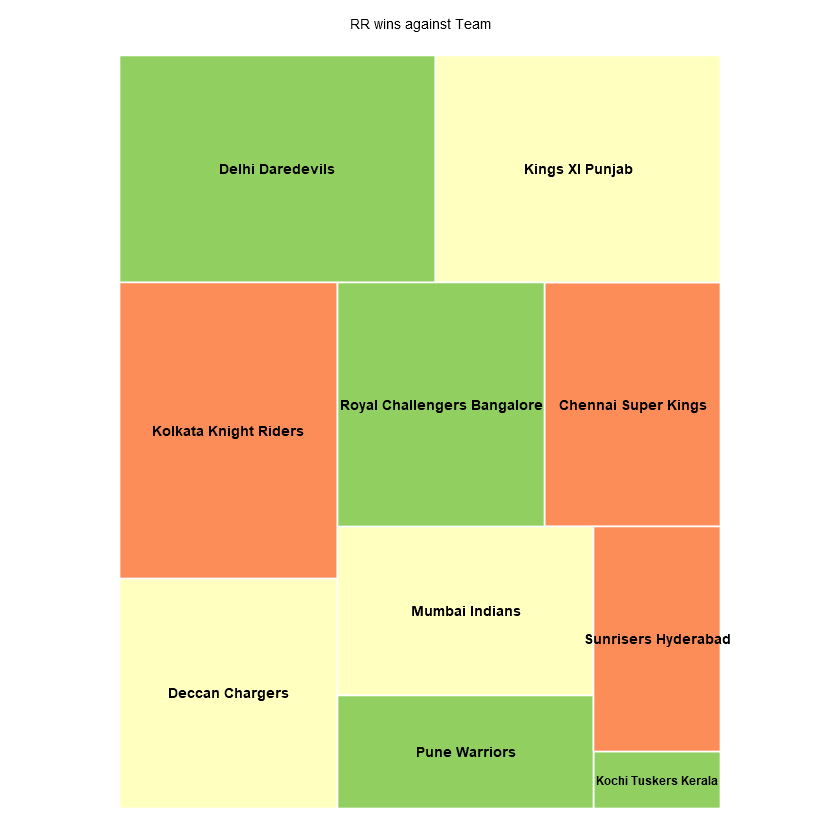

In [263]:
treemap(RR ,                            #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "RR",                    #  count
       type = "index" ,                 
       palette = brewer.pal(3,"RdYlGn"),# color selection
       title = "RR wins against Team",  # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       #fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif") 

In [111]:
SRH1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Sunrisers Hyderabad' & winner == 'Sunrisers Hyderabad' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

SRH2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Sunrisers Hyderabad' & winner == 'Sunrisers Hyderabad' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

SRH <- merge(x = SRH1  , y = SRH2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

SRH[is.na(SRH)] <- 0

SRH <- rename(SRH, Team = team1)

SRH<- SRH %>% 
   mutate (SRH= c1 + c2 ) %>% 
   select(Team ,SRH) 

In [112]:
SRH

Team,SRH
Chennai Super Kings,2
Delhi Daredevils,6
Gujarat Lions,5
Kings XI Punjab,8
Kolkata Knight Riders,4
Mumbai Indians,5
Pune Warriors,2
Rajasthan Royals,3
RPS,1
Royal Challengers Bangalore,6


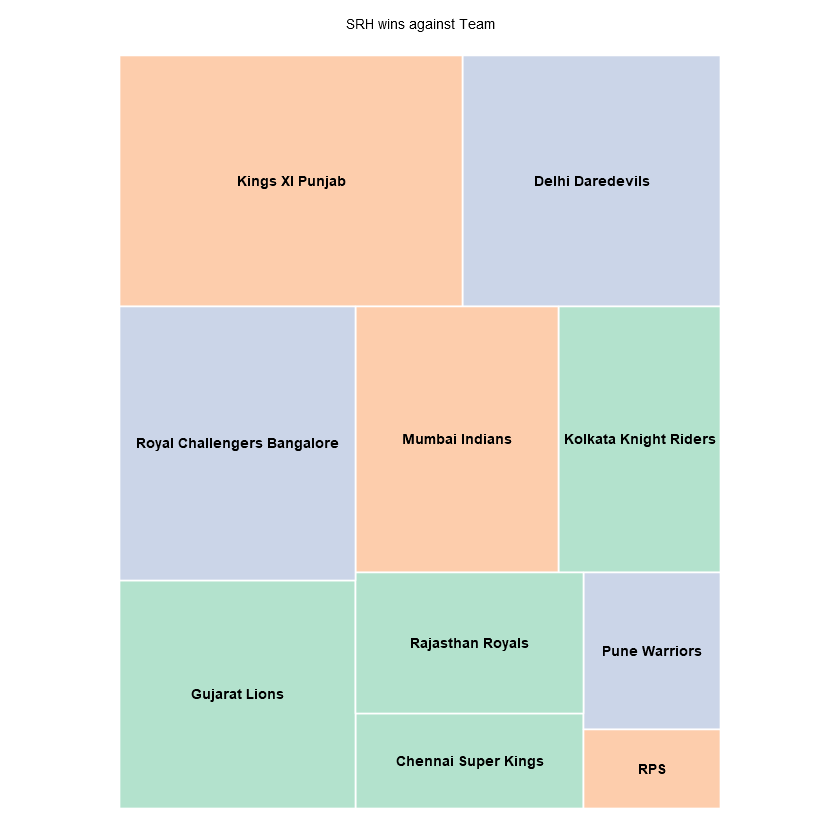

In [264]:
treemap(SRH ,                           #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "SRH",                   #  count
       type = "index" ,                 
       palette = brewer.pal(3,"Pastel2"),# color selection
       title = "SRH wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
       aspRatio= 0.8,
       fontfamily.title = "serif")         

In [114]:
DC1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Deccan Chargers' & winner == 'Deccan Chargers' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

DC2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Deccan Chargers' & winner == 'Deccan Chargers' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

DC<- merge(x = DC1  , y = DC2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

DC[is.na(DC)] <- 0

DC<- rename(DC, Team = team1)

DC<- DC %>% 
   mutate (DC= c1 + c2 ) %>% 
   select(Team ,DC)


In [115]:
DC

Team,DC
Chennai Super Kings,4
Delhi Daredevils,4
Kings XI Punjab,3
Kochi Tuskers Kerala,1
Kolkata Knight Riders,2
Mumbai Indians,4
Pune Warriors,3
Rajasthan Royals,2
Royal Challengers Bangalore,6


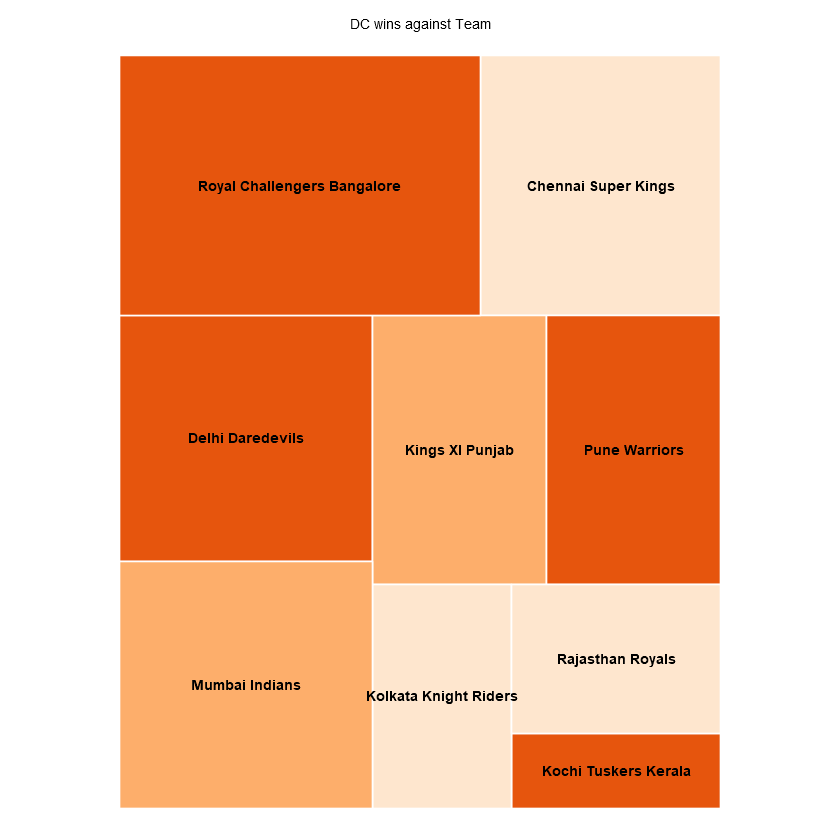

In [265]:
treemap(DC ,                            #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "DC",                    #  count
       type = "index" ,                 # 
       palette = brewer.pal(3,"Oranges"),# color selection
       title = "DC wins against Team",  # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [117]:
GRL1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Gujarat Lions' & winner == 'Gujarat Lions' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

GRL2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Gujarat Lions' & winner == 'Gujarat Lions' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

GRL<- merge(x = GRL1  , y = GRL2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

GRL[is.na(GRL)] <- 0

GRL<- rename(GRL, Team = team1)

GRL<- GRL %>% 
   mutate (GRL= c1 + c2 ) %>% 
   select(Team ,GRL)

In [118]:
GRL

Team,GRL
Delhi Daredevils,1
Kings XI Punjab,2
Kolkata Knight Riders,3
Mumbai Indians,2
RPS,3
Royal Challengers Bangalore,2


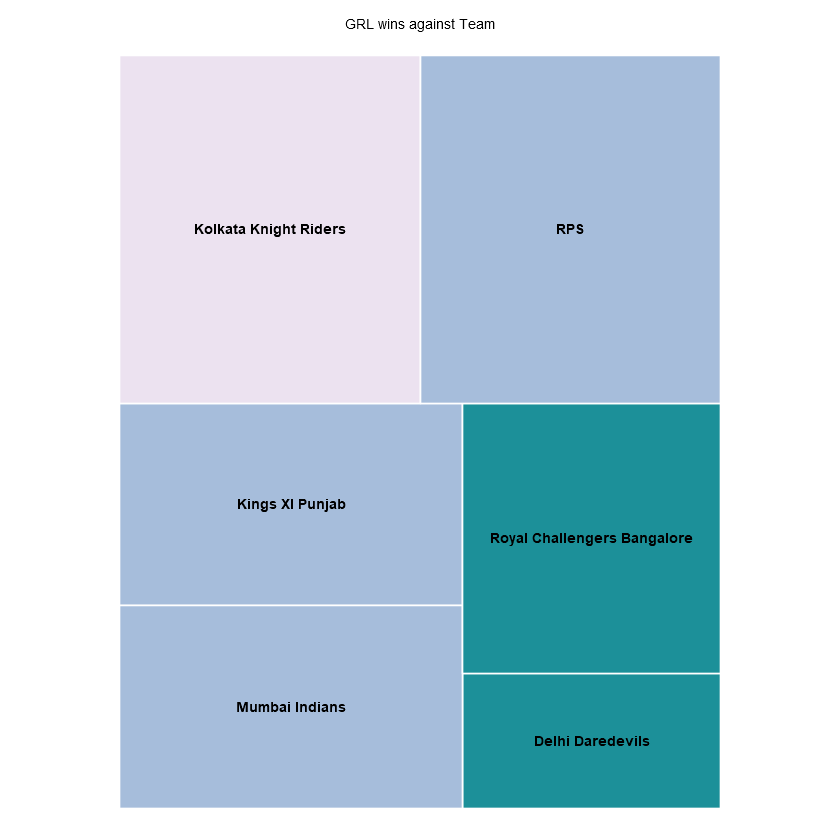

In [266]:
treemap(GRL ,                           #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "GRL",                   #  count
       type = "index" ,                 # 
       palette = brewer.pal(3,"PuBuGn"),# color selection
       title = "GRL wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [120]:
PWS1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Pune Warriors' & winner == 'Pune Warriors' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

PWS2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Pune Warriors' & winner == 'Pune Warriors' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

PWS<- merge(x = PWS1  , y = PWS2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

PWS[is.na(PWS)] <- 0

PWS<- rename(PWS, Team = team1)

PWS<- PWS %>% 
   mutate (PWS= c1 + c2 ) %>% 
   select(Team ,PWS)

In [121]:
PWS

Team,PWS
Chennai Super Kings,2
Deccan Chargers,1
Delhi Daredevils,2
Kings XI Punjab,3
Kochi Tuskers Kerala,1
Kolkata Knight Riders,1
Mumbai Indians,1
Rajasthan Royals,1


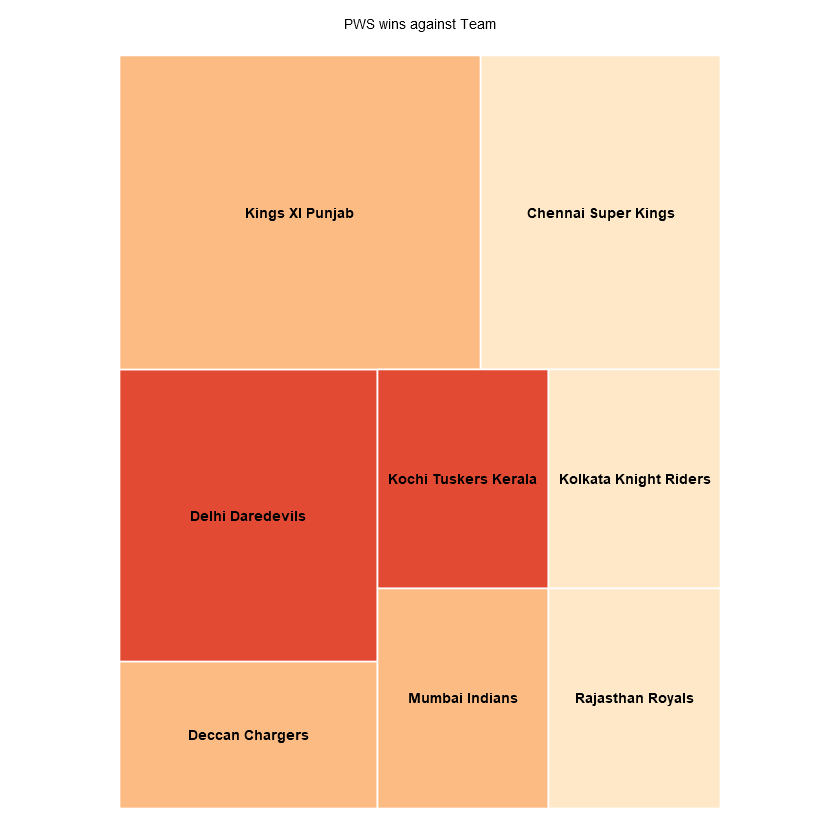

In [267]:
treemap(PWS,                            #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "PWS",                   #  count
       type = "index" ,                 # 
       palette = brewer.pal(3,"OrRd"),  # color selection
       title = "PWS wins against Team", #  title of the graph
       fontsize.title=08,               #  font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [123]:
RPS1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'RPS' & winner == 'RPS' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

RPS2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'RPS' & winner == 'RPS' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n())  

RPS<- merge(x = RPS1  , y = RPS2 ,by.x = 'team1' , by.y = 'team2',all = T ) 

RPS[is.na(RPS)] <- 0

RPS<- rename(RPS, Team = team1)

RPS<- RPS %>% 
   mutate (RPS= c1 + c2 ) %>% 
   select(Team ,RPS)

In [124]:
RPS

Team,RPS
Delhi Daredevils,2
Gujarat Lions,1
Kings XI Punjab,2
Kolkata Knight Riders,1
Mumbai Indians,4
Royal Challengers Bangalore,2
Sunrisers Hyderabad,3


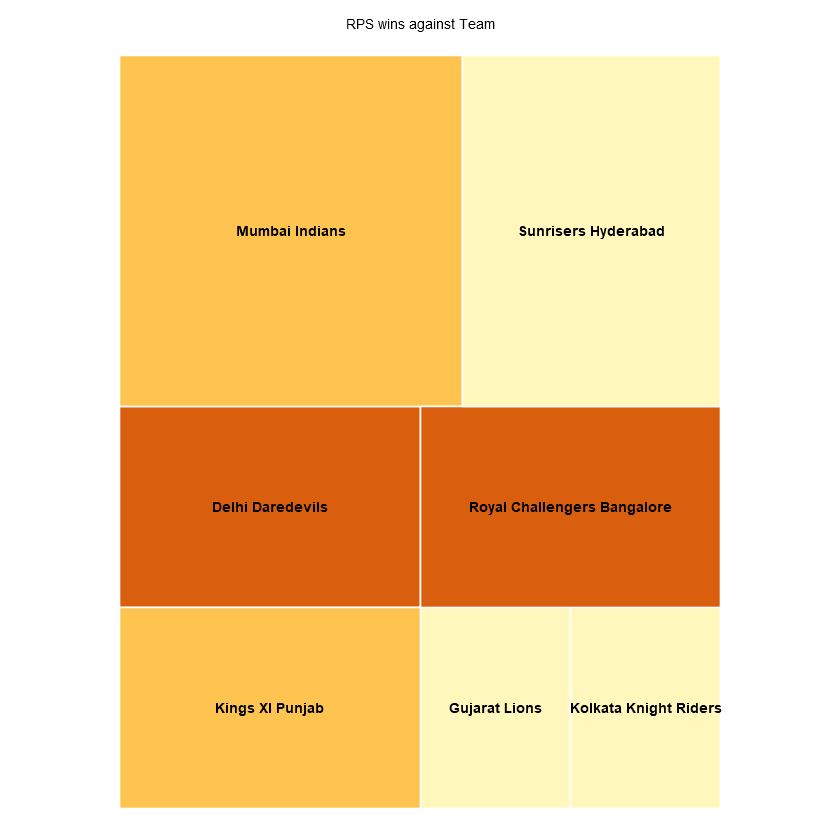

In [268]:
treemap(RPS,                            #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "RPS",                   #  count
       type = "index" ,                 # 
       palette = brewer.pal(3,"YlOrBr"),# color selection
       title = "RPS wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [126]:
KTK1 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team1 != 'Kochi Tuskers Kerala' & winner == 'Kochi Tuskers Kerala' ) %>% 
  group_by(team1) %>% 
  summarise(c1 = n()) 

KTK2 <- m %>% 
  select(team1,team2,winner) %>% 
  filter(team2 != 'Kochi Tuskers Kerala' & winner == 'Kochi Tuskers Kerala' ) %>% 
  group_by(team2) %>% 
  summarise(c2 = n()) 

KTK<- merge(x = KTK1  , y = KTK2 ,by.x = 'team1' , by.y = 'team2',all =T ) 

KTK[is.na(KTK)] <- 0

KTK<- rename(KTK, Team = team1)

KTK<- KTK %>% 
   mutate (KTK= c1 + c2 ) %>% 
   select(Team ,KTK) 

In [127]:
KTK

Team,KTK
Chennai Super Kings,1
Delhi Daredevils,1
Kolkata Knight Riders,2
Mumbai Indians,1
Rajasthan Royals,1


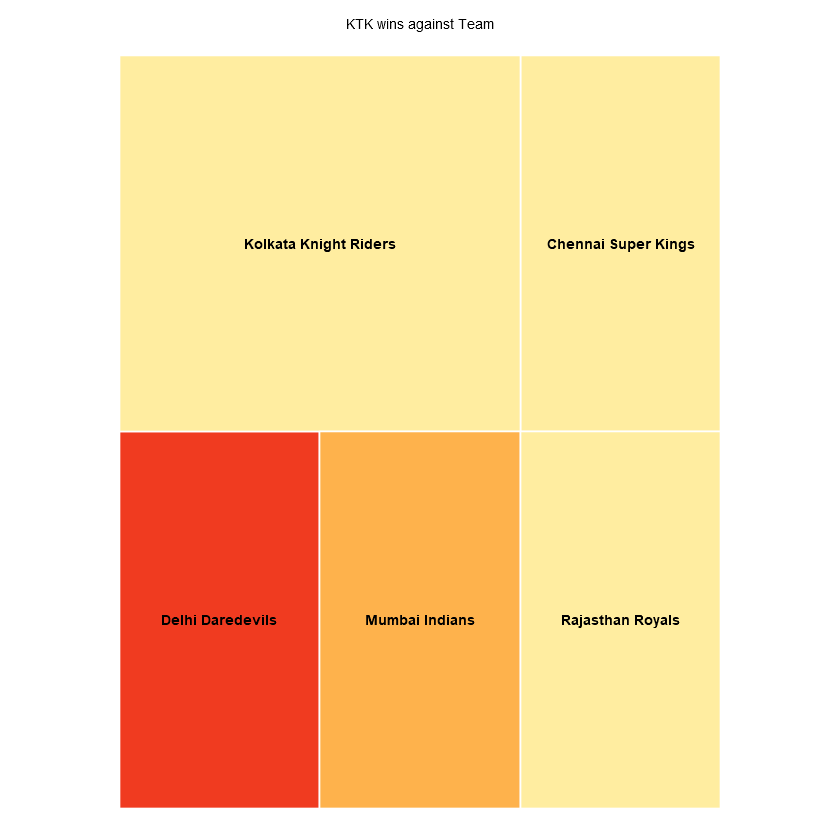

In [269]:
treemap(KTK,                            #  Data Frame
       index = "Team" ,                 #  variables  
       vSize = "KTK",                   #  count
       type = "index" ,                 # 
       palette = brewer.pal(3,"YlOrRd"),# color selection
       title = "KTK wins against Team", # title of the graph
       fontsize.title=08,               # font size of the title
       #fontface.labels=c(2,4),
       fontface.labels="bold",
       bg.labels=c("transparent"),
       border.col=c("white"),           # border color 
       border.lwds=c(1,1),              # width of the border
       fontsize.labels=c(8,0),          # font size of names appeared in box
       fontcolor.labels=c("black"),
        aspRatio= 0.8,
       fontfamily.title = "serif")         

In [129]:
#Batsmen Analysis : 

In [130]:
#TOP BATSMEN :
tb <-  d %>%  
      group_by(batsman) %>% 
      summarise(runs = sum(batsman_runs)) %>%
      arrange(-runs) %>% 
      mutate(batsman = factor(batsman , levels = batsman)) %>%      # this will arrange bar graph in ascending order 
      filter(runs >= 3400) 

In [131]:
tb

batsman,runs
SK Raina,4548
V Kohli,4423
RG Sharma,4207
G Gambhir,4132
DA Warner,4014
RV Uthappa,3778
CH Gayle,3651
S Dhawan,3561
MS Dhoni,3560
AB de Villiers,3486


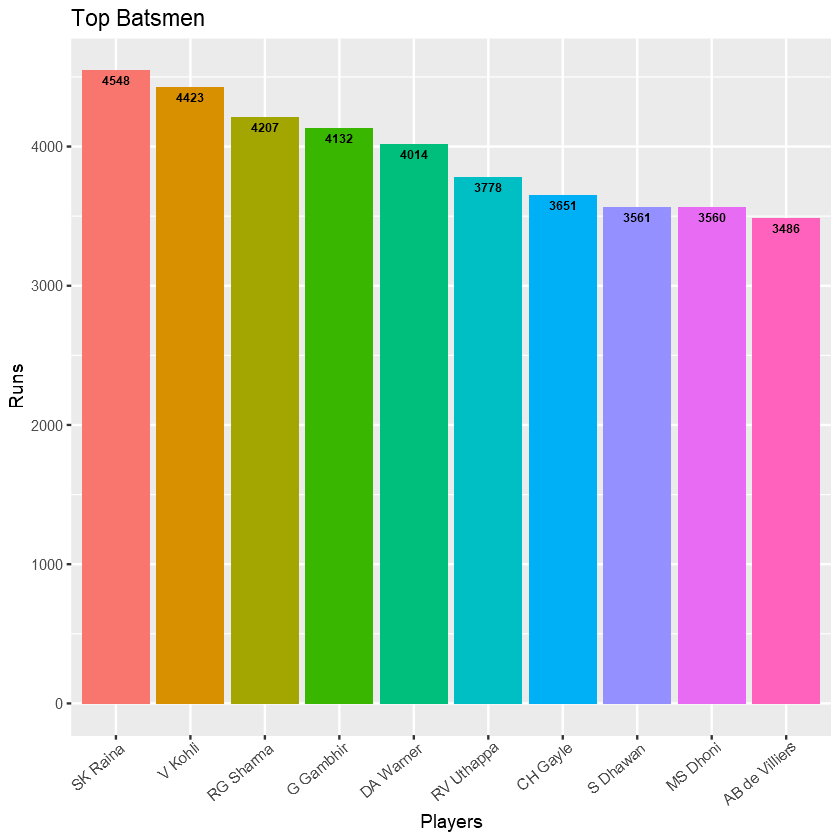

In [132]:
ggplot(tb , aes(x = batsman , y = runs, fill = batsman)) +
       geom_bar(stat = "identity") +
       labs(title = "Top Batsmen" ,x = "Players" , y = "Runs") +
       geom_text(aes(label=runs), vjust = 1.6 , 
                 color = "black", fontface = "bold",size = 2.5) +
       theme(axis.text.x = element_text(angle = 40, hjust = 1))+    
       guides(fill=F) 

In [133]:
brt <- d %>% 
       select(batsman, batsman_runs) %>%
       filter(batsman_runs %in% c(6,4,3,2,1) & batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers")) 

bs <- sqldf("select batsman as Batsmen , count(batsman_runs) as Sixes from brt 
      where batsman_runs = 6 group by batsman")

bf <- sqldf("select batsman as Batsmen , count(batsman_runs) as Fours from brt 
      where batsman_runs = 4 group by batsman")


bt <- sqldf("select batsman as Batsmen , count(batsman_runs) as Threes from brt 
      where batsman_runs = 3 group by batsman")


btt <- sqldf("select batsman as Batsmen , count(batsman_runs) as Twos from brt 
      where batsman_runs = 2 group by batsman")


bo <- sqldf("select batsman as Batsmen , count(batsman_runs) as Ones from brt 
      where batsman_runs = 1 group by batsman")


Runs_Type_Batsmen <- sqldf("select bs.Batsmen ,
                           bs.Sixes,
                           bf.Fours,
                           bt.Threes,
                           btt.Twos,
                           bo.Ones from bs
                           inner join bf
                           on bs.Batsmen = bf.Batsmen
                           inner join bt 
                           on bs.Batsmen = bt.Batsmen
                           inner join btt
                           on bs.Batsmen = btt.Batsmen
                           inner join bo 
                           on bs.Batsmen = bo.Batsmen ") 


In [134]:
Runs_Type_Batsmen

Batsmen,Sixes,Fours,Threes,Twos,Ones
AB de Villiers,158,287,12,187,980
CH Gayle,266,297,3,70,718
DA Warner,160,401,13,207,997
G Gambhir,58,484,15,245,1313
MS Dhoni,156,251,11,251,1085
RG Sharma,173,354,5,177,1379
RV Uthappa,125,377,12,191,1087
S Dhawan,71,401,16,168,1137
SK Raina,174,402,10,242,1377
V Kohli,160,384,11,242,1410


In [135]:
table(as.factor(d$batsman_runs))


    0     1     2     3     4     5     6 
61148 55497  9705   509 17033    45  6523 

In [136]:
p <-   d %>%  
       group_by(match_id,batsman) %>% 
       summarise(runs = sum(batsman_runs)) %>%
       filter(runs %in% c(30:49) & batsman %in% 
                c("SK Raina",
                  "V Kohli",
                  "RG Sharma",
                  "G Gambhir",
                  "DA Warner",
                  "RV Uthappa",
                  "CH Gayle",
                  "S Dhawan",
                  "MS Dhoni",
                  "AB de Villiers"))

a <- sqldf("select batsman as Batsmen , count(runs) as Thirty_plus from p group by batsman") 

p1 <-   d %>%  
  group_by(match_id,batsman) %>% 
  summarise(runs = sum(batsman_runs)) %>%
  filter(runs %in% c(50:99) & batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

a1 <- sqldf("select batsman as Batsmen , count(runs) as Fiftyp_plus from p1 group by batsman") 


p2 <-   d %>%  
  group_by(match_id,batsman) %>% 
  summarise(runs = sum(batsman_runs)) %>%
  filter(runs %in% c(100:149) & batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

a2 <- sqldf("select batsman as Batsmen , count(runs) as Hundred_plus from p2 group by batsman") 



p3 <-   d %>%  
  group_by(match_id,batsman) %>% 
  summarise(runs = sum(batsman_runs)) %>%
  filter(runs >= 150 & batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

a3 <- sqldf("select batsman as Batsmen , count(runs) as One_Fifty_plus from p3 group by batsman") 

Score <- sqldf("select a.Batsmen,
                a.Thirty_plus,
                a1.Fiftyp_plus,
                a2.Hundred_plus,
                a3.One_Fifty_plus from a 
                left join a1 
                on a.Batsmen = a1.Batsmen 
                left join a2
                on a.Batsmen = a2.Batsmen
                left join a3 
                on a.Batsmen = a3.Batsmen ")



Score[is.na(Score)] <- 0 

Runs_Type_Batsmen <- merge(x = Runs_Type_Batsmen , y = Score , By = "Batsmen")

In [137]:
Runs_Type_Batsmen 

Batsmen,Sixes,Fours,Threes,Twos,Ones,Thirty_plus,Fiftyp_plus,Hundred_plus,One_Fifty_plus
AB de Villiers,158,287,12,187,980,18,23,3,0
CH Gayle,266,297,3,70,718,18,22,4,1
DA Warner,160,401,13,207,997,18,36,3,0
G Gambhir,58,484,15,245,1313,22,35,0,0
MS Dhoni,156,251,11,251,1085,31,17,0,0
RG Sharma,173,354,5,177,1379,26,32,1,0
RV Uthappa,125,377,12,191,1087,32,22,0,0
S Dhawan,71,401,16,168,1137,20,28,0,0
SK Raina,174,402,10,242,1377,31,31,1,0
V Kohli,160,384,11,242,1410,28,31,4,0


In [138]:
Dot_Balls <- d %>% 
  select(batsman,wide_runs,noball_runs ,batsman_runs) %>% 
  filter(wide_runs == 0 &  noball_runs ==0 & batsman_runs ==0) %>% 
  group_by(batsman) %>% 
  summarise(Dot_Balls = n()) %>% 
  arrange(desc(Dot_Balls)) %>% 
  filter(batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

Dot_Balls <- rename(Dot_Balls , Batsmen = batsman)             

Total_Balls_Faced  <- d %>% 
  select(batsman,wide_runs,noball_runs ,batsman_runs) %>% 
  filter(wide_runs == 0 &  noball_runs ==0 ) %>% 
  group_by(batsman) %>% 
  summarise(Total_Balls_Faced = n()) %>% 
  arrange(desc(Total_Balls_Faced)) %>% 
  filter(batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

Total_Balls_Faced <- rename(Total_Balls_Faced , Batsmen = batsman)   


Total_Runs  <- d %>% 
              group_by(batsman) %>% 
              summarise(Total_Runs = sum(batsman_runs)) %>% 
              arrange(desc(Total_Runs)) %>% 
              filter(batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

Total_Runs <- rename(Total_Runs , Batsmen = batsman) 

Strike_Rate <- Total_Runs / Total_Balls_Faced  #Strike_Rate formula    

#Average and number of Times not out Matches Played

Times_out <- sqldf("select player_dismissed as Batsmen, count(*) Times_out from d group by Batsmen order by Times_out desc") %>%
            filter(Batsmen %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers"))

#Batting_Avg = Runs Scored / Times_out [ Formula ]

xyz <- sqldf("select db.Batsmen ,
                     tbf.Total_Balls_Faced,
                     db.Dot_Balls,
                     tr.Total_Runs,
                     x.Times_out
                     from Dot_Balls db
                     inner join Total_Balls_Faced tbf
                     on db.Batsmen = tbf.Batsmen
                     inner join Total_Runs tr 
                     on db.Batsmen = tr.Batsmen
                     inner join Times_out x
                     on db.Batsmen = x.Batsmen
                  ")

xyz <- mutate(xyz ,Strike_Rate = round((Total_Runs / Total_Balls_Faced)*100 ,2))
  
xyz <- mutate(xyz ,Average = round(Total_Runs / Times_out ,2)) 

Warning message in Ops.factor(left, right):
"'/' not meaningful for factors"

In [139]:
xyz

Batsmen,Total_Balls_Faced,Dot_Balls,Total_Runs,Times_out,Strike_Rate,Average
G Gambhir,3306,1199,4132,131,124.98,31.54
V Kohli,3394,1193,4423,118,130.32,37.48
S Dhawan,2913,1124,3561,109,122.25,32.67
RG Sharma,3203,1123,4207,129,131.35,32.61
RV Uthappa,2855,1068,3778,128,132.33,29.52
SK Raina,3251,1054,4548,134,139.90,33.94
CH Gayle,2394,1051,3651,89,152.51,41.02
DA Warner,2809,1039,4014,100,142.90,40.14
MS Dhoni,2593,845,3560,94,137.29,37.87
AB de Villiers,2340,724,3486,91,148.97,38.31


In [140]:
Runs_Type_Batsmen <- merge(x = Runs_Type_Batsmen , y = xyz , by = "Batsmen") 

Runs_Type_Batsmen <- rename(Runs_Type_Batsmen ,"30+" = "Thirty_plus" )
Runs_Type_Batsmen <- rename(Runs_Type_Batsmen ,"50+" = "Fiftyp_plus" )
Runs_Type_Batsmen <- rename(Runs_Type_Batsmen ,"100+" = "Hundred_plus" )
Runs_Type_Batsmen <- rename(Runs_Type_Batsmen ,"150+" = "One_Fifty_plus" )


In [141]:
HS <- d %>% 
   select(match_id , batsman,batsman_runs )%>%
   group_by(match_id ,batsman) %>% 
   summarise(HS = sum(batsman_runs)) %>% 
   filter(batsman %in% 
           c("SK Raina",
             "V Kohli",
             "RG Sharma",
             "G Gambhir",
             "DA Warner",
             "RV Uthappa",
             "CH Gayle",
             "S Dhawan",
             "MS Dhoni",
             "AB de Villiers")) %>%
              group_by(batsman) %>% 
              filter(HS == max(HS))%>%
              select(batsman , HS) #Highest Score

In [142]:
Runs_Type_Batsmen <- merge(x = Runs_Type_Batsmen , y = HS , by.x  ='Batsmen',by.y ="batsman")  

In [143]:
Runs_Type_Batsmen 

Batsmen,Sixes,Fours,Threes,Twos,Ones,30+,50+,100+,150+,Total_Balls_Faced,Dot_Balls,Total_Runs,Times_out,Strike_Rate,Average,HS
AB de Villiers,158,287,12,187,980,18,23,3,0,2340,724,3486,91,148.97,38.31,133
CH Gayle,266,297,3,70,718,18,22,4,1,2394,1051,3651,89,152.51,41.02,175
DA Warner,160,401,13,207,997,18,36,3,0,2809,1039,4014,100,142.90,40.14,126
G Gambhir,58,484,15,245,1313,22,35,0,0,3306,1199,4132,131,124.98,31.54,93
MS Dhoni,156,251,11,251,1085,31,17,0,0,2593,845,3560,94,137.29,37.87,70
RG Sharma,173,354,5,177,1379,26,32,1,0,3203,1123,4207,129,131.35,32.61,109
RV Uthappa,125,377,12,191,1087,32,22,0,0,2855,1068,3778,128,132.33,29.52,87
S Dhawan,71,401,16,168,1137,20,28,0,0,2913,1124,3561,109,122.25,32.67,95
SK Raina,174,402,10,242,1377,31,31,1,0,3251,1054,4548,134,139.90,33.94,100
V Kohli,160,384,11,242,1410,28,31,4,0,3394,1193,4423,118,130.32,37.48,113


In [144]:
158 * 6  + 287*4 + 12*3 + 187*2 + 980 * 1 #Table validation 

[1] 3486

Using Batsmen as id variables


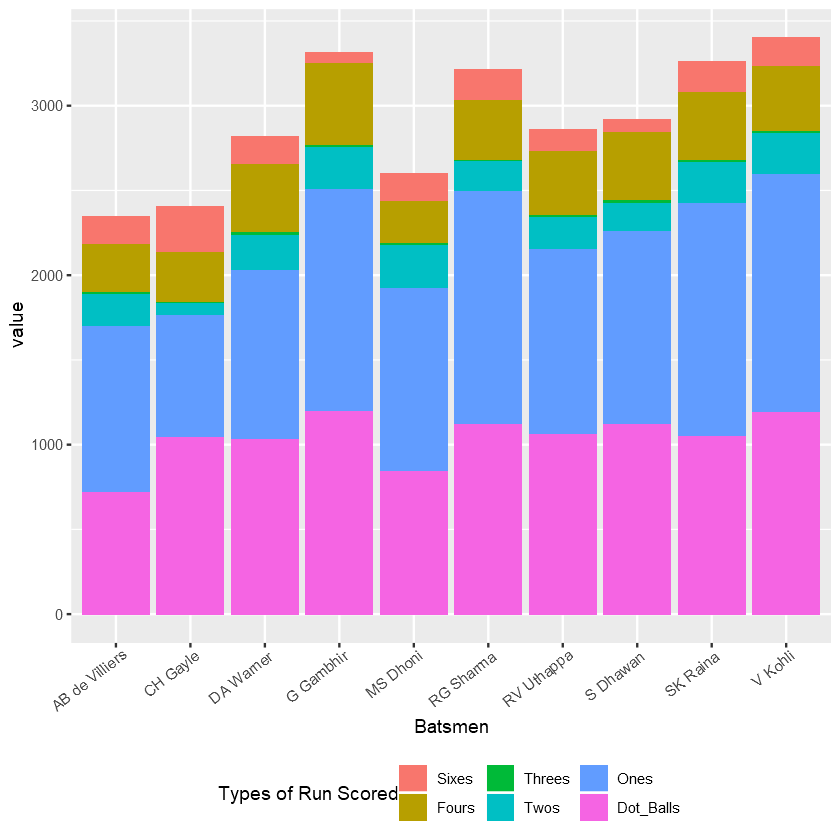

In [145]:
melt(Runs_Type_Batsmen) %>% 
              filter(variable %in% c("Sixes","Fours","Threes","Twos","Ones","Dot_Balls")) %>% 
                ggplot(aes(x =  Batsmen , y = value,fill = variable))+
                geom_bar(stat ="identity") +
                labs(fill="Types of Run Scored")+
                theme(axis.text.x = element_text(angle = 38, hjust = 1)) +
                theme(legend.position="bottom")

Using Batsmen as id variables


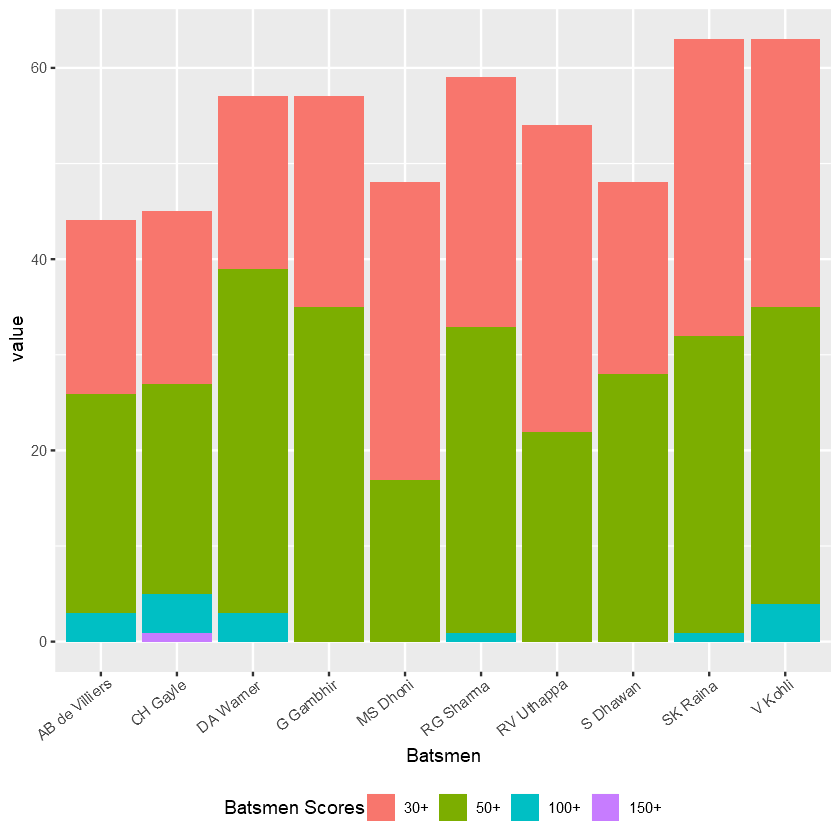

In [146]:
melt(Runs_Type_Batsmen) %>% 
              filter(variable %in% c("30+","50+","100+","150+")) %>% 
                ggplot(aes(x =  Batsmen , y = value,fill = variable))+
                geom_bar(stat ="identity") +
                labs(fill="Batsmen Scores")+
                theme(axis.text.x = element_text(angle = 38, hjust = 1)) +
                theme(legend.position="bottom")

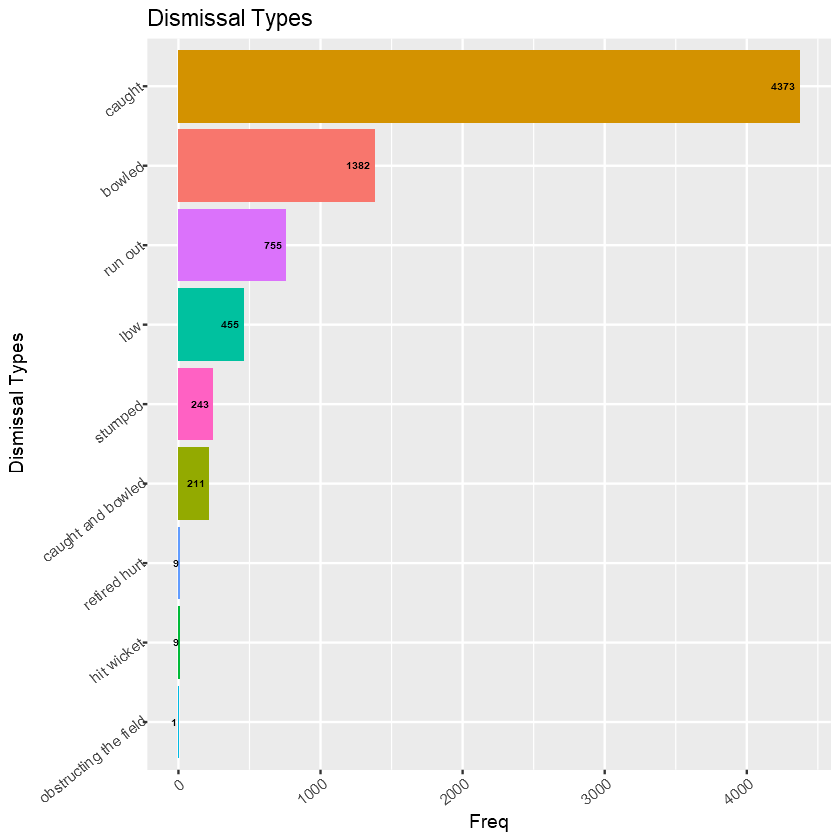

In [147]:
#Dismissal Types in IPL history

as.data.frame(table(d$dismissal_kind)) %>% 
                    filter(Var1 != "") %>% 
                    ggplot(aes(reorder(Var1,Freq), y = Freq,fill = as.factor(Var1)))+
                    geom_bar(stat ="identity") +
                    guides(fill=F)+
                    theme(axis.text.x = element_text(angle = 38, hjust = 1)) +
                    theme(axis.text.y = element_text(angle = 38, hjust = 1))+
                    geom_text(aes(label = Freq),color="black",fontface = "bold",size =2,hjust = 1.2)+
                    coord_flip() +
                    labs(x = "Dismissal Types", title ="Dismissal Types ")

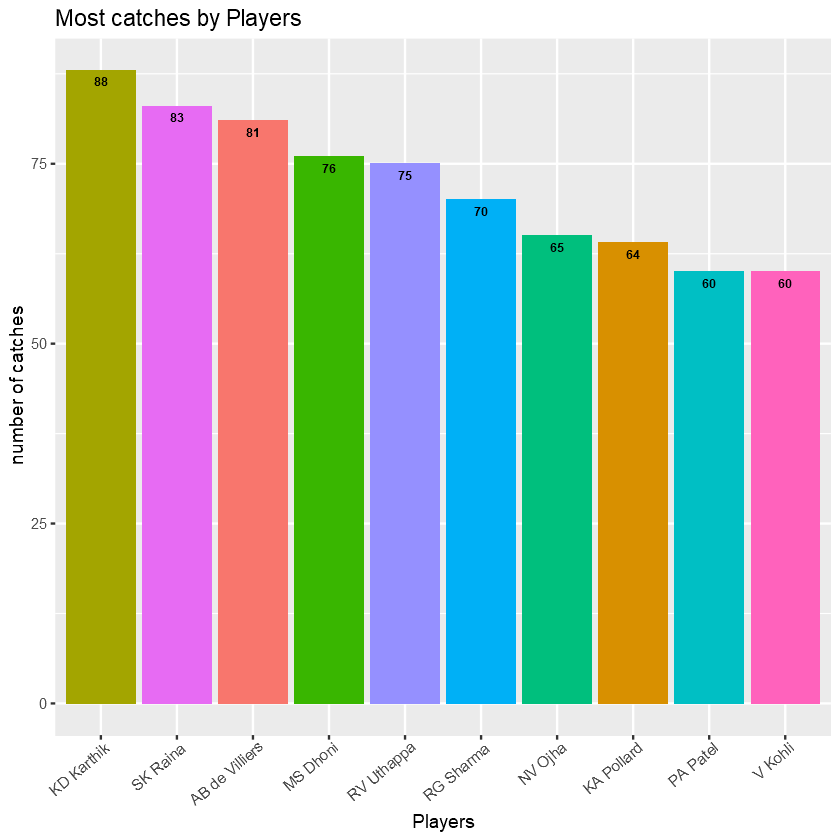

In [148]:
#Most Caches by Players 

mc <- d %>% 
  select(dismissal_kind ,fielder) %>% 
  filter(dismissal_kind == "caught") 

sqldf("select fielder , count(dismissal_kind) as total_catches from mc group by fielder") %>% 
       arrange(desc(total_catches)) %>% head(10) %>% 
       ggplot(aes(reorder(fielder,-total_catches) , total_catches, fill = fielder)) + 
       geom_bar(stat = "identity") + 
       geom_text(aes(label = total_catches),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
       theme(axis.text.x = element_text(angle = 40, hjust = 1))+
       guides(fill=F) + 
       labs(x = "Players" , y = " number of catches ", 
       title = "Most catches by Players") 

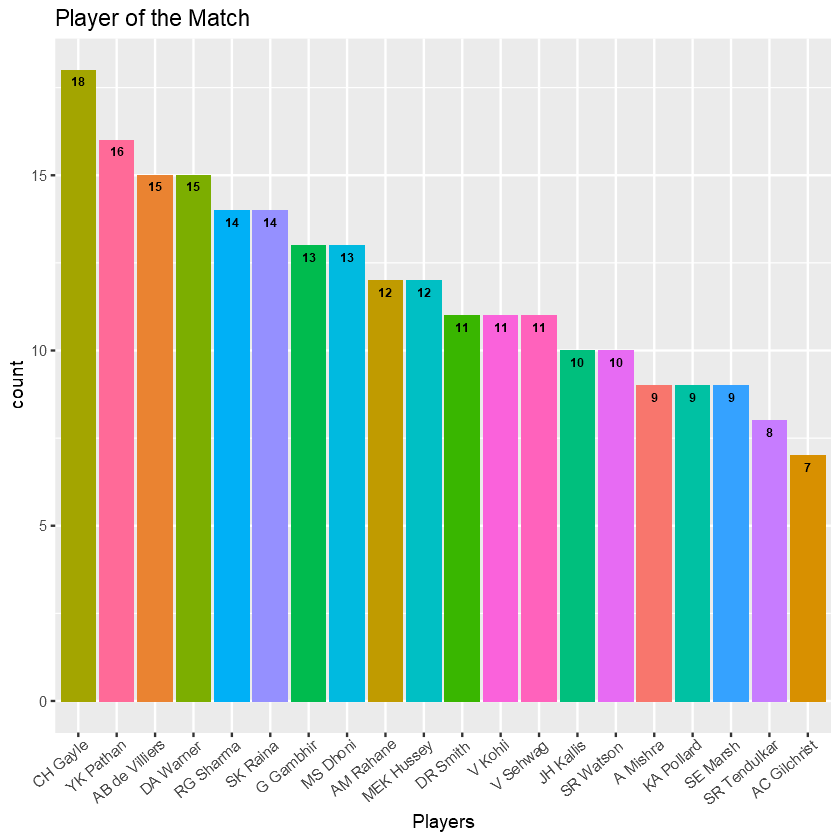

In [149]:
#Man of the Match :

mom <- sqldf("select player_of_match as players ,count(*) mom  
      from m group by player_of_match order by mom desc") %>% head(20) # MOM:Man of the Match

mom %>% 
   ggplot(aes(reorder(players,-mom) , mom, fill = players)) + 
   geom_bar(stat = "identity") + 
   geom_text(aes(label = mom),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
   theme(axis.text.x = element_text(angle = 40, hjust = 1))+
   guides(fill=F) + 
   labs(x = "Players" , y = " count ", 
        title = "Player of the Match ") 

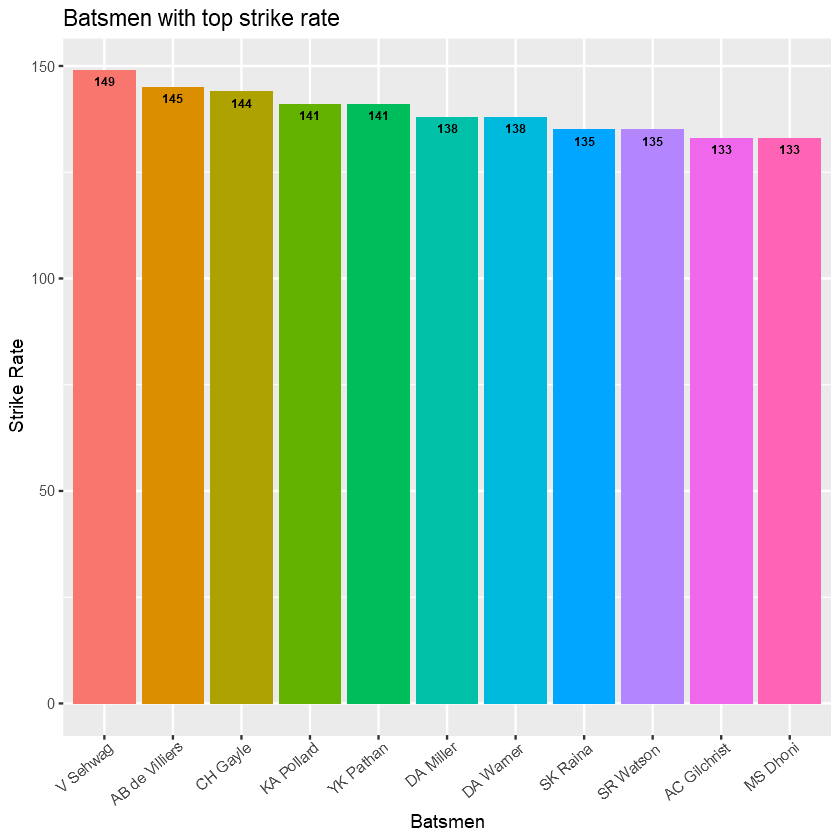

In [150]:
# Batsmen with top strike rate

tsr <- d %>% 
  group_by(batsman) %>% 
  filter(sum(total_runs)>2000 | length(total_runs) > 1000) %>% 
  summarise(strike_rate= round(mean(batsman_runs)*100)) %>% 
  top_n(n=10,wt=strike_rate) %>%
  arrange(-strike_rate)%>%
  mutate(batsman = factor(batsman , levels = batsman))

ggplot(data = tsr , aes(x = batsman , y = strike_rate , fill = batsman)) + 
       geom_bar(stat = "identity") + 
       geom_text(aes(label = strike_rate),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
       theme(axis.text.x = element_text(angle = 40, hjust = 1))+
       guides(fill=F) + 
       labs(x = "Batsmen" , y = " Strike Rate ", 
       title = "Batsmen with top strike rate") 

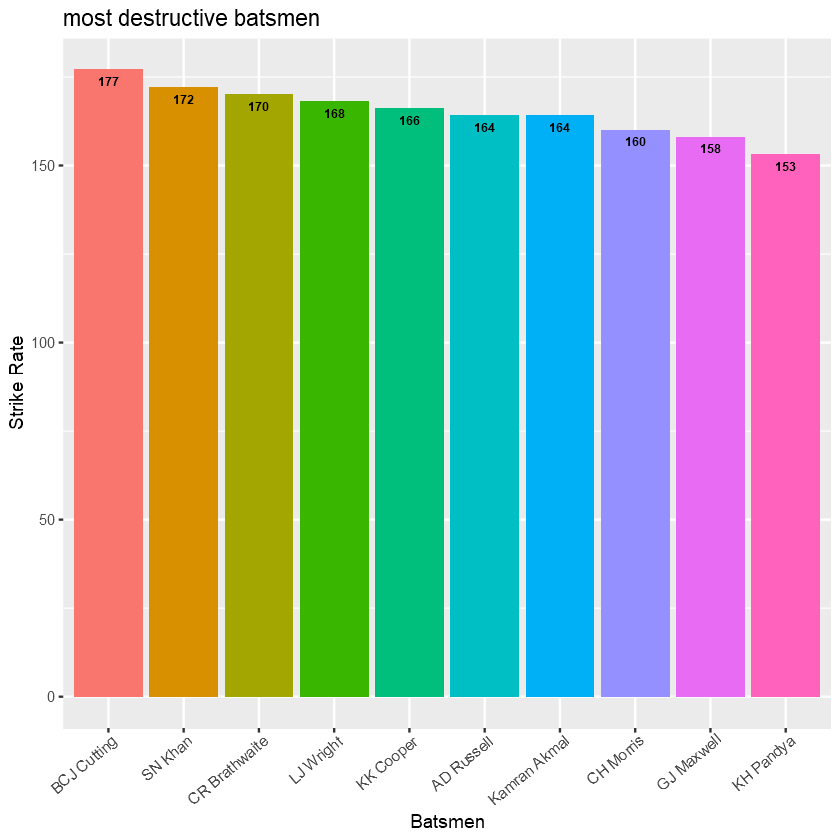

In [151]:
# most destructive batsmen

dsr <- d %>% 
  group_by(batsman) %>% 
  filter(sum(total_runs)>200| length(total_runs) > 50) %>% 
  summarise(strike_rate= round(mean(batsman_runs)*100)) %>% 
  top_n(n=10,wt=strike_rate) %>%
  arrange(-strike_rate)%>%
  mutate(batsman = factor(batsman , levels = batsman))

ggplot(data = dsr , aes(x = batsman , y = strike_rate , fill = batsman)) + 
       geom_bar(stat = "identity") + 
       geom_text(aes(label = strike_rate),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
       theme(axis.text.x = element_text(angle = 40, hjust = 1))+
       guides(fill=F) + 
       labs(x = "Batsmen" , y = " Strike Rate ", 
       title = "most destructive batsmen") 

In [152]:
HIS <- d %>% 
   select(match_id , batsman,batsman_runs )%>%
   group_by(match_id ,batsman) %>% 
   summarise(iHS = sum(batsman_runs)) %>% 
   arrange(-iHS)%>% head(10) 
#Top Ten highest indivisual Scores by Batsmen in IPL History

In [153]:
HIS

match_id,batsman,iHS
411,CH Gayle,175
60,BB McCullum,158
562,AB de Villiers,133
620,AB de Villiers,129
372,CH Gayle,128
206,M Vijay,127
36,DA Warner,126
516,V Sehwag,122
243,PC Valthaty,120
279,V Sehwag,119


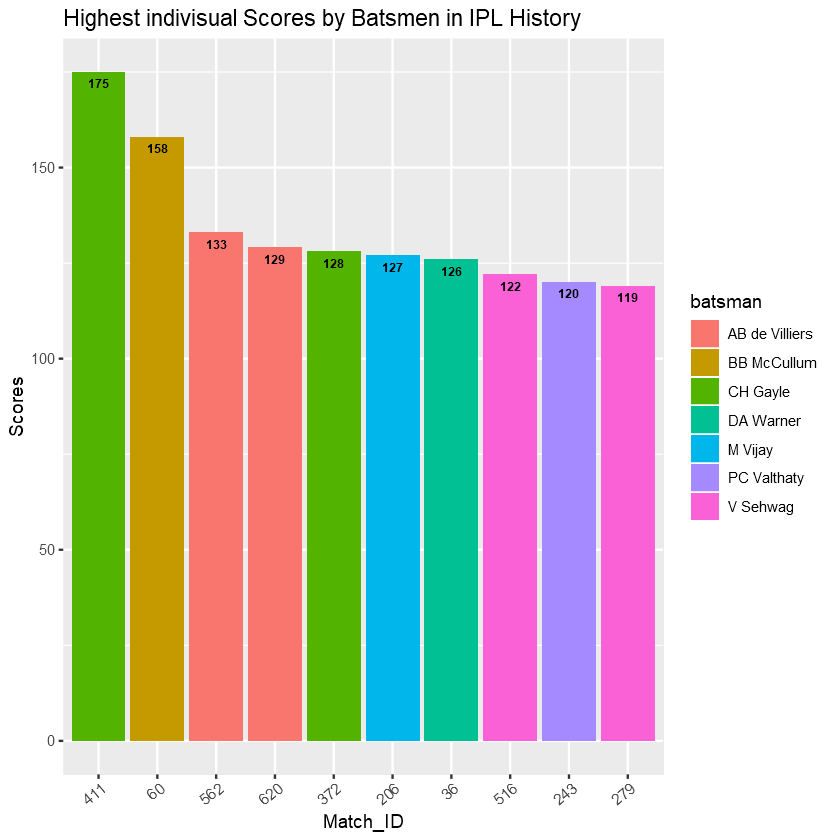

In [154]:
ggplot(data = HIS , aes(reorder(match_id ,-iHS), y = iHS , fill = batsman)) + 
       geom_bar(stat = "identity") + 
       geom_text(aes(label = iHS),color="black",fontface = "bold",size =2.5,vjust = 1.8)+
       theme(axis.text.x = element_text(angle = 40, hjust = 1))+
       labs(x = "Match_ID" , y = "Scores", 
       title = "Highest indivisual Scores by Batsmen in IPL History") 

In [155]:
#chance of chasing 200+ and defending  <120 

cct1 <- sqldf("select match_id ,inning ,  sum(total_runs) Total_Runs from d 
      where match_id NOT IN(34,126,190,301,388,401,476,536,546,571) group by match_id , inning ") %>% 
      filter(Total_Runs > 200)


cct2 <- m %>% 
        select(id ,team1 ,team2,win_by_wickets)

cct <- merge(x = cct1 , y = cct2 ,by.x = "match_id" , by.y = "id" , all.x = T) %>% 
      select(-inning,-Total_Runs)

#Total Matches when Team scored 200+ in an inning 

cct <- distinct(cct ,match_id,.keep_all = T)

dim(cct) 



[1] 48  4

In [156]:
cct %>% 
   filter (win_by_wickets != 0)%>% 
   distinct(match_id,.keep_all = T) 
#48 Times Team has scored 200+ in 1st inning out of which 7 Times Team able chase 

#chance of chasing 200+ target is : 7 / 48 = 14.58 %  
#chance of not chasing 200+ target is : 100 - 14.58 = 85.42 % 

slices <- c(14.58, 85.42) 
target <- c("chance of chasing 200+ target is","chance of defending 200+ target is") 

match_id,team1,team2,win_by_wickets
41,Gujarat Lions,Delhi Daredevils,7
68,Deccan Chargers,Rajasthan Royals,3
181,Kings XI Punjab,Royal Challengers Bangalore,8
208,Kolkata Knight Riders,Kings XI Punjab,8
320,Royal Challengers Bangalore,Chennai Super Kings,5
460,Chennai Super Kings,Kings XI Punjab,6
496,Sunrisers Hyderabad,Kings XI Punjab,6


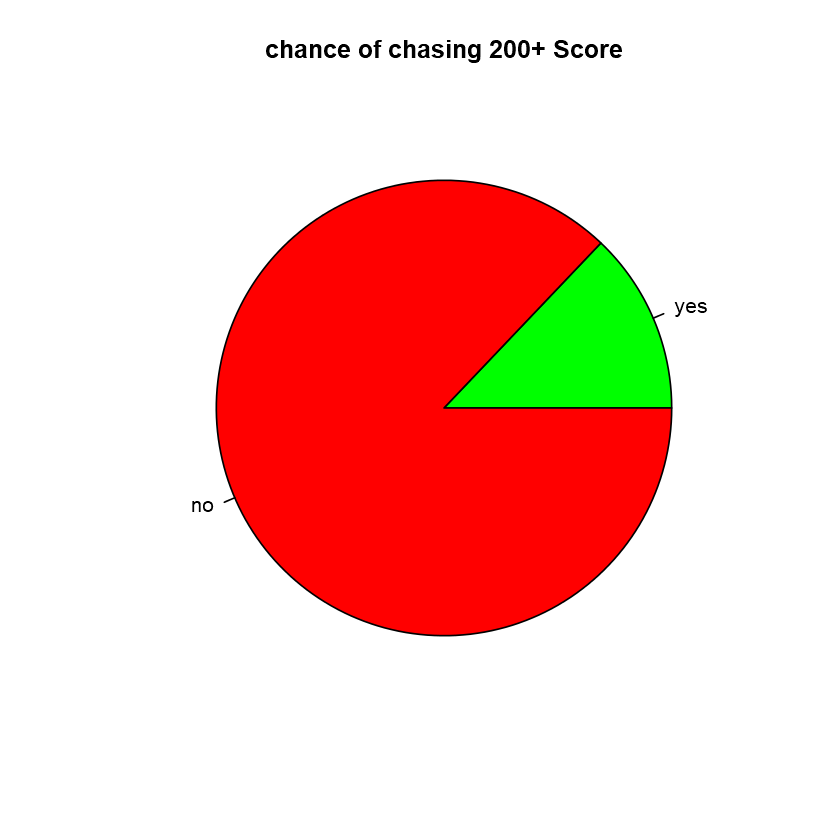

In [273]:
lbls <- paste(c("yes","no"))

pie(slices ,
    labels =lbls,
    col=c("green","red"),
    main="chance of chasing 200+ Score")

In [158]:
sqldf("select * from cct1 where match_id IN(41,68,181,208,320,460,496,517)")
#Validating and make sure Total_Runs of inning 2 is > than Total_Runs of inning 2 for the match_id

#Match_id : 208* ,517*

match_id,inning,Total_Runs
41,1,208
41,2,214
68,1,214
68,2,217
181,1,203
181,2,204
208,2,204
320,1,205
320,2,208
460,1,205


In [159]:
cdt1 <- sqldf("select match_id ,inning ,sum(total_runs) Total_Runs from d 
      where match_id NOT IN(34,126,190,301,388,401,476,536,546,571) AND inning = 1 group by match_id , inning ") %>% 
      filter(Total_Runs < 120)


cdt1 <- distinct(cdt1 , match_id , .keep_all = T)



cdt2 <- m %>% 
        select(id ,team1 ,team2,win_by_runs,winner)


cdt <- merge(x = cdt1 , y = cdt2 ,by.x = "match_id" , by.y = "id" , all.x = T) %>% 
      select(-inning,-Total_Runs)



In [160]:
dim(cdt)

[1] 62  5

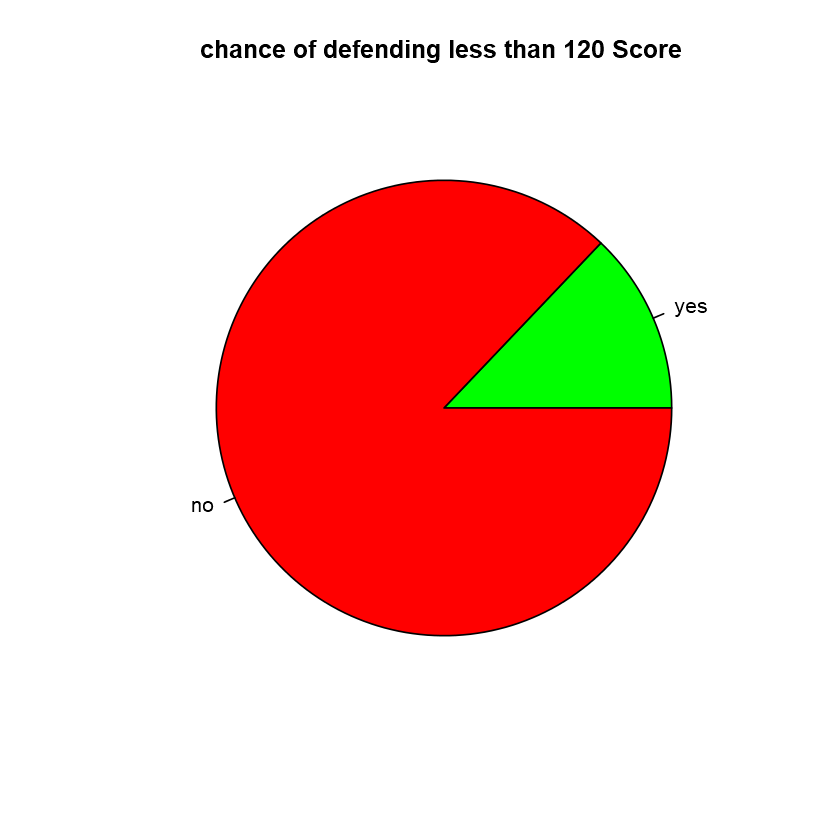

In [272]:
# out of 62 , 8 times Team able to defend 120 score and best defender is : KXIP 
#chance of defending < 120 target is : 8 / 62 = 12.90 %  
#chance of chasing <120 target is : 100 - 12.90 = 87.10 % 

slices <- c(12.90, 87.10) 


lbls <- paste(c("yes","no"))


pie(slices ,
    labels =lbls,
    col=c("green","red"),
    main="chance of defending less than 120 Score ")



In [162]:
w <- d %>%
     select(match_id, bowler, dismissal_kind) %>%
     filter(!dismissal_kind %in% c("","obstructing the field","retired hurt","run out"))

mw <- sqldf("select bowler , count(dismissal_kind) mw from w group by bowler order by mw desc") %>% head(10)

list <- c("SL Malinga","A Mishra","Harbhajan Singh","PP Chawla","DJ Bravo",
          "B Kumar","A Nehra","R Vinay Kumar","Z Khan","R Ashwin")

w1 <- d %>%
     select(bowler , wide_runs) %>%
     filter(wide_runs != 0 & bowler %in% c(list) )

wd <- sqldf("select bowler , count(wide_runs) wb from w1 group by bowler")

w2 <- d %>%
  select(bowler , noball_runs ) %>%
  filter(noball_runs!= 0 & bowler %in% c(list) )

nb <- sqldf("select bowler , count(noball_runs) nb from w2 group by bowler") 

w3 <- d %>%
      select(bowler , ball,total_runs) %>%
      filter(bowler %in% c(list))

b <- sqldf("select bowler ,count(ball) Balls from w3 group by bowler") 

b$Overs <- round(b$Balls / 6,1)


#calculate Run Rate

r <- sqldf("select bowler ,sum(total_runs) Runs from w3 group by bowler") 

r$Run_Rate <- round(r$Runs / b$Overs ,2) 

In [163]:
#best figure through out the season 


ww <- d %>%
  select(match_id, bowler, dismissal_kind,total_runs) %>%
  filter(!dismissal_kind %in% c("","obstructing the field","retired hurt","run out")) %>%
  filter(bowler %in% c(list))

bf1 <- sqldf("select match_id , bowler, count(dismissal_kind) count from ww group by match_id , bowler") %>%
      group_by(bowler) %>%
      summarise(count = max(count))

bf2 <- sqldf("select match_id , bowler, count(dismissal_kind) wicket from ww 
              group by match_id , bowler having wicket >=4")

ww1 <- d %>%
  select(match_id, bowler, dismissal_kind,total_runs) %>%
  filter(bowler %in% c(list))

bf3 <- sqldf("select match_id , bowler ,sum(total_runs) Best from ww1 group by match_id , bowler")


bf4 <- left_join(bf2 , bf3 ,by = c("match_id" ,"bowler"))

bf6 <- sqldf("select * from bf4 where wicket = 5")

bf6 <- bf6 %>% select(bowler ,wicket,Best)

bf7 <-sqldf("select bowler ,max(wicket) wicket, min(Best) Best from bf4
            where bowler NOT IN('B Kumar','A Mishra','SL Malinga','Harbhajan Singh')
            group by bowler")

bf8 <- rbind(bf6 ,bf7)
bf8$Best_spell <- paste(bf8$wicket,bf8$Best,sep = " -")

bf9 <- sqldf("select mw.bowler,
              mw.mw,
              wd.wb,
              nb.nb,
              b.Balls,
              b.Overs,
              r.Runs,
              r.Run_Rate,
              bf8.Best_spell from mw
              inner join wd
              on mw.bowler = wd.bowler
              inner join nb
              on mw.bowler = nb.bowler
              inner join b
              on mw.bowler = b.bowler
              inner join r
              on mw.bowler = r.bowler
              inner join bf8
              on mw.bowler = bf8.bowler") 

In [164]:
bf9

bowler,mw,wb,nb,Balls,Overs,Runs,Run_Rate,Best_spell
SL Malinga,154,120,16,2694,449.0,3034,6.76,5 -13
A Mishra,134,44,20,2703,450.5,3305,7.34,5 -17
Harbhajan Singh,127,67,3,2989,498.2,3453,6.93,5 -18
PP Chawla,126,30,1,2594,432.3,3315,7.67,4 -21
DJ Bravo,122,88,4,2110,351.7,2815,8.00,4 -22
B Kumar,111,68,5,2054,342.3,2410,7.04,5 -20
A Nehra,106,57,9,1974,329.0,2537,7.71,4 -11
R Vinay Kumar,103,47,10,2161,360.2,2976,8.26,4 -40
Z Khan,102,74,2,2276,379.3,2860,7.54,4 -17
R Ashwin,100,67,2,2359,393.2,2552,6.49,4 -34


In [165]:
bf8 <- bf8 %>% 
      arrange(-wicket , Best)

bf8
list_b <- c("SL Malinga","A Mishra","Harbhajan Singh","B Kumar","A Nehra","Z Khan","PP Chawla","DJ Bravo",
            "R Ashwin","R Vinay Kumar")

bowler,wicket,Best,Best_spell
SL Malinga,5,13,5 -13
A Mishra,5,17,5 -17
Harbhajan Singh,5,18,5 -18
B Kumar,5,20,5 -20
A Nehra,4,11,4 -11
Z Khan,4,17,4 -17
PP Chawla,4,21,4 -21
DJ Bravo,4,22,4 -22
R Ashwin,4,34,4 -34
R Vinay Kumar,4,40,4 -40


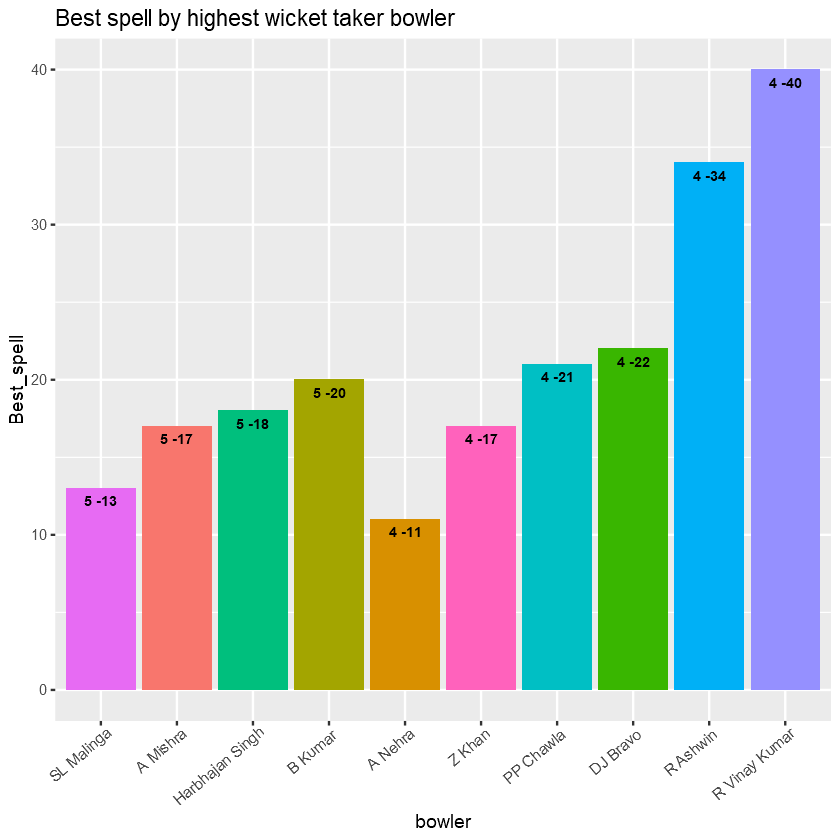

In [166]:
ggplot(data = bf8 ,aes(x = factor(bowler,level = c(list_b)) , y = Best,fill = bowler)) +
     geom_bar(stat = "identity")+
     theme(axis.text.x = element_text(angle = 40 , hjust = 1)) +
     geom_text(aes(label = Best_spell),color="black",fontface = "bold",size =2.8,vjust = 1.8)+
     guides(fill = FALSE) +
     labs(title = "Best spell by highest wicket taker bowler" , x = "bowler" , y = "Best_spell")

In [167]:
#Best Bowling Spell in IPL [ TOP TEN ]


sqldf("select match_id ,bowler,count(dismissal_kind) w from d group by match_id ,bowler order by w desc") %>% head(10)

bbs <- sqldf("select match_id , bowler , count(dismissal_kind) wickets from w 
               group by match_id , bowler having wickets >=5 ")

list1 <- c("Sohail Tanvir","A Zampa","AJ Tye","B Kumar","JD Unadkat","L Balaji","A Mishra",
           "A Kumble","SL Malinga","Harbhajan Singh",
            "I Sharma","MM Patel","RA Jadeja","AD Mascarenhas","SP Narine","JP Faulkner")

bbs1 <- d %>%
  select(match_id , bowler , ball,total_runs) %>%
  filter(bowler %in% c(list1))

bbs2 <- sqldf("select match_id , bowler , sum(total_runs) Runs from bbs1 group by match_id , bowler ")

bbs3 <- left_join(bbs , bbs2 ) %>%
        arrange(-wickets , Runs)

bbs3$Best_spell <- paste(bbs3$wickets,bbs3$Runs,sep = " -")

bbs3$Bowler_Best_spell <- NULL 

bbs4 <- sqldf("select match_id , bowler ,count(ball) Balls from bbs1 group by match_id,bowler") 


bbs5 <- left_join(bbs3 ,bbs4 , by = c("match_id" , "bowler")) %>%
        mutate(Over = round(Balls / 6 ,1 ) , Run_Rate = round(Runs / Over ,2))

match_id,bowler,w
34,JJ Bumrah,34
126,Kamran Khan,34
190,J Theron,32
388,DW Steyn,32
536,CH Morris,32
157,SL Malinga,31
388,R Vinay Kumar,31
401,R Rampaul,31
92,Umar Gul,30
145,SM Harwood,30


Joining, by = c("match_id", "bowler")


In [168]:
#Are they able to Save the match when a Bowler takes 5 wickets or more in a Match .

# YES = 78 %

# NO = 23 %

bbs6 <- sqldf("select id,winner from m ")

bbs7 <- sqldf("select b.*,c.winner from bbs5 b
          inner join bbs6 c
          on b.match_id = c.id")

bbs7 <- bbs7 %>% arrange(-wickets,Runs) 

bbs7$row_id <- c(1:18)

bbs7$bowler_Best_spell <- paste(bbs3$bowler,bbs3$Best_spell,sep = "    : ") 

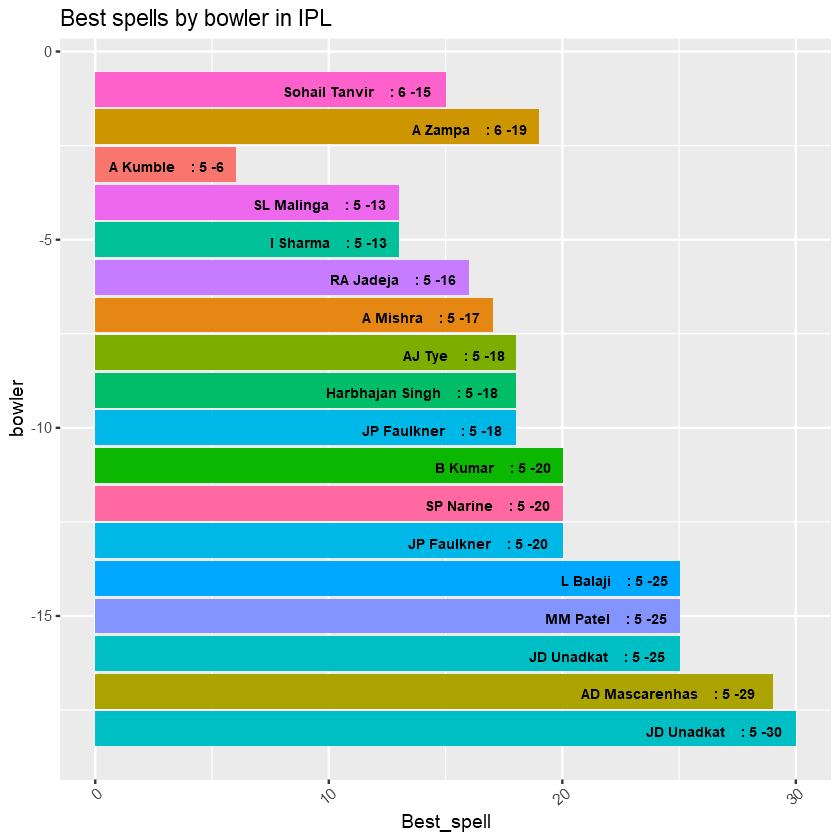

In [169]:
ggplot(data = bbs7 ,aes(x = -row_id , y = Runs,fill = bowler)) +
     geom_bar(stat = "identity")+
     theme(axis.text.x = element_text(angle = 40 , hjust = 1)) +
     geom_text(aes(label = bowler_Best_spell) ,color="black",fontface = "bold",size =2.8,vjust = 0.8, hjust = 1.1)+
     guides(fill = FALSE) +
     labs(title = "Best spells by bowler in IPL" , x = "bowler" , y = "Best_spell") +
     coord_flip()

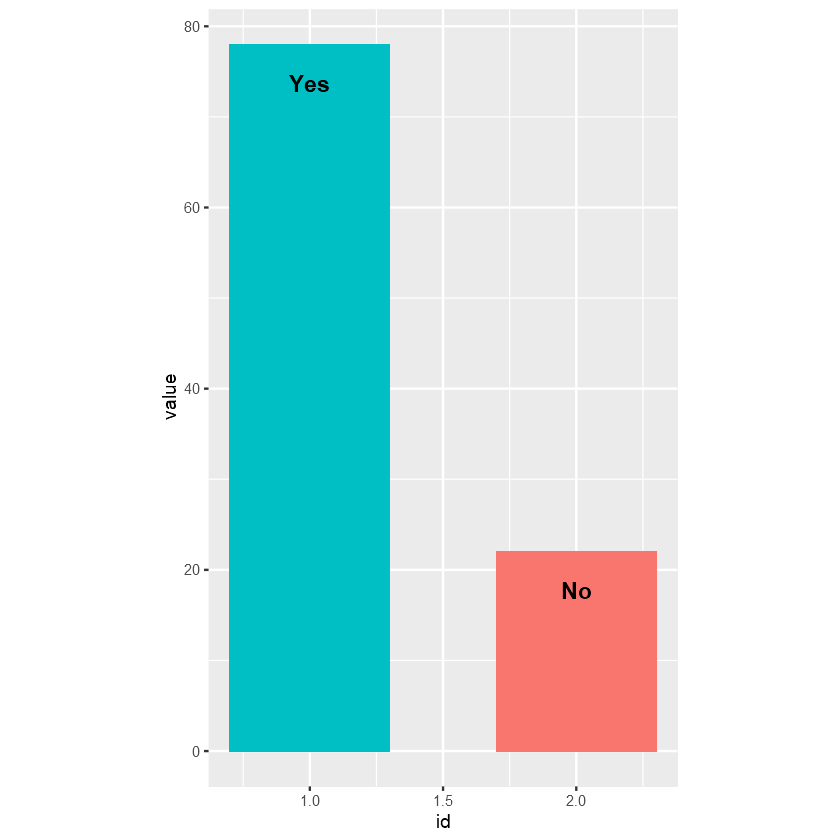

In [170]:
#Are they able to Save the match when a Bowler takes 5 wickets or more in a Match .

# YES = 78 %

# NO = 22 %

bbs8 <- data.frame(id = c(1:2),var = c("Yes","No"),value = c(78 ,22))

ggplot(data = bbs8 , aes(x = id , y = value,fill = var))+
       geom_bar(stat="identity", width = 0.6) +
       coord_fixed(0.034)+
       geom_text(aes(label = var) ,color="black",fontface = "bold",size =4.8,vjust = 2.8)+
       guides(fill = FALSE)

In [171]:
# Extras by a Bowlers [ TOP 20 ]

#  Wide_Runs + NoBall_Runs + Bye_Runs + Leg_Bye_Runs + Penalty_Runs = Total Extras

#  143 + 18 + 22 + 80 + 5 = 268

ebb <- sqldf("select bowler , sum(extra_runs) Extras,sum(wide_runs) Wide_Runs ,sum(noball_runs) NoBall_Runs ,
       sum(bye_runs) Bye_Runs , sum(legbye_Runs) Leg_Bye_Runs ,sum(penalty_runs) Penalty_Runs from d
        group by bowler order by Extras desc") %>% head(20) 

plot <- melt(ebb) %>%
      filter(variable != "Extras") %>%
      ggplot(aes(bowler, y = value, fill = variable)) +
      geom_bar(stat = "identity")+
      guides(Fill = TRUE ) +
      theme(axis.text.x = element_text(angle = 40 , hjust = 1)) +
      labs(title = " EXtras by Bowlers ")


Using bowler as id variables


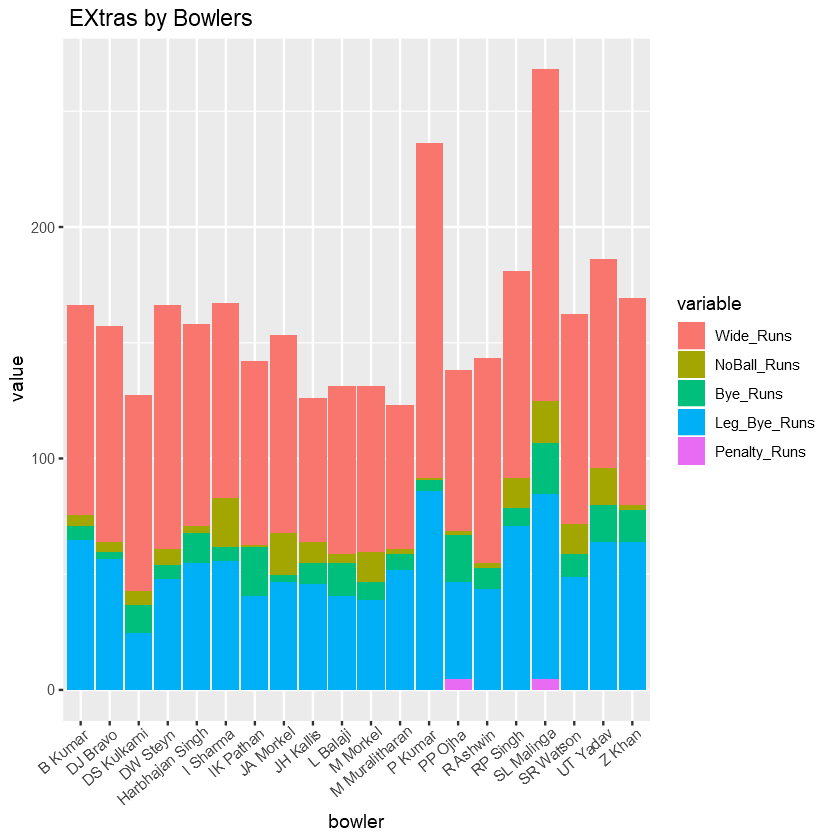

In [172]:
plot

In [173]:
# Extras in IPL History

extras <- sqldf("select sum(extra_runs) Extras,sum(wide_runs) Wide_Runs ,sum(noball_runs) NoBall_Runs ,
          sum(bye_runs) Bye_Runs , sum(legbye_Runs) Leg_Bye_Runs ,sum(penalty_runs) Penalty_Runs from d ")

plot1 <- melt(extras) %>%
    mutate(id = 0) %>%
    filter(variable != "Extras") %>%
    ggplot(aes(x = id, y = value, fill = variable)) +
    geom_bar(stat = "identity")+
    guides(ill = FALSE ) +
    theme(axis.text.x = element_text(angle = 40 , hjust = 1)) +
    labs(title = " EXtras by Bowlers in IPL ") 

No id variables; using all as measure variables


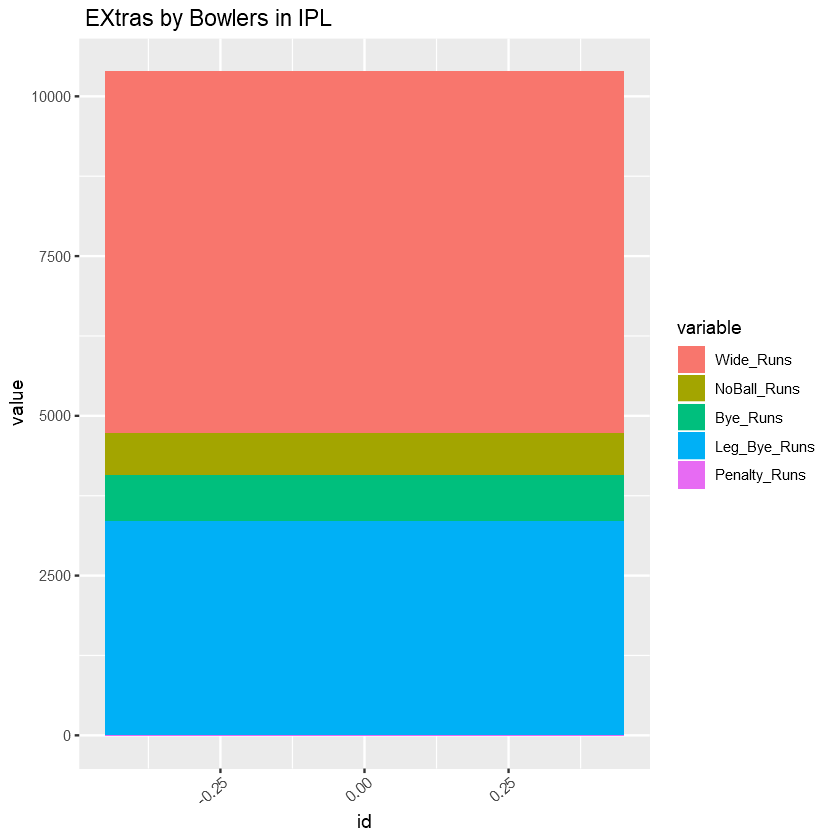

In [174]:
plot1

In [175]:
# Extras by Team

ebt <- sqldf("select bowling_team,sum(extra_runs) Extras,sum(wide_runs) Wide_Runs ,sum(noball_runs) NoBall_Runs ,
          sum(bye_runs) Bye_Runs , sum(legbye_Runs) Leg_Bye_Runs ,sum(penalty_runs) Penalty_Runs 
           from d group by bowling_team")


plot2 <- melt(ebt) %>%
  filter(variable != "Extras") %>%
  ggplot(aes(x = bowling_team , y = value , fill = variable)) +
  geom_bar(stat = "identity")+
  guides(Fill = FALSE ) +
  theme(axis.text.x = element_text(angle = 90 , hjust = 1)) +
  labs(title = " EXtras by Team ")



Using bowling_team as id variables


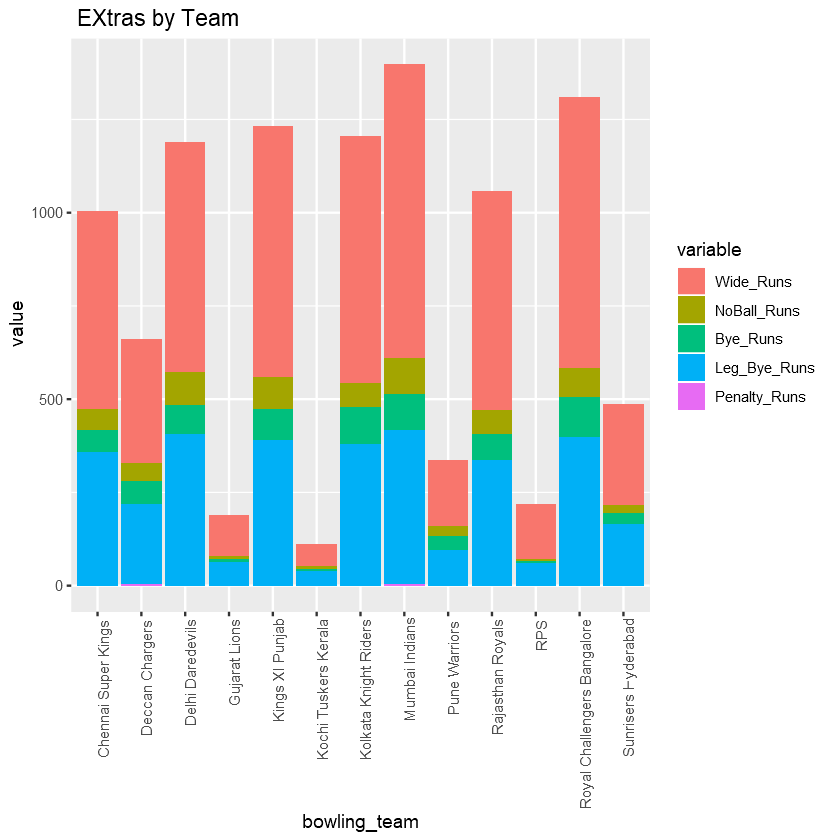

In [176]:
plot2

In [177]:
#Big Margin win in IPL

# case : (a)

#Big Margin Wins : By Runs

bmw1 <- sqldf("select id ,team1 ,team2 ,winner, win_by_runs from m where win_by_runs >=90")
bmw2 <- sqldf("select id ,team1 ,team2 ,winner, win_by_wickets from m where win_by_wickets >=10")

bmw1$match_id <- 1:nrow(bmw1)

plot3 <- ggplot(data = bmw1, aes(x = match_id , y = win_by_runs , fill = winner)) +
  geom_bar(stat = "identity")+
  guides(Fill = T ) +
  theme(axis.text.x = element_text(angle = 0 , hjust = 1)) +
  labs(title = "Big-Margin wins by Team : Defending ", x = "ID" , y = "Value") +
  scale_x_continuous(breaks = c(1:13))

# RCB and CSK secure Big margin win 3 Times while defending the Target .


# case : (b)

#Big Margin Wins : By Wickets


bmw2 <- sqldf("select id ,team1 ,team2 ,winner, win_by_wickets from m where win_by_wickets >=8")

bmw3 <- sqldf("select winner ,count(win_by_wickets) count from bmw2 group by winner order by count desc ")


plot4 <- ggplot(data = bmw3, aes(reorder(winner,-count),y = count , fill = winner)) +
         geom_bar(stat = "identity")+
         guides(fill = FALSE ) +
         theme(axis.text.x = element_text(angle = 90 , hjust = 1)) +
         labs(title = "Big-Margin wins by Team : Chasing ", x = "Team")

# KKR secure Big margin wins 15 Times followed by RCB 14 Times while chasing the Target .


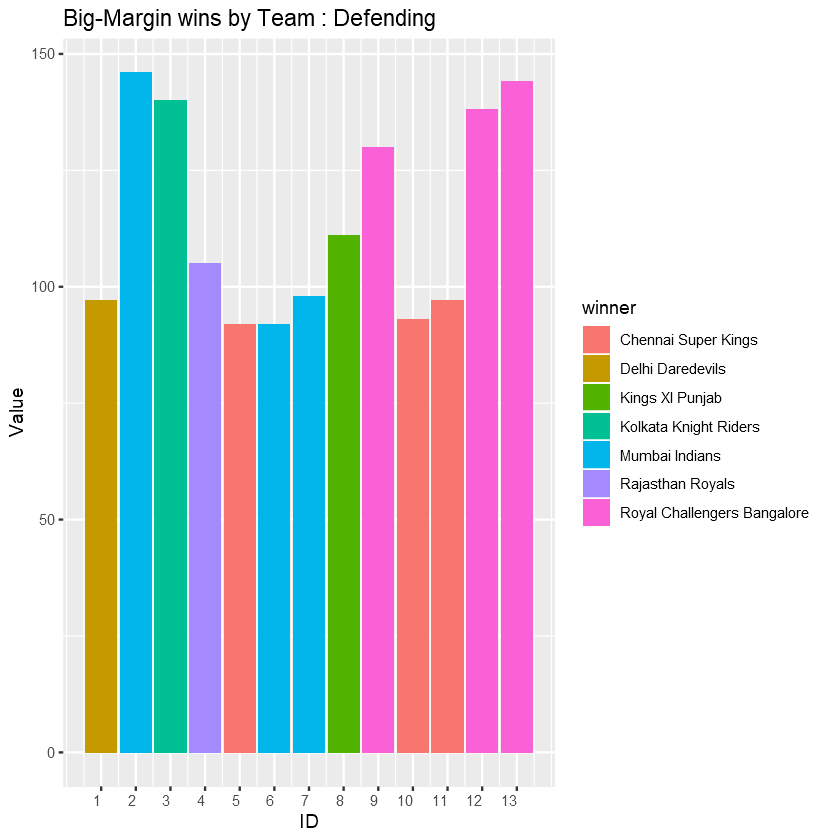

In [178]:
plot3

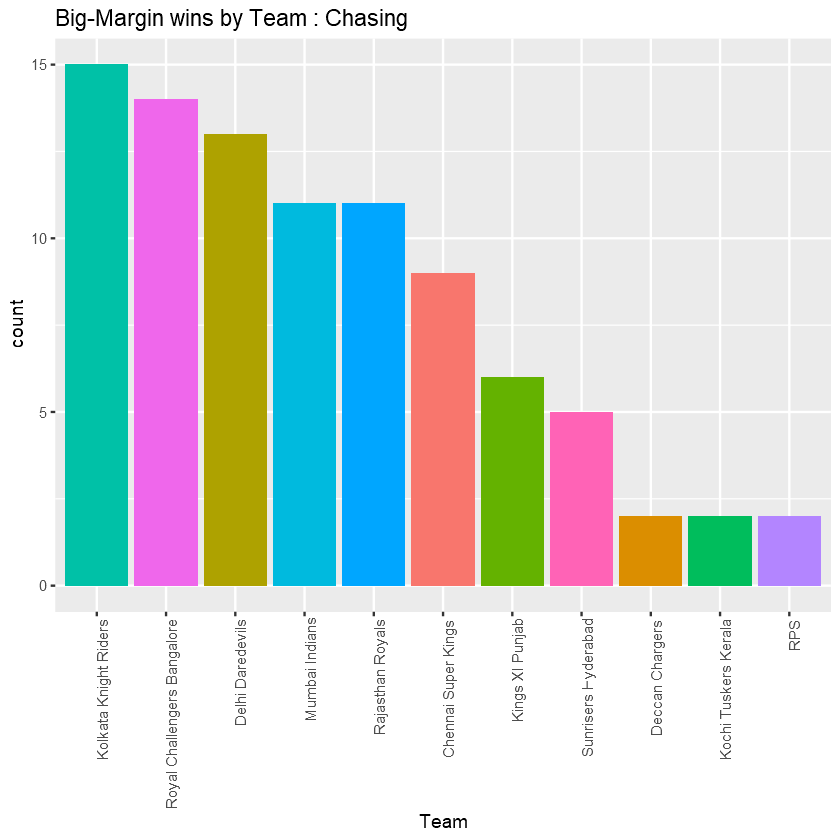

In [179]:
plot4

Warning message:
"Column `Var1` joining factors with different levels, coercing to character vector"

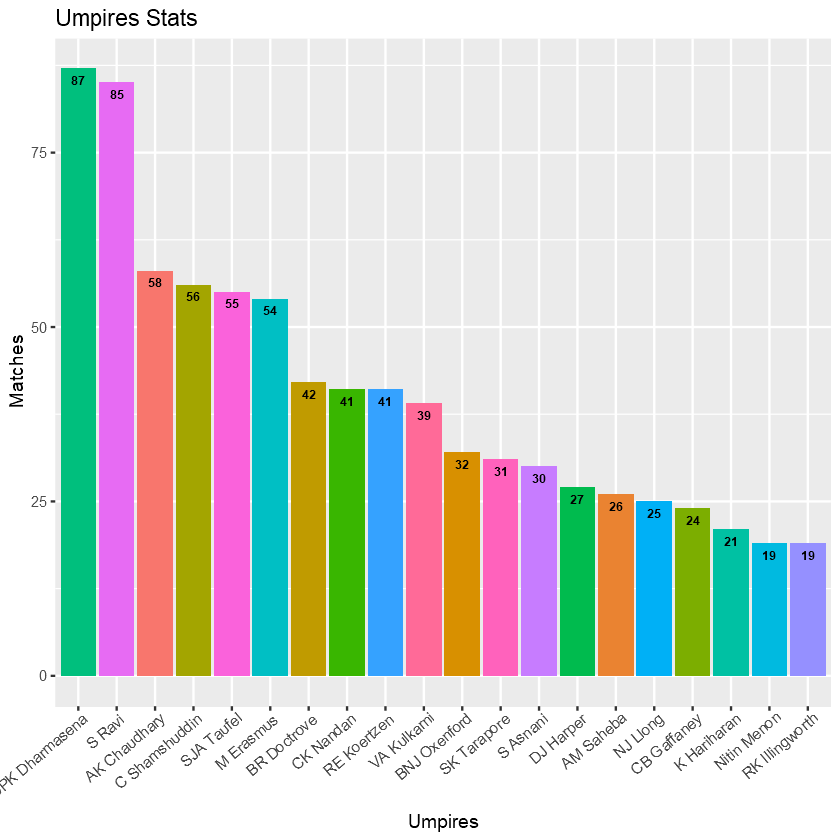

In [180]:
# Umpires Stats

e1 <- as.data.frame(table(m$umpire1)) 
e2 <- as.data.frame(table(m$umpire2))



inner_join(e1,e2,by="Var1") %>% 
      mutate(Matches = Freq.x + Freq.y) %>%
      select(Var1 , Matches) %>% 
      filter(Var1 != "") %>%
      arrange(-Matches) %>%
      head(20) %>% 
      ggplot(aes(reorder(Var1,-Matches),y = Matches , fill = Var1)) +
         geom_bar(stat = "identity")+
         guides(fill = FALSE ) +
         theme(axis.text.x = element_text(angle = 40 , hjust = 1)) +
         labs(title = "Umpires Stats ", x = "Umpires") +
         geom_text(aes(label = Matches),color="black",fontface = "bold",size =2.5,vjust = 1.8)

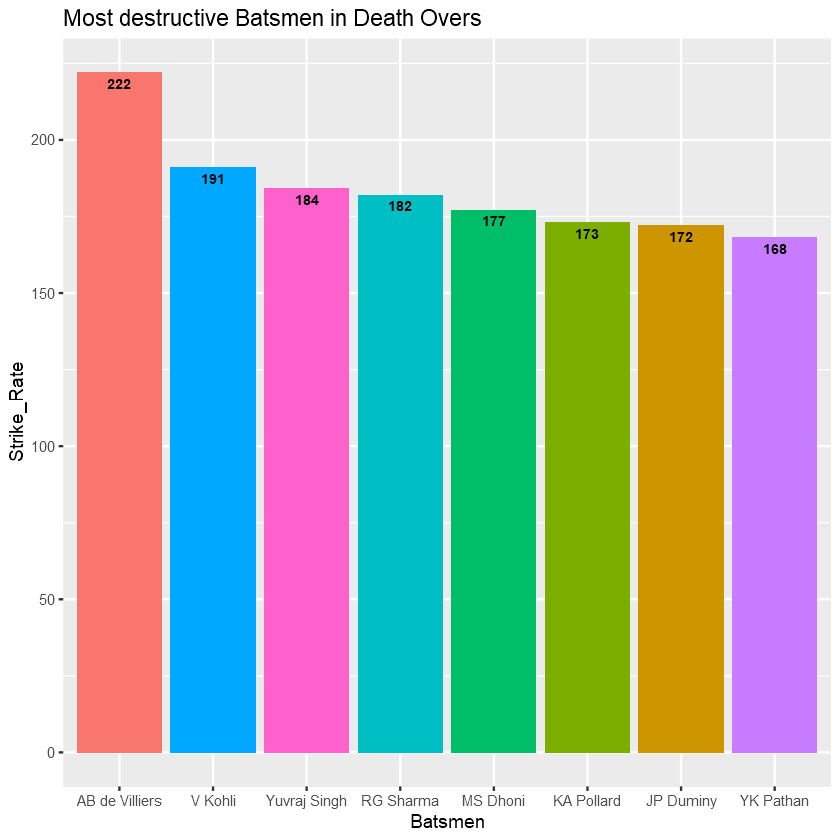

In [181]:
#Most destructive Batsmen in Death Overs .

mdb1 <- d %>%
  filter(over %in% c(16,17,18,19,20) & is_super_over == 0) %>%
  group_by(batsman) %>%
  summarise(Total_Runs = sum(batsman_runs)) %>%
  arrange(-Total_Runs)

mdb2 <- d  %>%
        filter(over %in% c(16,17,18,19,20) & wide_runs == 0 & noball_runs ==0 & is_super_over == 0) %>%
        group_by(batsman) %>%
        summarise(Total_Balls = length(batsman_runs)) %>%
        arrange(-Total_Balls)

mdb <- inner_join(mdb1,mdb2,by ="batsman") %>%
            filter(Total_Runs >= 800) %>%
            mutate(Strike_Rate = round((Total_Runs / Total_Balls) * 100)) %>%
            arrange(-Strike_Rate)

mdb_plot <- ggplot(data = mdb , aes(reorder(batsman , -Strike_Rate) , Strike_Rate, fill = batsman)) +
           geom_bar(stat = "identity",alpha = 1.0) +
           labs(x = "Batsmen" , title = "Most destructive Batsmen in Death Overs") +
           guides(fill = FALSE) +
           geom_text(aes(label = Strike_Rate) , vjust = 1.6 , size = 2.8 ,fontface = "bold")
mdb_plot

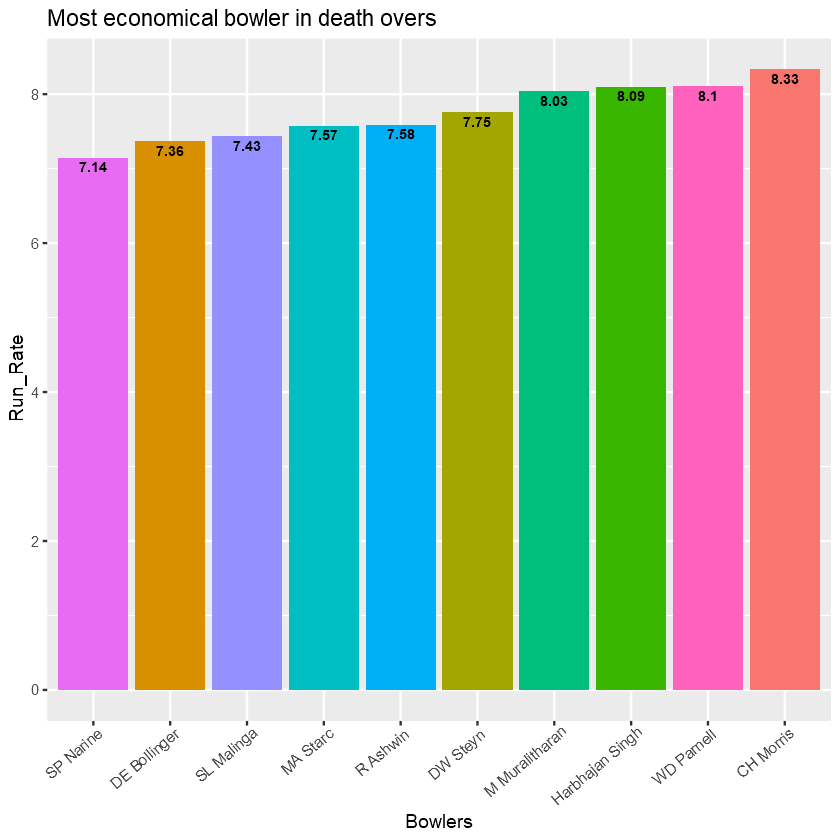

In [182]:
# Most economical bowlers in death overs   [ TOP 10 ]

#Do and Die situation for both Batsmen and and the Bowlers hence it is called Death Over :)
 
meb  <- d %>%
  filter(over %in% c(16,17,18,19,20) & is_super_over == 0) %>%
  group_by(bowler) %>%
  summarise(Total_Runs = sum(total_runs) , Total_Balls = length(ball)) %>%
  mutate(Overs = Total_Balls / 6) %>%
  mutate(Run_Rate = round((Total_Runs / Overs) ,2)) %>%
  arrange(Run_Rate) %>%
  filter(Total_Balls > 200) %>%
  head(10)
 
ggplot(data = meb , aes(reorder(bowler , Run_Rate) , Run_Rate , fill = bowler)) +
       geom_bar(stat = "identity") +
       geom_text(aes(label = Run_Rate) , vjust = 1.4 , fontface = "bold" , size = 2.8) +
       guides(fill = FALSE) +
       labs(title = "Most economical bowler in death overs" , x = "Bowlers")+
       theme(axis.text.x = element_text(angle = 40 , hjust = 1))

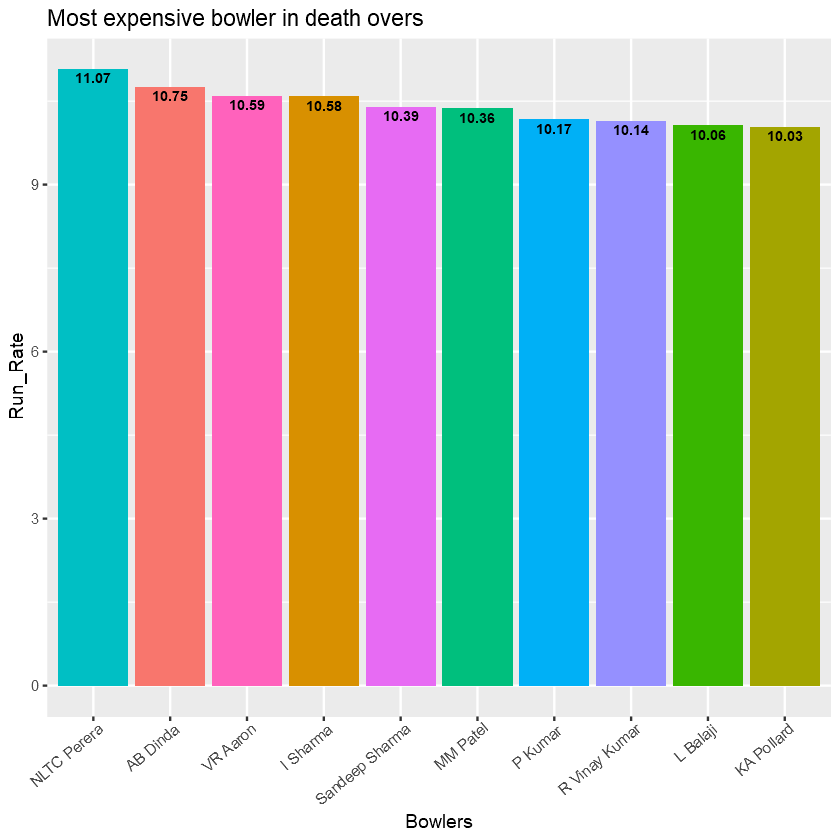

In [183]:
# Most expensive bowlers in death overs   [ TOP 10 ]

meb1  <- d %>%
  filter(over %in% c(16,17,18,19,20) & is_super_over == 0) %>%
  group_by(bowler) %>%
  summarise(Total_Runs = sum(total_runs) , Total_Balls = length(ball)) %>%
  mutate(Overs = Total_Balls / 6) %>%
  mutate(Run_Rate = round((Total_Runs / Overs),2)) %>%
  arrange(-Run_Rate) %>%
  filter(Total_Balls > 200) %>%
  head(10)

ggplot(data = meb1 , aes(reorder(bowler , -Run_Rate) , Run_Rate , fill = bowler)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Run_Rate) , vjust = 1.4 , fontface = "bold" , size = 2.8) +
  guides(fill = FALSE) +
  labs(title = "Most expensive bowler in death overs" , x = "Bowlers") +
  theme(axis.text.x = element_text(angle = 40 , hjust = 1))

In [184]:
# Most economical Bowlers in IPL

meb2  <- d %>%
  filter(is_super_over == 0) %>%
  group_by(bowler) %>%
  summarise(Total_Runs = sum(total_runs) , Total_Balls = length(ball)) %>%
  mutate(Overs = Total_Balls / 6) %>%
  mutate(Run_Rate = round((Total_Runs / Overs) ,2)) %>%
  arrange(Run_Rate) %>%
  filter(Total_Balls > 600) %>%
  head(10)

# Most expensive Bowlers in IPL

meb3  <- d %>%
  filter(is_super_over == 0) %>%
  group_by(bowler) %>%
  summarise(Total_Runs = sum(total_runs) , Total_Balls = length(ball)) %>%
  mutate(Overs = Total_Balls / 6) %>%
  mutate(Run_Rate = round((Total_Runs / Overs) ,2)) %>%
  arrange(-Run_Rate) %>%
  filter(Total_Balls > 600) %>%
  head(10) 

In [185]:
meb2;meb3

bowler,Total_Runs,Total_Balls,Overs,Run_Rate
SP Narine,2074,1950,325.0000,6.38
R Ashwin,2552,2359,393.1667,6.49
DW Steyn,2360,2153,358.8333,6.58
A Kumble,1089,983,163.8333,6.65
M Muralitharan,1755,1577,262.8333,6.68
SL Malinga,3034,2694,449.0000,6.76
DL Vettori,894,785,130.8333,6.83
J Botha,818,709,118.1667,6.92
Harbhajan Singh,3453,2989,498.1667,6.93
S Nadeem,1332,1137,189.5000,7.03


bowler,Total_Runs,Total_Balls,Overs,Run_Rate
Mohammed Shami,960,659,109.8333,8.74
NLTC Perera,1031,715,119.1667,8.65
AB Agarkar,1174,820,136.6667,8.59
JP Faulkner,1827,1276,212.6667,8.59
MS Gony,1317,925,154.1667,8.54
HV Patel,999,707,117.8333,8.48
PJ Sangwan,1181,837,139.5000,8.47
AD Russell,917,651,108.5000,8.45
KA Pollard,1785,1276,212.6667,8.39
VR Aaron,1250,904,150.6667,8.30


In [186]:
#Purple Cap Winners

pcw <- d %>%
  filter(!dismissal_kind %in%  c("","run out","retired hurt","obstructing the field" )) %>%
  group_by(match_id,bowler) %>%
  summarise(Wickets = length(dismissal_kind))

pcw1 <- m %>%
        select(id , season)


pcw2 <- merge(x = pcw1 , y = pcw , by.x = "id" , by.y = "match_id")

pcw3 <- sqldf("select season , bowler , sum(wickets) total_wickets from pcw2 group by season , bowler ") 



pcw4 <- pcw3 %>%
   group_by(season) %>%
   mutate(Rank = rank(total_wickets)) %>%
   filter(Rank == max(Rank)) %>%
   select(season ,bowler , total_wickets)

pcw4$pcw_label <- paste(pcw4$bowler,pcw4$total_wickets,sep = "    : ") 


pcw5 <-
   ggplot(data = pcw4, aes(season, total_wickets )) +
   geom_bar(stat = "identity",fill="purple") +
   geom_text(aes(label = pcw_label) ,fontface = "bold" , size = 2.8, color = "black" ,vjust = 0.8, hjust = 1.1) +
   labs(title = "Purple Cap Winner" , x = "season")+
   scale_x_continuous(breaks =c(2008:2017)) +
   scale_y_continuous(breaks =c(0:38))+
   coord_flip() 

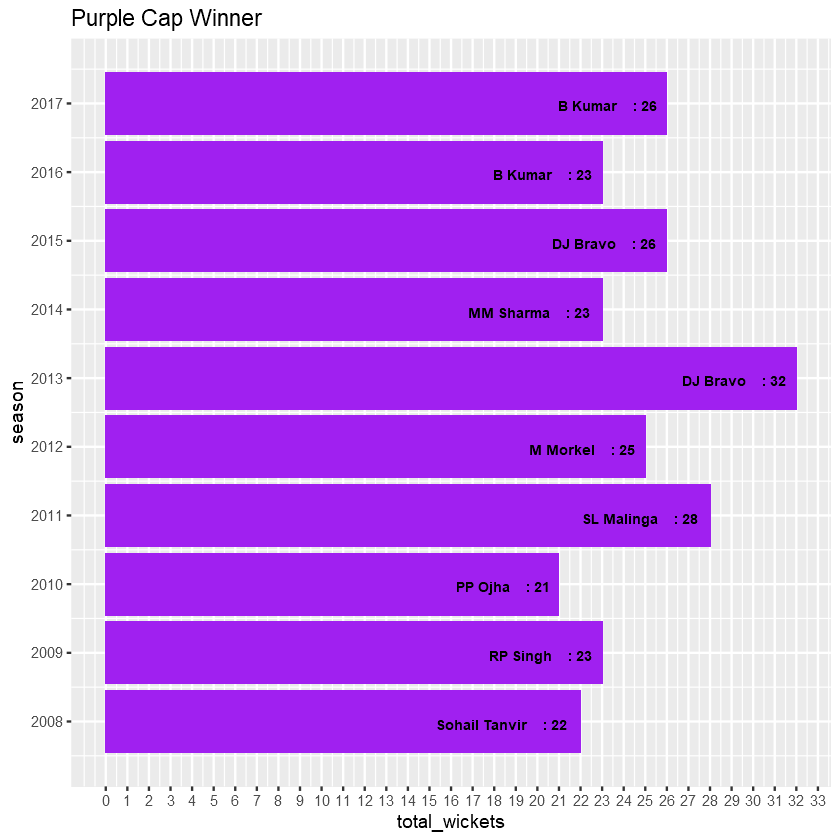

In [187]:
pcw5

In [188]:
# Most Dismissal for a batsmen by a bowler 

mdbb <- d %>%
  filter(!dismissal_kind %in%  c("","run out","retired hurt","obstructing the field" )) %>%
  group_by(batsman,bowler) %>%
  summarise(Wickets = length(dismissal_kind)) %>% 
  arrange(-Wickets) %>% 
  head(10)

In [189]:
mdbb

batsman,bowler,Wickets
MS Dhoni,Z Khan,7
AM Rahane,B Kumar,6
G Gambhir,Z Khan,6
MS Dhoni,PP Ojha,6
RG Sharma,R Vinay Kumar,6
V Kohli,A Nehra,6
AT Rayudu,MM Sharma,5
G Gambhir,PP Ojha,5
KC Sangakkara,R Sharma,5
PA Patel,B Kumar,5


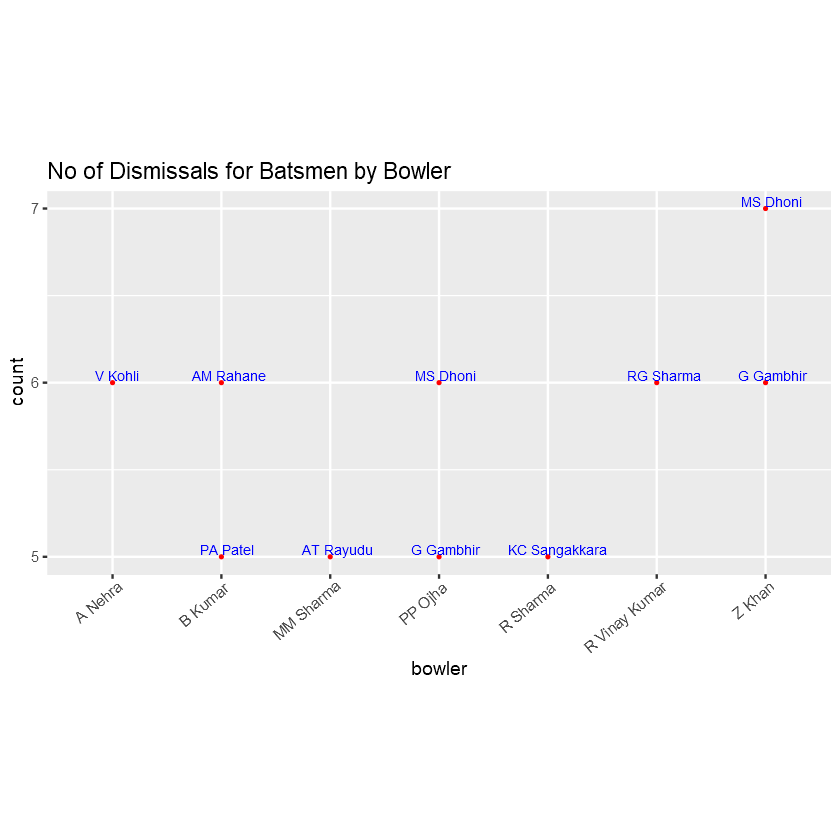

In [190]:
ggplot(data = mdbb , aes(x = bowler , y = Wickets ,label = batsman,fill = batsman)) +
      geom_point(size = 0.4,color = "red") + 
      labs(title = "No of Dismissals for Batsmen by Bowler",y = "count")+
      coord_fixed(1.6)+
      scale_y_continuous(breaks = c(2:10))+
      geom_text(aes(label=batsman),hjust=0.4, vjust=-0.2 , size = 2.8,color = "blue")+
      guides(fill= FALSE)+
      theme(axis.text.x = element_text(angle = 40 , hjust = 1))

In [191]:
#total_matches_played/win_by_team ~ SRH

srh1 <- sqldf("select season , count(winner) SRH_W from m 
         where winner = 'Sunrisers Hyderabad' group by season ") 

srh2 <- sqldf("select season , count(*) SRH_P from m 
         where team1 = 'Sunrisers Hyderabad' OR team2 = 'Sunrisers Hyderabad'  group by season ") 

srh3 <- merge(x = srh2 , y = srh1 , by = "season") %>% 
            mutate(SRH_per = round((SRH_W / SRH_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ SRH


srh4 <- sqldf("select season , count(winner) SRH_WH from m 
         where winner = 'Sunrisers Hyderabad' and city =  'Hyderabad' group by season") 

srh5 <- sqldf("select season , count(*) SRH_PH from m 
         where (team1='Sunrisers Hyderabad'   OR team2 = 'Sunrisers Hyderabad') AND  city = 'Hyderabad'
         group by season ") 

srh6 <- merge(x = srh5 , y = srh4 , by = "season") %>% 
            mutate(SRH_per_H = round((SRH_WH / SRH_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ SRH


srh7 <- sqldf("select season , count(winner) SRH_WA from m 
         where winner = 'Sunrisers Hyderabad' and city !=  'Hyderabad' group by season ") 

srh8 <- sqldf("select season , count(*) SRH_PA from m 
         where (team1 = 'Sunrisers Hyderabad' OR team2 = 'Sunrisers Hyderabad') AND  city !=  'Hyderabad' 
         group by season ") 

srh9 <- merge(x = srh8 , y = srh7 , by = "season") %>% 
            mutate(SRH_per_A = round((SRH_WA / SRH_PA),4) * 100)


srh <- sqldf("select srh3.season,
              srh3.SRH_P,
              srh3.SRH_W,
              srh3.SRH_per,
              srh6.SRH_PH,
              srh6.SRH_WH,
              srh6.SRH_per_H,
              srh9.SRH_PA,
              srh9.SRH_WA,
              srh9.SRH_per_A from srh3 
              inner join srh6 
              on srh3.season = srh6.season
              inner join srh9 
              on srh3.season = srh9.season")


#  _P = Total matches played 
#  _W = Total matches Won 
#  _per = win percentage 
#  __PH = Total matches played in home ground 
#  _WH = Total matches Won in home ground 
#  _per_H = win percentage in HOME ground 
#  _PA = Matches Played away from home 
#  _WA  = Matches won away from Home 
#  _per_A = win percentage away from home

# Total Matches = Matches Played in HOme ground + Matches played away from Home ground  
#      17                 8 + 9




In [192]:
srh

season,SRH_P,SRH_W,SRH_per,SRH_PH,SRH_WH,SRH_per_H,SRH_PA,SRH_WA,SRH_per_A
2013,17,10,58.82,8,7,87.50,9,3,33.33
2014,14,6,42.86,4,1,25.00,10,5,50.00
2015,14,7,50.00,4,2,50.00,10,5,50.00
2016,17,11,64.71,7,4,57.14,10,7,70.00
2017,14,8,57.14,7,6,85.71,7,2,28.57


In [193]:
#total_matches_played/win_by_team ~ RCB

rcb1 <- sqldf("select season , count(winner) RCB_W from m 
         where winner = 'Royal Challengers Bangalore' group by season ") 

rcb2 <- sqldf("select season , count(*) RCB_P from m 
         where team1 = 'Royal Challengers Bangalore' OR team2 = 'Royal Challengers Bangalore'  group by season ") 

rcb3 <- merge(x = rcb2 , y = rcb1 , by = "season") %>% 
            mutate(RCB_per = round((RCB_W / RCB_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ RCB


rcb4 <- sqldf("select season , count(winner) RCB_WH from m 
         where winner = 'Royal Challengers Bangalore' and city =  'Bangalore' group by season") 

rcb5 <- sqldf("select season , count(*) RCB_PH from m 
         where (team1='Royal Challengers Bangalore' OR team2 = 'Royal Challengers Bangalore') AND city = 'Bangalore'
         group by season ") 

rcb6 <- merge(x = rcb5 , y = rcb4 , by = "season") %>% 
            mutate(RCB_per_H = round((RCB_WH / RCB_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ RCB


rcb7 <- sqldf("select season , count(winner) RCB_WA from m 
         where winner = 'Royal Challengers Bangalore' and city != 'Bangalore' group by season ") 

rcb8 <- sqldf("select season , count(*) RCB_PA from m 
         where (team1 = 'Royal Challengers Bangalore' OR team2 = 'Royal Challengers Bangalore') AND city !=  'Bangalore' 
         group by season ") 

rcb9 <- merge(x = rcb8 , y = rcb7 , by = "season") %>% 
            mutate(RCB_per_A = round((RCB_WA / RCB_PA),4) * 100)


rcb <- sqldf("select rcb3.season,
              rcb3.RCB_P,
              rcb3.RCB_W,
              rcb3.RCB_per,
              rcb6.RCB_PH,
              rcb6.RCB_WH,
              rcb6.RCB_per_H,
              rcb9.RCB_PA,
              rcb9.RCB_WA,
              rcb9.RCB_per_A from rcb3 
              left join rcb6 
              on rcb3.season = rcb6.season
              left join rcb9 
              on rcb3.season = rcb9.season")


rcb[is.na(rcb)] <- 0 

In [194]:
rcb 

season,RCB_P,RCB_W,RCB_per,RCB_PH,RCB_WH,RCB_per_H,RCB_PA,RCB_WA,RCB_per_A
2008,14,4,28.57,7,1,14.29,7,3,42.86
2009,16,9,56.25,0,0,0.00,16,9,56.25
2010,16,8,50.00,7,4,57.14,9,4,44.44
2011,16,10,62.50,6,5,83.33,10,5,50.00
2012,15,8,53.33,7,3,42.86,8,5,62.50
2013,16,9,56.25,8,7,87.50,8,2,25.00
2014,14,5,35.71,5,2,40.00,9,3,33.33
2015,16,8,50.00,7,2,28.57,9,6,66.67
2016,16,9,56.25,9,5,55.56,7,4,57.14
2017,13,3,23.08,6,1,16.67,7,2,28.57


In [195]:
#total_matches_played/win_by_team ~ RPS

rps1 <- sqldf("select season , count(winner) RPS_W from m 
         where winner = 'RPS' group by season ") 

rps2 <- sqldf("select season , count(*) RPS_P from m 
         where team1 = 'RPS' OR team2 = 'RPS'  group by season ") 

rps3 <- merge(x = rps2 , y = rps1 , by = "season") %>% 
            mutate(RPS_per = round((RPS_W / RPS_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ RPS


rps4 <- sqldf("select season , count(winner) RPS_WH from m 
         where winner = 'RPS' and city =  'Pune' group by season") 

rps5 <- sqldf("select season , count(*) RPS_PH from m 
         where (team1='RPS' OR team2 = 'RPS') AND city = 'Pune'
         group by season ") 

rps6 <- merge(x = rps5 , y = rps4 , by = "season") %>% 
            mutate(RPS_per_H = round((RPS_WH / RPS_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ RPS


rps7 <- sqldf("select season , count(winner) RPS_WA from m 
         where winner = 'RPS' and city != 'Pune' group by season ") 

rps8 <- sqldf("select season , count(*) RPS_PA from m 
         where (team1 = 'RPS' OR team2 = 'RPS') AND city !=  'Pune' 
         group by season ") 

rps9 <- merge(x = rps8 , y = rps7 , by = "season") %>% 
            mutate(RPS_per_A = round((RPS_WA / RPS_PA),4) * 100)


rps <- sqldf("select rps3.season,
              rps3.RPS_P,
              rps3.RPS_W,
              rps3.RPS_per,
              rps6.RPS_PH,
              rps6.RPS_WH,
              rps6.RPS_per_H,
              rps9.RPS_PA,
              rps9.RPS_WA,
              rps9.RPS_per_A from rps3 
              left join rps6 
              on rps3.season = rps6.season
              left join rps9 
              on rps3.season = rps9.season")


rps[is.na(rps)] <- 0 

In [196]:
rps

season,RPS_P,RPS_W,RPS_per,RPS_PH,RPS_WH,RPS_per_H,RPS_PA,RPS_WA,RPS_per_A
2016,14,5,35.71,0,0,0.00,10,5,50.00
2017,16,10,62.50,7,5,71.43,9,5,55.56


In [197]:
#total_matches_played/win_by_team ~ RR

rr1 <- sqldf("select season , count(winner) RR_W from m 
         where winner = 'Rajasthan Royals' group by season ") 

rr2 <- sqldf("select season , count(*) RR_P from m 
         where team1 = 'Rajasthan Royals' OR team2 = 'Rajasthan Royals'  group by season ") 

rr3 <- merge(x = rr2 , y = rr1 , by = "season") %>% 
            mutate(RR_per = round((RR_W / RR_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ RR


rr4 <- sqldf("select season , count(winner) RR_WH from m 
         where winner = 'Rajasthan Royals' and city =  'Jaipur' group by season") 

rr5 <- sqldf("select season , count(*) RR_PH from m 
         where (team1='Rajasthan Royals' OR team2 = 'Rajasthan Royals') AND city = 'Jaipur'
         group by season ") 

rr6 <- merge(x = rr5 , y = rr4 , by = "season") %>% 
            mutate(RR_per_H = round((RR_WH / RR_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ RR


rr7 <- sqldf("select season , count(winner) RR_WA from m 
         where winner = 'Rajasthan Royals' and city != 'Jaipur' group by season ") 

rr8 <- sqldf("select season , count(*) RR_PA from m 
         where (team1 = 'Rajasthan Royals' OR team2 = 'Rajasthan Royals') AND city !=  'Jaipur' 
         group by season ") 

rr9 <- merge(x = rr8 , y = rr7 , by = "season") %>% 
            mutate(RR_per_A = round((RR_WA / RR_PA),4) * 100)


rr <- sqldf("select rr3.season,
              rr3.RR_P,
              rr3.RR_W,
              rr3.RR_per,
              rr6.RR_PH,
              rr6.RR_WH,
              rr6.RR_per_H,
              rr9.RR_PA,
              rr9.RR_WA,
              rr9.RR_per_A from rr3 
              left join rr6 
              on rr3.season = rr6.season
              left join rr9 
              on rr3.season = rr9.season")


rr[is.na(rr)] <- 0 

In [198]:
rr

season,RR_P,RR_W,RR_per,RR_PH,RR_WH,RR_per_H,RR_PA,RR_WA,RR_per_A
2008,16,13,81.25,7,7,100.00,9,6,66.67
2009,13,6,46.15,0,0,0.00,13,6,46.15
2010,14,6,42.86,3,1,33.33,11,5,45.45
2011,13,6,46.15,7,4,57.14,6,2,33.33
2012,16,7,43.75,8,4,50.00,8,3,37.50
2013,18,11,61.11,8,8,100.00,10,3,30.00
2014,14,7,50.00,0,0,0.00,14,7,50.00
2015,14,7,50.00,0,0,0.00,14,7,50.00


In [199]:
#total_matches_played/win_by_team ~ PWR

pwr1 <- sqldf("select season , count(winner) PWR_W from m 
         where winner = 'Pune Warriors' group by season ") 

pwr2 <- sqldf("select season , count(*) PWR_P from m 
         where team1 = 'Pune Warriors' OR team2 = 'Pune Warriors'  group by season ") 

pwr3 <- merge(x = pwr2 , y = pwr1 , by = "season") %>% 
            mutate(PWR_per = round((PWR_W / PWR_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ PWR


pwr4 <- sqldf("select season , count(winner) PWR_WH from m 
         where winner = 'Pune Warriors' and city =  'Pune' group by season") 

pwr5 <- sqldf("select season , count(*) PWR_PH from m 
         where (team1='Pune Warriors' OR team2 = 'Pune Warriors') AND city = 'Pune'
         group by season ") 

pwr6 <- merge(x = pwr5 , y = pwr4 , by = "season") %>% 
            mutate(PWR_per_H = round((PWR_WH / PWR_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ PWR


pwr7 <- sqldf("select season , count(winner) PWR_WA from m 
         where winner = 'Pune Warriors' and city != 'Pune' group by season ") 

pwr8 <- sqldf("select season , count(*) PWR_PA from m 
         where (team1 = 'Pune Warriors' OR team2 = 'Pune Warriors') AND city !=  'Pune' 
         group by season ") 

pwr9 <- merge(x = pwr8 , y = pwr7 , by = "season") %>% 
            mutate(PWR_per_A = round((PWR_WA / PWR_PA),4) * 100)


pwr <- sqldf("select pwr3.season,
              pwr3.PWR_P,
              pwr3.PWR_W,
              pwr3.PWR_per,
              pwr6.PWR_PH,
              pwr6.PWR_WH,
              pwr6.PWR_per_H,
              pwr9.PWR_PA,
              pwr9.PWR_WA,
              pwr9.PWR_per_A from pwr3 
              left join pwr6 
              on pwr3.season = pwr6.season
              left join pwr9 
              on pwr3.season = pwr9.season")

In [200]:
pwr

season,PWR_P,PWR_W,PWR_per,PWR_PH,PWR_WH,PWR_per_H,PWR_PA,PWR_WA,PWR_per_A
2011,14,4,28.57,NA,NA,NA,14,4,28.57
2012,16,4,25.00,8,2,25,8,2,25.00
2013,16,4,25.00,8,2,25,8,2,25.00


In [201]:
#total_matches_played/win_by_team ~ MI

mi1 <- sqldf("select season , count(winner) MI_W from m 
         where winner = 'Mumbai Indians' group by season ") 

mi2 <- sqldf("select season , count(*) MI_P from m 
         where team1 = 'Mumbai Indians' OR team2 = 'Mumbai Indians'  group by season ") 

mi3 <- merge(x = mi2 , y = mi1 , by = "season") %>% 
            mutate(MI_per = round((MI_W / MI_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ MI


mi4 <- sqldf("select season , count(winner) MI_WH from m 
         where winner = 'Mumbai Indians' and city =  'Mumbai' group by season") 

mi5 <- sqldf("select season , count(*) MI_PH from m 
         where (team1='Mumbai Indians' OR team2 = 'Mumbai Indians') AND city = 'Mumbai'
         group by season ") 

mi6 <- merge(x = mi5 , y = mi4 , by = "season") %>% 
            mutate(MI_per_H = round((MI_WH / MI_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ MI


mi7 <- sqldf("select season , count(winner) MI_WA from m 
         where winner = 'Mumbai Indians' and city != 'Mumbai' group by season ") 

mi8 <- sqldf("select season , count(*) MI_PA from m 
         where (team1 = 'Mumbai Indians' OR team2 = 'Mumbai Indians') AND city !=  'Mumbai' 
         group by season ") 

mi9 <- merge(x = mi8 , y = mi7 , by = "season") %>% 
            mutate(MI_per_A = round((MI_WA / MI_PA),4) * 100)


mi <- sqldf("select mi3.season,
              mi3.MI_P,
              mi3.MI_W,
              mi3.MI_per,
              mi6.MI_PH,
              mi6.MI_WH,
              mi6.MI_per_H,
              mi9.MI_PA,
              mi9.MI_WA,
              mi9.MI_per_A from mi3 
              left join mi6 
              on mi3.season = mi6.season
              left join mi9 
              on mi3.season = mi9.season")


mi[is.na(mi)] <- 0 

In [202]:
mi

season,MI_P,MI_W,MI_per,MI_PH,MI_WH,MI_per_H,MI_PA,MI_WA,MI_per_A
2008,14,7,50.00,7,4,57.14,7,3,42.86
2009,13,5,38.46,0,0,0.00,13,5,38.46
2010,16,11,68.75,10,8,80.00,6,3,50.00
2011,16,10,62.50,9,6,66.67,7,4,57.14
2012,17,10,58.82,8,3,37.50,9,7,77.78
2013,19,13,68.42,8,8,100.00,11,5,45.45
2014,15,7,46.67,6,4,66.67,9,3,33.33
2015,16,10,62.50,8,5,62.50,8,5,62.50
2016,14,7,50.00,4,2,50.00,10,5,50.00
2017,17,12,70.59,8,5,62.50,9,7,77.78


In [203]:
#total_matches_played/win_by_team ~ KKR

kkr1 <- sqldf("select season , count(winner) KKR_W from m 
         where winner = 'Kolkata Knight Riders' group by season ") 

kkr2 <- sqldf("select season , count(*) KKR_P from m 
         where team1 = 'Kolkata Knight Riders' OR team2 = 'Kolkata Knight Riders'  group by season ") 

kkr3 <- merge(x = kkr2 , y = kkr1 , by = "season") %>% 
            mutate(KKR_per = round((KKR_W / KKR_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ KKR


kkr4 <- sqldf("select season , count(winner) KKR_WH from m 
         where winner = 'Kolkata Knight Riders' and city =  'Kolkata' group by season") 


kkr5 <- sqldf("select season , count(*) KKR_PH from m 
         where (team1='Kolkata Knight Riders' OR team2 = 'Kolkata Knight Riders') AND city = 'Kolkata'
         group by season ") 

kkr6 <- merge(x = kkr5 , y = kkr4 , by = "season") %>% 
            mutate(KKR_per_H = round((KKR_WH / KKR_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ KKR


kkr7 <- sqldf("select season , count(winner) KKR_WA from m 
         where winner = 'Kolkata Knight Riders' and city != 'Kolkata' group by season ") 

kkr8 <- sqldf("select season , count(*) KKR_PA from m 
         where (team1 = 'Kolkata Knight Riders' OR team2 = 'Kolkata Knight Riders') AND city !=  'Kolkata' 
         group by season ") 

kkr9 <- merge(x = kkr8 , y = kkr7 , by = "season") %>% 
            mutate(KKR_per_A = round((KKR_WA / KKR_PA),4) * 100)


kkr <- sqldf("select kkr3.season,
              kkr3.KKR_P,
              kkr3.KKR_W,
              kkr3.KKR_per,
              kkr6.KKR_PH,
              kkr6.KKR_WH,
              kkr6.KKR_per_H,
              kkr9.KKR_PA,
              kkr9.KKR_WA,
              kkr9.KKR_per_A from kkr3 
              left join kkr6 
              on kkr3.season = kkr6.season
              left join kkr9 
              on kkr3.season = kkr9.season")


kkr[is.na(kkr)] <- 0 

In [204]:
kkr

season,KKR_P,KKR_W,KKR_per,KKR_PH,KKR_WH,KKR_per_H,KKR_PA,KKR_WA,KKR_per_A
2008,13,6,46.15,7,4,57.14,6,2,33.33
2009,13,3,23.08,0,0,0.00,13,3,23.08
2010,14,7,50.00,7,5,71.43,7,2,28.57
2011,15,8,53.33,7,4,57.14,8,4,50.00
2012,17,12,70.59,7,3,42.86,10,9,90.00
2013,16,6,37.50,6,4,66.67,10,2,20.00
2014,16,11,68.75,4,4,100.00,12,7,58.33
2015,13,7,53.85,6,5,83.33,7,2,28.57
2016,15,8,53.33,7,4,57.14,8,4,50.00
2017,16,9,56.25,7,4,57.14,9,5,55.56


In [205]:
#total_matches_played/win_by_team ~ KTK

ktk1 <- sqldf("select season , count(winner) KTK_W from m 
         where winner = 'Kochi Tuskers Kerala' group by season ") 

ktk2 <- sqldf("select season , count(*) KTK_P from m 
         where team1 = 'Kochi Tuskers Kerala' OR team2 = 'Kochi Tuskers Kerala'  group by season ") 

ktk3 <- merge(x = ktk2 , y = ktk1 , by = "season") %>% 
            mutate(KTK_per = round((KTK_W / KTK_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ KTK


ktk4 <- sqldf("select season , count(winner) KTK_WH from m 
         where winner = 'Kochi Tuskers Kerala' and city =  'Kochi' group by season") 


ktk5 <- sqldf("select season , count(*) KTK_PH from m 
         where (team1='Kochi Tuskers Kerala' OR team2 = 'Kochi Tuskers Kerala') AND city = 'Kochi'
         group by season ") 

ktk6 <- merge(x = ktk5 , y = ktk4 , by = "season") %>% 
            mutate(KTK_per_H = round((KTK_WH / KTK_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ KTK


ktk7 <- sqldf("select season , count(winner) KTK_WA from m 
         where winner = 'Kochi Tuskers Kerala' and city != 'Kochi' group by season ") 

ktk8 <- sqldf("select season , count(*) KTK_PA from m 
         where (team1 = 'Kochi Tuskers Kerala' OR team2 = 'Kochi Tuskers Kerala') AND city !=  'Kochi' 
         group by season ") 

ktk9 <- merge(x = ktk8 , y = ktk7 , by = "season") %>% 
            mutate(KTK_per_A = round((KTK_WA / KTK_PA),4) * 100)


ktk <- sqldf("select ktk3.season,
              ktk3.KTK_P,
              ktk3.KTK_W,
              ktk3.KTK_per,
              ktk6.KTK_PH,
              ktk6.KTK_WH,
              ktk6.KTK_per_H,
              ktk9.KTK_PA,
              ktk9.KTK_WA,
              ktk9.KTK_per_A from ktk3 
              left join ktk6 
              on ktk3.season = ktk6.season
              left join ktk9 
              on ktk3.season = ktk9.season")


ktk[is.na(ktk)] <- 0 

In [206]:
ktk

season,KTK_P,KTK_W,KTK_per,KTK_PH,KTK_WH,KTK_per_H,KTK_PA,KTK_WA,KTK_per_A
2011,14,6,42.86,5,2,40,9,4,44.44


In [207]:
#total_matches_played/win_by_team ~ KX1P

kx1p1 <- sqldf("select season , count(winner) KX1P_W from m 
         where winner = 'Kings XI Punjab' group by season ") 

kx1p2 <- sqldf("select season , count(*) KX1P_P from m 
         where team1 = 'Kings XI Punjab' OR team2 = 'Kings XI Punjab'  group by season ") 

kx1p3 <- merge(x = kx1p2 , y = kx1p1 , by = "season") %>% 
            mutate(KX1P_per = round((KX1P_W / KX1P_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ KX1P


kx1p4 <- sqldf("select season , count(winner) KX1P_WH from m 
         where winner = 'Kings XI Punjab' and city =  'Chandigarh' group by season") 


kx1p5 <- sqldf("select season , count(*) KX1P_PH from m 
         where (team1='Kings XI Punjab' OR team2 = 'Kings XI Punjab') AND city = 'Chandigarh'
         group by season ") 

kx1p6 <- merge(x = kx1p5 , y = kx1p4 , by = "season") %>% 
            mutate(KX1P_per_H = round((KX1P_WH / KX1P_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ KX1P


kx1p7 <- sqldf("select season , count(winner) KX1P_WA from m 
         where winner = 'Kings XI Punjab' and city != 'Chandigarh' group by season ") 

kx1p8 <- sqldf("select season , count(*) KX1P_PA from m 
         where (team1 = 'Kings XI Punjab' OR team2 = 'Kings XI Punjab') AND city !=  'Chandigarh' 
         group by season ") 

kx1p9 <- merge(x = kx1p8 , y = kx1p7 , by = "season") %>% 
            mutate(KX1P_per_A = round((KX1P_WA / KX1P_PA),4) * 100)


kx1p <- sqldf("select kx1p3.season,
              kx1p3.KX1P_P,
              kx1p3.KX1P_W,
              kx1p3.KX1P_per,
              kx1p6.KX1P_PH,
              kx1p6.KX1P_WH,
              kx1p6.KX1P_per_H,
              kx1p9.KX1P_PA,
              kx1p9.KX1P_WA,
              kx1p9.KX1P_per_A from kx1p3 
              left join kx1p6 
              on kx1p3.season = kx1p6.season
              left join kx1p9 
              on kx1p3.season = kx1p9.season")


kx1p[is.na(kx1p)] <- 0 

In [208]:
kx1p

season,KX1P_P,KX1P_W,KX1P_per,KX1P_PH,KX1P_WH,KX1P_per_H,KX1P_PA,KX1P_WA,KX1P_per_A
2008,15,10,66.67,7,6,85.71,8,4,50.00
2009,14,7,50.00,0,0,0.00,14,7,50.00
2010,14,4,28.57,5,1,20.00,9,3,33.33
2011,14,7,50.00,4,3,75.00,10,4,40.00
2012,16,8,50.00,6,2,33.33,10,6,60.00
2013,16,8,50.00,6,3,50.00,10,5,50.00
2014,17,12,70.59,3,2,66.67,14,10,71.43
2015,14,3,21.43,4,1,25.00,10,2,20.00
2016,14,4,28.57,7,2,28.57,7,2,28.57
2017,14,7,50.00,4,2,50.00,10,5,50.00


In [209]:
#total_matches_played/win_by_team ~ GRL

grl1 <- sqldf("select season , count(winner) GRL_W from m 
         where winner = 'Gujarat Lions' group by season ") 

grl2 <- sqldf("select season , count(*) GRL_P from m 
         where team1 = 'Gujarat Lions' OR team2 = 'Gujarat Lions'  group by season ") 

grl3 <- merge(x = grl2 , y = grl1 , by = "season") %>% 
            mutate(GRL_per = round((GRL_W / GRL_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ GRL


grl4 <- sqldf("select season , count(winner) GRL_WH from m 
         where winner = 'Gujarat Lions' and city =  'Rajkot' group by season") 


grl5 <- sqldf("select season , count(*) GRL_PH from m 
         where (team1='Gujarat Lions' OR team2 = 'Gujarat Lions') AND city = 'Rajkot'
         group by season ") 

grl6 <- merge(x = grl5 , y = grl4 , by = "season") %>% 
            mutate(GRL_per_H = round((GRL_WH / GRL_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ GRL


grl7 <- sqldf("select season , count(winner) GRL_WA from m 
         where winner = 'Gujarat Lions' and city != 'Rajkot' group by season ") 

grl8 <- sqldf("select season , count(*) GRL_PA from m 
         where (team1 = 'Gujarat Lions' OR team2 = 'Gujarat Lions') AND city !=  'Rajkot' 
         group by season ") 

grl9 <- merge(x = grl8 , y = grl7 , by = "season") %>% 
            mutate(GRL_per_A = round((GRL_WA / GRL_PA),4) * 100)


grl <- sqldf("select grl3.season,
              grl3.GRL_P,
              grl3.GRL_W,
              grl3.GRL_per,
              grl6.GRL_PH,
              grl6.GRL_WH,
              grl6.GRL_per_H,
              grl9.GRL_PA,
              grl9.GRL_WA,
              grl9.GRL_per_A from grl3 
              left join grl6 
              on grl3.season = grl6.season
              left join grl9 
              on grl3.season = grl9.season")


grl[is.na(grl)] <- 0 

In [210]:
grl

season,GRL_P,GRL_W,GRL_per,GRL_PH,GRL_WH,GRL_per_H,GRL_PA,GRL_WA,GRL_per_A
2016,16,9,56.25,5,2,40,11,7,63.64
2017,14,4,28.57,5,1,20,9,3,33.33


In [211]:
#total_matches_played/win_by_team ~ DD

dd1 <- sqldf("select season , count(winner) DD_W from m 
         where winner = 'Delhi Daredevils' group by season ") 

dd2 <- sqldf("select season , count(*) DD_P from m 
         where team1 = 'Delhi Daredevils' OR team2 = 'Delhi Daredevils'  group by season ") 

dd3 <- merge(x = dd2 , y = dd1 , by = "season") %>% 
            mutate(DD_per = round((DD_W / DD_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ DD


dd4 <- sqldf("select season , count(winner) DD_WH from m 
         where winner = 'Delhi Daredevils' and city =  'Delhi' group by season") 


dd5 <- sqldf("select season , count(*) DD_PH from m 
         where (team1='Delhi Daredevils' OR team2 = 'Delhi Daredevils') AND city = 'Delhi'
         group by season ") 

dd6 <- merge(x = dd5 , y = dd4 , by = "season",all.x = TRUE) %>% 
            mutate(DD_per_H = round((DD_WH / DD_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ DD


dd7 <- sqldf("select season , count(winner) DD_WA from m 
         where winner = 'Delhi Daredevils' and city != 'Delhi' group by season ") 

dd8 <- sqldf("select season , count(*) DD_PA from m 
         where (team1 = 'Delhi Daredevils' OR team2 = 'Delhi Daredevils') AND city !=  'Delhi' 
         group by season ") 

dd9 <- merge(x = dd8 , y = dd7 , by = "season") %>% 
            mutate(DD_per_A = round((DD_WA / DD_PA),4) * 100)


dd <- sqldf("select dd3.season,
              dd3.DD_P,
              dd3.DD_W,
              dd3.DD_per,
              dd6.DD_PH,
              dd6.DD_WH,
              dd6.DD_per_H,
              dd9.DD_PA,
              dd9.DD_WA,
              dd9.DD_per_A from dd3 
              left join dd6 
              on dd3.season = dd6.season
              left join dd9 
              on dd3.season = dd9.season")


dd[is.na(dd)] <- 0 

In [212]:
dd

season,DD_P,DD_W,DD_per,DD_PH,DD_WH,DD_per_H,DD_PA,DD_WA,DD_per_A
2008,14,7,50.00,6,4,66.67,8,3,37.50
2009,15,10,66.67,0,0,0.00,15,10,66.67
2010,14,7,50.00,7,3,42.86,7,4,57.14
2011,14,4,28.57,7,1,14.29,7,3,42.86
2012,18,11,61.11,8,5,62.50,10,6,60.00
2013,16,3,18.75,6,1,16.67,10,2,20.00
2014,14,2,14.29,5,0,0.00,9,2,22.22
2015,14,5,35.71,5,2,40.00,9,3,33.33
2016,14,7,50.00,5,3,60.00,9,4,44.44
2017,14,6,42.86,7,4,57.14,7,2,28.57


In [215]:
#total_matches_played/win_by_team ~ DC

dC1 <- sqldf("select season , count(winner) DC_W from m 
         where winner = 'Deccan Chargers' group by season ") 

dC2 <- sqldf("select season , count(*) DC_P from m 
         where team1 = 'Deccan Chargers' OR team2 = 'Deccan Chargers'  group by season ") 

dc3 <- merge(x = dC2 , y = dC1 , by = "season") %>% 
            mutate(DC_per = round((DC_W / DC_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ DC


dc4 <- sqldf("select season , count(winner) DC_WH from m 
         where winner = 'Deccan Chargers' and city =  'Hyderabad' group by season") 


dc5 <- sqldf("select season , count(*) DC_PH from m 
         where (team1='Deccan Chargers' OR team2 = 'Deccan Chargers') AND city = 'Hyderabad'
         group by season ") 

dc6 <- merge(x = dc5 , y = dc4 , by = "season",all.x = TRUE) %>% 
            mutate(DC_per_H = round((DC_WH / DC_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ DC


dc7 <- sqldf("select season , count(winner) DC_WA from m 
         where winner = 'Deccan Chargers' and city != 'Hyderabad' group by season ") 

dc8 <- sqldf("select season , count(*) DC_PA from m 
         where (team1 = 'Deccan Chargers' OR team2 = 'Deccan Chargers') AND city !=  'Hyderabad' 
         group by season ") 

dc9 <- merge(x = dc8 , y = dc7 , by = "season") %>% 
            mutate(DC_per_A = round((DC_WA / DC_PA),4) * 100)


dc <- sqldf("select dc3.season,
              dc3.DC_P,
              dc3.DC_W,
              dc3.DC_per,
              dc6.DC_PH,
              dc6.DC_WH,
              dc6.DC_per_H,
              dc9.DC_PA,
              dc9.DC_WA,
              dc9.DC_per_A from dc3 
              left join dc6 
              on dc3.season = dc6.season
              left join dc9 
              on dc3.season = dc9.season")


dc[is.na(dc)] <- 0 

In [216]:
dc

season,DC_P,DC_W,DC_per,DC_PH,DC_WH,DC_per_H,DC_PA,DC_WA,DC_per_A
2008,14,2,14.29,7,0,0.00,7,2,28.57
2009,16,9,56.25,0,0,0.00,16,9,56.25
2010,16,8,50.00,0,0,0.00,16,8,50.00
2011,14,6,42.86,7,1,14.29,7,5,71.43
2012,15,4,26.67,4,2,50.00,11,2,18.18


In [217]:
#total_matches_played/win_by_team ~ CSK

csk1 <- sqldf("select season , count(winner) CSK_W from m 
         where winner = 'Chennai Super Kings' group by season ") 

csk2 <- sqldf("select season , count(*) CSK_P from m 
         where team1 = 'Chennai Super Kings' OR team2 = 'Chennai Super Kings'  group by season ") 

csk3 <- merge(x = csk2 , y = csk1 , by = "season") %>% 
            mutate(CSK_per = round((CSK_W / CSK_P),4) * 100)  

#total_matches_played/win_by_team [ home ground ] ~ CSK


csk4 <- sqldf("select season , count(winner) CSK_WH from m 
         where winner = 'Chennai Super Kings' and city =  'Chennai' group by season") 


csk5 <- sqldf("select season , count(*) CSK_PH from m 
         where (team1='Chennai Super Kings' OR team2 = 'Chennai Super Kings') AND city = 'Chennai'
         group by season ") 

csk6 <- merge(x = csk5 , y = csk4 , by = "season",all.x = TRUE) %>% 
            mutate(CSK_per_H = round((CSK_WH / CSK_PH),4) * 100) 

#total_matches_played/win_by_team [ away home ] ~ CSK


csk7 <- sqldf("select season , count(winner) CSK_WA from m 
         where winner = 'Chennai Super Kings' and city != 'Chennai' group by season ") 

csk8 <- sqldf("select season , count(*) CSK_PA from m 
         where (team1 = 'Chennai Super Kings' OR team2 = 'Chennai Super Kings') AND city !=  'Chennai' 
         group by season ") 

csk9 <- merge(x = csk8 , y = csk7 , by = "season") %>% 
            mutate(CSK_per_A = round((CSK_WA / CSK_PA),4) * 100)


csk  <- sqldf("select csk3.season,
              csk3.CSK_P,
              csk3.CSK_W,
              csk3.CSK_per,
              csk6.CSK_PH,
              csk6.CSK_WH,
              csk6.CSK_per_H,
              csk9.CSK_PA,
              csk9.CSK_WA,
              csk9.CSK_per_A from csk3 
              left join csk6 
              on csk3.season = csk6.season
              left join csk9 
              on csk3.season = csk9.season")


csk[is.na(csk)] <- 0 

In [218]:
csk

season,CSK_P,CSK_W,CSK_per,CSK_PH,CSK_WH,CSK_per_H,CSK_PA,CSK_WA,CSK_per_A
2008,16,9,56.25,7,3,42.86,9,6,66.67
2009,14,8,57.14,0,0,0.00,14,8,57.14
2010,16,9,56.25,7,4,57.14,9,5,55.56
2011,16,11,68.75,8,8,100.00,8,3,37.50
2012,18,10,55.56,10,6,60.00,8,4,50.00
2013,18,12,66.67,8,6,75.00,10,6,60.00
2014,16,10,62.50,0,0,0.00,16,10,62.50
2015,17,10,58.82,7,6,85.71,10,4,40.00


In [219]:
team_win_per <- sqldf("select dd.season,dd.DD_per,
              csk.CSK_per,dc.DC_per,
              grl.GRL_per,kx1p.KX1P_per,
              ktk.KTK_per,kkr.KKR_per,
              mi.MI_per,pwr.PWR_per,
              rr.RR_per,rps.RPS_per,
              rcb.RCB_per,srh.SRH_per from dd left join csk ON dd.season = csk.season 
              left join dc ON dd.season = dc.season 
              left join grl ON dd.season = grl.season 
              left join kx1p ON dd.season = kx1p.season
              left join ktk ON dd.season = ktk.season 
              left join kkr ON dd.season = kkr.season 
              left join mi ON dd.season = mi.season 
              left join pwr ON dd.season = pwr.season 
              left join rr ON dd.season = rr.season
              left join rps ON dd.season = rps.season 
              left join rcb ON dd.season = rcb.season 
              left join srh ON dd.season = srh.season ")

team_win_per[is.na(team_win_per)] <-0 

In [220]:
team_win_per   # [ win percentage of team in each season ]

season,DD_per,CSK_per,DC_per,GRL_per,KX1P_per,KTK_per,KKR_per,MI_per,PWR_per,RR_per,RPS_per,RCB_per,SRH_per
2008,50.00,56.25,14.29,0.00,66.67,0.00,46.15,50.00,0.00,81.25,0.00,28.57,0.00
2009,66.67,57.14,56.25,0.00,50.00,0.00,23.08,38.46,0.00,46.15,0.00,56.25,0.00
2010,50.00,56.25,50.00,0.00,28.57,0.00,50.00,68.75,0.00,42.86,0.00,50.00,0.00
2011,28.57,68.75,42.86,0.00,50.00,42.86,53.33,62.50,28.57,46.15,0.00,62.50,0.00
2012,61.11,55.56,26.67,0.00,50.00,0.00,70.59,58.82,25.00,43.75,0.00,53.33,0.00
2013,18.75,66.67,0.00,0.00,50.00,0.00,37.50,68.42,25.00,61.11,0.00,56.25,58.82
2014,14.29,62.50,0.00,0.00,70.59,0.00,68.75,46.67,0.00,50.00,0.00,35.71,42.86
2015,35.71,58.82,0.00,0.00,21.43,0.00,53.85,62.50,0.00,50.00,0.00,50.00,50.00
2016,50.00,0.00,0.00,56.25,28.57,0.00,53.33,50.00,0.00,0.00,35.71,56.25,64.71
2017,42.86,0.00,0.00,28.57,50.00,0.00,56.25,70.59,0.00,0.00,62.50,23.08,57.14


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


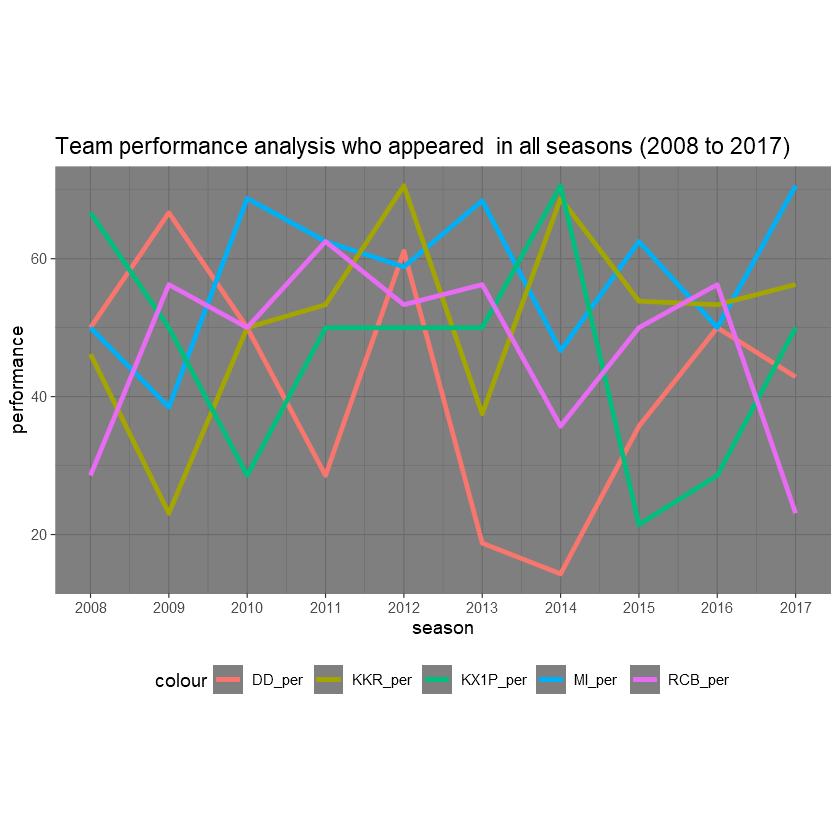

In [221]:
# Team performance analysis who played in all seasons (2008 to 2017)

ggplot(data = team_win_per , aes(x = season)) +
        geom_line(aes(y = DD_per,colour="DD_per"),size = 1) +
        geom_line(aes(y = MI_per,colour="MI_per"),size = 1) +
        geom_line(aes(y = KKR_per,colour="KKR_per"),size = 1) +
        geom_line(aes(y = KX1P_per,colour="KX1P_per"),size =1) +
        geom_line(aes(y = RCB_per,colour="RCB_per"),size =1) +
        scale_x_continuous(breaks = c(2008:2017))+
        coord_cartesian(ylim = c(14:80))+
        coord_fixed(0.088)+
        theme_dark()+
        labs(title ="Team performance analysis who appeared  in all seasons (2008 to 2017)" ,
             y = "performance" , x = "season")+
        theme(legend.position="bottom")